In [1]:
data = [('correlated_signal_attack_1.log',
  {1e-05: (0.9483541579168416, 0.0, 0.0, 0, [[0, 1849], [2086, 72257]]),
   9.90001e-06: (0.9483410331793364, 0.0, 0.0, 0, [[0, 1850], [2086, 72256]]),
   9.80002e-06: (0.948262284754305, 0.0, 0.0, 0, [[0, 1856], [2086, 72250]]),
   9.70003e-06: (0.9482229105417892, 0.0, 0.0, 0, [[0, 1859], [2086, 72247]]),
   9.60004e-06: (0.9480916631667367, 0.0, 0.0, 0, [[0, 1869], [2086, 72237]]),
   9.50005e-06: (0.9477766694666107, 0.0, 0.0, 0, [[0, 1893], [2086, 72213]]),
   9.40006e-06: (0.9477110457790844, 0.0, 0.0, 0, [[0, 1898], [2086, 72208]]),
   9.30007e-06: (0.9476060478790425, 0.0, 0.0, 0, [[0, 1906], [2086, 72200]]),
   9.20008e-06: (0.9473041789164217, 0.0, 0.0, 0, [[0, 1929], [2086, 72177]]),
   9.10009e-06: (0.9469760604787905, 0.0, 0.0, 0, [[0, 1954], [2086, 72152]]),
   9.0001e-06: (0.9469629357412852, 0.0, 0.0, 0, [[0, 1955], [2086, 72151]]),
   8.90011e-06: (0.94694981100378, 0.0, 0.0, 0, [[0, 1956], [2086, 72150]]),
   8.80012e-06: (0.94694981100378, 0.0, 0.0, 0, [[0, 1956], [2086, 72150]]),
   8.70013e-06: (0.9469104367912642, 0.0, 0.0, 0, [[0, 1959], [2086, 72147]]),
   8.60014e-06: (0.9468973120537589, 0.0, 0.0, 0, [[0, 1960], [2086, 72146]]),
   8.50015e-06: (0.9468841873162537, 0.0, 0.0, 0, [[0, 1961], [2086, 72145]]),
   8.40016e-06: (0.9468448131037379, 0.0, 0.0, 0, [[0, 1964], [2086, 72142]]),
   8.30017e-06: (0.9468054388912222, 0.0, 0.0, 0, [[0, 1967], [2086, 72139]]),
   8.20018e-06: (0.9466479420411592, 0.0, 0.0, 0, [[0, 1979], [2086, 72127]]),
   8.10019e-06: (0.946634817303654, 0.0, 0.0, 0, [[0, 1980], [2086, 72126]]),
   8.000200000000002e-06: (0.946634817303654,
    0.0,
    0.0,
    0,
    [[0, 1980], [2086, 72126]]),
   7.90021e-06: (0.946634817303654, 0.0, 0.0, 0, [[0, 1980], [2086, 72126]]),
   7.800220000000002e-06: (0.9464641957160856,
    0.0,
    0.0,
    0,
    [[0, 1993], [2086, 72113]]),
   7.70023e-06: (0.9464116967660646, 0.0, 0.0, 0, [[0, 1997], [2086, 72109]]),
   7.600240000000001e-06: (0.9463854472910542,
    0.0,
    0.0,
    0,
    [[0, 1999], [2086, 72107]]),
   7.500250000000001e-06: (0.946372322553549,
    0.0,
    0.0,
    0,
    [[0, 2000], [2086, 72106]]),
   7.400260000000001e-06: (0.946319823603528,
    0.0,
    0.0,
    0,
    [[0, 2004], [2086, 72102]]),
   7.3002700000000015e-06: (0.9462017009659807,
    0.0,
    0.0,
    0,
    [[0, 2013], [2086, 72093]]),
   7.2002800000000015e-06: (0.9460310793784125,
    0.0,
    0.0,
    0,
    [[0, 2026], [2086, 72080]]),
   7.1002900000000014e-06: (0.9459523309533809,
    0.0,
    0.0,
    0,
    [[0, 2032], [2086, 72074]]),
   7.000300000000001e-06: (0.945742335153297,
    0.0,
    0.0,
    0,
    [[0, 2048], [2086, 72058]]),
   6.900310000000001e-06: (0.9455848383032339,
    0.0,
    0.0,
    0,
    [[0, 2060], [2086, 72046]]),
   6.800320000000001e-06: (0.9452567198656027,
    0.0,
    0.0,
    0,
    [[0, 2085], [2086, 72021]]),
   6.700330000000001e-06: (0.9449154766904662,
    0.0,
    0.0,
    0,
    [[0, 2111], [2086, 71995]]),
   6.600340000000001e-06: (0.9446529819403612,
    0.0,
    0.0,
    0,
    [[0, 2131], [2086, 71975]]),
   6.500350000000001e-06: (0.9443248635027299,
    0.0,
    0.0,
    0,
    [[0, 2156], [2086, 71950]]),
   6.400360000000001e-06: (0.9436161276774464,
    0.0,
    0.0,
    0,
    [[0, 2210], [2086, 71896]]),
   6.300370000000001e-06: (0.942487400251995,
    0.0,
    0.0,
    0,
    [[0, 2296], [2086, 71810]]),
   6.200380000000001e-06: (0.942277404451911,
    0.0,
    0.0,
    0,
    [[0, 2312], [2086, 71794]]),
   6.100390000000001e-06: (0.9422117807643847,
    0.0,
    0.0,
    0,
    [[0, 2317], [2086, 71789]]),
   6.000400000000001e-06: (0.9421330323393532,
    0.0,
    0.0,
    0,
    [[0, 2323], [2086, 71783]]),
   5.900410000000001e-06: (0.9418705375892482,
    0.0,
    0.0,
    0,
    [[0, 2343], [2086, 71763]]),
   5.800420000000001e-06: (0.9412536749265015,
    0.0,
    0.0,
    0,
    [[0, 2390], [2086, 71716]]),
   5.700430000000001e-06: (0.9408074338513229,
    0.0,
    0.0,
    0,
    [[0, 2424], [2086, 71682]]),
   5.600440000000001e-06: (0.9402168206635867,
    0.0,
    0.0,
    0,
    [[0, 2469], [2086, 71637]]),
   5.500450000000001e-06: (0.9391012179756405,
    0.0,
    0.0,
    0,
    [[0, 2554], [2086, 71552]]),
   5.400460000000001e-06: (0.9341925661486771,
    0.0,
    0.0,
    0,
    [[0, 2928], [2086, 71178]]),
   5.300470000000001e-06: (0.9274989500209996,
    0.0,
    0.0,
    0,
    [[0, 3438], [2086, 70668]]),
   5.200480000000001e-06: (0.9144135867282654,
    0.0,
    0.0,
    0,
    [[0, 4435], [2086, 69671]]),
   5.100490000000001e-06: (0.8990576438471231,
    0.0,
    0.0,
    0,
    [[0, 5605], [2086, 68501]]),
   5.000500000000001e-06: (0.8983357832843343,
    0.0,
    0.0,
    0,
    [[0, 5660], [2086, 68446]]),
   4.900510000000001e-06: (0.8980470390592188,
    0.0,
    0.0,
    0,
    [[0, 5682], [2086, 68424]]),
   4.800520000000001e-06: (0.897745170096598,
    0.0,
    0.0,
    0,
    [[0, 5705], [2086, 68401]]),
   4.7005300000000005e-06: (0.8974958000839983,
    0.0,
    0.0,
    0,
    [[0, 5724], [2086, 68382]]),
   4.600540000000001e-06: (0.8972726795464091,
    0.0,
    0.0,
    0,
    [[0, 5741], [2086, 68365]]),
   4.500550000000001e-06: (0.8968395632087358,
    0.0,
    0.0,
    0,
    [[0, 5774], [2086, 68332]]),
   4.400560000000001e-06: (0.8964064468710625,
    0.0,
    0.0,
    0,
    [[0, 5807], [2086, 68299]]),
   4.300570000000001e-06: (0.8957108357832844,
    0.0,
    0.0,
    0,
    [[0, 5860], [2086, 68246]]),
   4.200580000000001e-06: (0.8950545989080219,
    0.0,
    0.0,
    0,
    [[0, 5910], [2086, 68196]]),
   4.100590000000001e-06: (0.8940833683326334,
    0.0,
    0.0,
    0,
    [[0, 5984], [2086, 68122]]),
   4.000600000000001e-06: (0.8939389962200756,
    0.0,
    0.0,
    0,
    [[0, 5995], [2086, 68111]]),
   3.900610000000001e-06: (0.8937552498950021,
    0.0,
    0.0,
    0,
    [[0, 6009], [2086, 68097]]),
   3.800620000000001e-06: (0.8934665056698866,
    0.0,
    0.0,
    0,
    [[0, 6031], [2086, 68075]]),
   3.700630000000001e-06: (0.8933090088198236,
    0.0,
    0.0,
    0,
    [[0, 6043], [2086, 68063]]),
   3.600640000000001e-06: (0.8928233935321294,
    0.0,
    0.0,
    0,
    [[0, 6080], [2086, 68026]]),
   3.500650000000001e-06: (0.8925215245695086,
    0.0,
    0.0,
    0,
    [[0, 6103], [2086, 68003]]),
   3.400660000000001e-06: (0.8922327803443931,
    0.0,
    0.0,
    0,
    [[0, 6125], [2086, 67981]]),
   3.300670000000001e-06: (0.8915765434691306,
    0.0,
    0.0,
    0,
    [[0, 6175], [2086, 67931]]),
   3.200680000000001e-06: (0.8882297354052919,
    0.0,
    0.0,
    0,
    [[0, 6430], [2086, 67676]]),
   3.100690000000001e-06: (0.8803417681646367,
    0.0,
    0.0,
    0,
    [[0, 7031], [2086, 67075]]),
   3.0007000000000008e-06: (0.8664032969340614,
    0.0,
    0.0,
    0,
    [[0, 8093], [2086, 66013]]),
   2.9007100000000007e-06: (0.8445637337253254,
    0.0,
    0.0,
    0,
    [[0, 9757], [2086, 64349]]),
   2.8007200000000007e-06: (0.8323839773204535,
    0.0,
    0.0,
    0,
    [[0, 10685], [2086, 63421]]),
   2.7007300000000007e-06: (0.8278559428811424,
    0.0,
    0.0,
    0,
    [[0, 11030], [2086, 63076]]),
   2.6007400000000006e-06: (0.8211623267534649,
    0.0,
    0.0,
    0,
    [[0, 11540], [2086, 62566]]),
   2.5007500000000014e-06: (0.8116337673246535,
    0.0,
    0.0,
    0,
    [[0, 12266], [2086, 61840]]),
   2.4007600000000014e-06: (0.7924322763544729,
    7.28279076542131e-05,
    0.00047938638542665386,
    0.0001264462287412278,
    [[1, 13730], [2085, 60376]]),
   2.3007700000000014e-06: (0.7617466400671986,
    6.223162611239032e-05,
    0.00047938638542665386,
    0.00011016248967226662,
    [[1, 16068], [2085, 58038]]),
   2.2007800000000013e-06: (0.7345390592188156,
    5.5120714364458166e-05,
    0.00047938638542665386,
    9.887284951552303e-05,
    [[1, 18141], [2085, 55965]]),
   2.1007900000000013e-06: (0.7160988030239395,
    5.115874558755819e-05,
    0.00047938638542665386,
    9.245134747838949e-05,
    [[1, 19546], [2085, 54560]]),
   2.0008000000000012e-06: (0.6963066988660227,
    4.749465685110425e-05,
    0.00047938638542665386,
    8.642668856142777e-05,
    [[1, 21054], [2085, 53052]]),
   1.9008100000000012e-06: (0.68330008399832,
    4.535970244035199e-05,
    0.00047938638542665386,
    8.287750704458809e-05,
    [[1, 22045], [2085, 52061]]),
   1.8008200000000012e-06: (0.6679047669046619,
    4.306817692407081e-05,
    0.00047938638542665386,
    7.903576368306658e-05,
    [[1, 23218], [2085, 50888]]),
   1.7008300000000011e-06: (0.6424952750944981,
    3.975352812562115e-05,
    0.00047938638542665386,
    7.341874380529349e-05,
    [[1, 25154], [2085, 48952]]),
   1.600840000000001e-06: (0.6311555018899622,
    3.843345247703601e-05,
    0.00047938638542665386,
    7.116171499733143e-05,
    [[1, 26018], [2085, 48088]]),
   1.500850000000001e-06: (0.6267980890382192,
    3.7949223938370464e-05,
    0.00047938638542665386,
    7.03309069170447e-05,
    [[1, 26350], [2085, 47756]]),
   1.400860000000001e-06: (0.623792524149517,
    3.762227238525207e-05,
    0.00047938638542665386,
    6.976906439684643e-05,
    [[1, 26579], [2085, 47527]]),
   1.300870000000001e-06: (0.6213250734985301,
    7.471049682480388e-05,
    0.0009587727708533077,
    0.0001386193512614361,
    [[2, 26768], [2084, 47338]]),
   1.200880000000001e-06: (0.6177288954220915,
    0.00011092213266287066,
    0.0014381591562799617,
    0.0002059590827955513,
    [[3, 27043], [2083, 47063]]),
   1.100890000000001e-06: (0.6076097228055439,
    0.00010784771902074271,
    0.0014381591562799617,
    0.00020064876433802627,
    [[3, 27814], [2083, 46292]]),
   1.0009000000000009e-06: (0.5774359512809744,
    0.00013281094362175444,
    0.0019175455417066154,
    0.0002484163457955533,
    [[4, 30114], [2082, 43992]]),
   9.009100000000008e-07: (0.5133872322553549,
    0.00042832667047401483,
    0.007190795781399808,
    0.0008084945830862933,
    [[15, 35005], [2071, 39101]]),
   8.009200000000008e-07: (0.43379882402351955,
    0.001699276593678691,
    0.03355704697986577,
    0.003234750462107209,
    [[70, 41124], [2016, 32982]]),
   7.009300000000008e-07: (0.35699286014279713,
    0.007207093629181375,
    0.1644295302013423,
    0.013808929506018761,
    [[343, 47249], [1743, 26857]]),
   6.009400000000007e-07: (0.29283914321713567,
    0.01637782923731979,
    0.4204218600191755,
    0.03152748319373046,
    [[877, 52671], [1209, 21435]]),
   5.009500000000007e-07: (0.20802708945821083,
    0.023179675222629648,
    0.6788111217641419,
    0.04482856871497768,
    [[1416, 59672], [670, 14434]]),
   4.0096000000000065e-07: (0.11678391432171356,
    0.02888477877640667,
    0.9582933844678811,
    0.05607922347528475,
    [[1999, 67207], [87, 6899]]),
   3.009700000000006e-07: (0.060741285174296514,
    0.028323150033944332,
    1.0,
    0.05508608851800993,
    [[2086, 71564], [0, 2542]]),
   2.0098000000000057e-07: (0.02739132717345653,
    0.027378561772387816,
    1.0,
    0.05329790359875826,
    [[2086, 74105], [0, 1]]),
   1.0099000000000054e-07: (0.02737820243595128,
    0.02737820243595128,
    1.0,
    0.05329722271902706,
    [[2086, 74106], [0, 0]]),
   1.0000000000004986e-09: (0.02737820243595128,
    0.02737820243595128,
    1.0,
    0.05329722271902706,
    [[2086, 74106], [0, 0]])}),
 ('correlated_signal_attack_2.log',
  {1e-05: (0.9434837169441724,
    0.3664030261348005,
    0.9962599345488546,
    0.5357636706473916,
    [[2131, 3685], [8, 59520]]),
   9.90001e-06: (0.9435143241919687,
    0.3666208319009969,
    0.9971949509116409,
    0.5361317079301244,
    [[2133, 3685], [6, 59520]]),
   9.80002e-06: (0.943560235063663,
    0.3669929589558647,
    0.9990649836372136,
    0.536799799045466,
    [[2137, 3686], [2, 59519]]),
   9.70003e-06: (0.9435908423114594,
    0.36721030042918457,
    1.0,
    0.5371672526368658,
    [[2139, 3686], [0, 59519]]),
   9.60004e-06: (0.9435908423114594,
    0.36721030042918457,
    1.0,
    0.5371672526368658,
    [[2139, 3686], [0, 59519]]),
   9.50005e-06: (0.9435908423114594,
    0.36721030042918457,
    1.0,
    0.5371672526368658,
    [[2139, 3686], [0, 59519]]),
   9.40006e-06: (0.9435449314397649,
    0.3670212765957447,
    1.0,
    0.5369649805447471,
    [[2139, 3689], [0, 59516]]),
   9.30007e-06: (0.9435449314397649,
    0.3670212765957447,
    1.0,
    0.5369649805447471,
    [[2139, 3689], [0, 59516]]),
   9.20008e-06: (0.9435296278158668,
    0.3669583118888317,
    1.0,
    0.5368975903614458,
    [[2139, 3690], [0, 59515]]),
   9.10009e-06: (0.9435143241919687,
    0.3668953687821612,
    1.0,
    0.5368302170912285,
    [[2139, 3691], [0, 59514]]),
   9.0001e-06: (0.9434990205680706,
    0.3668324472646201,
    1.0,
    0.5367628607277289,
    [[2139, 3692], [0, 59513]]),
   8.90011e-06: (0.943437806072478,
    0.36658097686375324,
    1.0,
    0.5364936042136945,
    [[2139, 3696], [0, 59509]]),
   8.80012e-06: (0.9434071988246817,
    0.3664553709097139,
    1.0,
    0.5363590772316952,
    [[2139, 3698], [0, 59507]]),
   8.70013e-06: (0.9434071988246817,
    0.3664553709097139,
    1.0,
    0.5363590772316952,
    [[2139, 3698], [0, 59507]]),
   8.60014e-06: (0.9433459843290891,
    0.3662044170518747,
    1.0,
    0.5360902255639098,
    [[2139, 3702], [0, 59503]]),
   8.50015e-06: (0.943223555337904,
    0.3657035390665071,
    1.0,
    0.5355533299949925,
    [[2139, 3710], [0, 59495]]),
   8.40016e-06: (0.9431470372184133,
    0.3653911855141783,
    1.0,
    0.5352183160265233,
    [[2139, 3715], [0, 59490]]),
   8.30017e-06: (0.9430705190989226,
    0.36507936507936506,
    1.0,
    0.5348837209302325,
    [[2139, 3720], [0, 59485]]),
   8.20018e-06: (0.9428409647404505,
    0.36414708886619,
    1.0,
    0.5338824410333209,
    [[2139, 3735], [0, 59470]]),
   8.10019e-06: (0.9425808031341821,
    0.3630962485146834,
    1.0,
    0.5327521793275218,
    [[2139, 3752], [0, 59453]]),
   8.000200000000002e-06: (0.9425042850146915,
    0.36278833107191316,
    1.0,
    0.5324206596141879,
    [[2139, 3757], [0, 59448]]),
   7.90021e-06: (0.9424277668952008,
    0.3624809354346721,
    1.0,
    0.5320895522388059,
    [[2139, 3762], [0, 59443]]),
   7.800220000000002e-06: (0.9424277668952008,
    0.3624809354346721,
    1.0,
    0.5320895522388059,
    [[2139, 3762], [0, 59443]]),
   7.70023e-06: (0.942335945151812,
    0.3621127475876079,
    1.0,
    0.5316927665920954,
    [[2139, 3768], [0, 59437]]),
   7.600240000000001e-06: (0.9420145690499511,
    0.36082995951417,
    1.0,
    0.5303086649312012,
    [[2139, 3789], [0, 59416]]),
   7.500250000000001e-06: (0.9418462291870715,
    0.36016164337430545,
    1.0,
    0.5295865313196335,
    [[2139, 3800], [0, 59405]]),
   7.400260000000001e-06: (0.941570763956905,
    0.3590733590733591,
    1.0,
    0.5284090909090909,
    [[2139, 3818], [0, 59387]]),
   7.3002700000000015e-06: (0.9413871204701273,
    0.3583514826604121,
    1.0,
    0.5276270350271337,
    [[2139, 3830], [0, 59375]]),
   7.2002800000000015e-06: (0.9412952987267384,
    0.35799163179916316,
    1.0,
    0.5272368745378359,
    [[2139, 3836], [0, 59369]]),
   7.1002900000000014e-06: (0.9410504407443683,
    0.357035553329995,
    1.0,
    0.5261992619926199,
    [[2139, 3852], [0, 59353]]),
   7.000300000000001e-06: (0.940805582761998,
    0.35608456800399535,
    1.0,
    0.5251657255094525,
    [[2139, 3868], [0, 59337]]),
   6.900310000000001e-06: (0.94013222331048,
    0.35349529003470503,
    1.0,
    0.5223443223443224,
    [[2139, 3912], [0, 59293]]),
   6.800320000000001e-06: (0.9385865572967679,
    0.3476918075422627,
    1.0,
    0.5159811844168376,
    [[2139, 4013], [0, 59192]]),
   6.700330000000001e-06: (0.936949069539667,
    0.3417478830484103,
    1.0,
    0.5094070016670637,
    [[2139, 4120], [0, 59085]]),
   6.600340000000001e-06: (0.9347300440744368,
    0.33400999375390383,
    1.0,
    0.5007608568418589,
    [[2139, 4265], [0, 58940]]),
   6.500350000000001e-06: (0.9323732859941234,
    0.3261665141811528,
    1.0,
    0.4918937564677475,
    [[2139, 4419], [0, 58786]]),
   6.400360000000001e-06: (0.9310418707149853,
    0.3218961625282167,
    1.0,
    0.4870218579234973,
    [[2139, 4506], [0, 58699]]),
   6.300370000000001e-06: (0.9304450293829579,
    0.32001795332136446,
    1.0,
    0.4848690921455287,
    [[2139, 4545], [0, 58660]]),
   6.200380000000001e-06: (0.9302001714005876,
    0.3192537313432836,
    1.0,
    0.4839914017422786,
    [[2139, 4561], [0, 58644]]),
   6.100390000000001e-06: (0.9299706170421156,
    0.3185405807892777,
    1.0,
    0.4831714479331376,
    [[2139, 4576], [0, 58629]]),
   6.000400000000001e-06: (0.9294962047012733,
    0.31707678624369995,
    1.0,
    0.4814856499718626,
    [[2139, 4607], [0, 58598]]),
   5.900410000000001e-06: (0.9291136141038198,
    0.31590607000443066,
    1.0,
    0.48013468013468014,
    [[2139, 4632], [0, 58573]]),
   5.800420000000001e-06: (0.9288840597453477,
    0.3152077807250221,
    1.0,
    0.479327731092437,
    [[2139, 4647], [0, 58558]]),
   5.700430000000001e-06: (0.9285014691478942,
    0.3140508001761856,
    1.0,
    0.4779888268156424,
    [[2139, 4672], [0, 58533]]),
   5.600440000000001e-06: (0.9273230901077375,
    0.3105400696864111,
    1.0,
    0.47391159853772014,
    [[2139, 4749], [0, 58456]]),
   5.500450000000001e-06: (0.9265273016650343,
    0.3082132564841499,
    1.0,
    0.4711972684216324,
    [[2139, 4801], [0, 58404]]),
   5.400460000000001e-06: (0.9259610675808031,
    0.3065787587788448,
    1.0,
    0.4692847740236946,
    [[2139, 4838], [0, 58367]]),
   5.300470000000001e-06: (0.925501958863859,
    0.30526616240901955,
    1.0,
    0.46774546249726656,
    [[2139, 4868], [0, 58337]]),
   5.200480000000001e-06: (0.9252724045053868,
    0.3046140700655084,
    1.0,
    0.4669795873812902,
    [[2139, 4883], [0, 58322]]),
   5.100490000000001e-06: (0.9249816356513222,
    0.3037920749893481,
    1.0,
    0.46601307189542485,
    [[2139, 4902], [0, 58303]]),
   5.000500000000001e-06: (0.9245990450538688,
    0.3027172374752335,
    1.0,
    0.46474741988049967,
    [[2139, 4927], [0, 58278]]),
   4.900510000000001e-06: (0.9244613124387855,
    0.3023321554770318,
    1.0,
    0.46429346646407643,
    [[2139, 4936], [0, 58269]]),
   4.800520000000001e-06: (0.9243694906953966,
    0.30207597796921337,
    1.0,
    0.4639913232104121,
    [[2139, 4942], [0, 58263]]),
   4.7005300000000005e-06: (0.9241552399608227,
    0.3014799154334038,
    1.0,
    0.4632878492527615,
    [[2139, 4956], [0, 58249]]),
   4.600540000000001e-06: (0.9236961312438785,
    0.3002105263157895,
    1.0,
    0.4617875647668394,
    [[2139, 4986], [0, 58219]]),
   4.500550000000001e-06: (0.9233594515181195,
    0.29928641387994964,
    1.0,
    0.46069351712255013,
    [[2139, 5008], [0, 58197]]),
   4.400560000000001e-06: (0.9229462536728698,
    0.29816002230275995,
    1.0,
    0.4593578868248685,
    [[2139, 5035], [0, 58170]]),
   4.300570000000001e-06: (0.9226248775710089,
    0.2972897845726199,
    1.0,
    0.45832440539961433,
    [[2139, 5056], [0, 58149]]),
   4.200580000000001e-06: (0.9223494123408423,
    0.29654789962567585,
    1.0,
    0.4574422583404619,
    [[2139, 5074], [0, 58131]]),
   4.100590000000001e-06: (0.9221963761018609,
    0.296137339055794,
    1.0,
    0.45695364238410596,
    [[2139, 5084], [0, 58121]]),
   4.000600000000001e-06: (0.9219515181194907,
    0.2954828014919188,
    1.0,
    0.4561740243122201,
    [[2139, 5100], [0, 58105]]),
   3.900610000000001e-06: (0.9214924094025465,
    0.29426330994634753,
    1.0,
    0.454719387755102,
    [[2139, 5130], [0, 58075]]),
   3.800620000000001e-06: (0.9209567825661117,
    0.2928532311062432,
    1.0,
    0.45303399343429,
    [[2139, 5165], [0, 58040]]),
   3.700630000000001e-06: (0.9203599412340843,
    0.29129783467247716,
    1.0,
    0.4511706391056739,
    [[2139, 5204], [0, 58001]]),
   3.600640000000001e-06: (0.9199926542605289,
    0.2903488529930772,
    1.0,
    0.4500315590153587,
    [[2139, 5228], [0, 57977]]),
   3.500650000000001e-06: (0.9196406709108716,
    0.2894451962110961,
    1.0,
    0.44894532479798516,
    [[2139, 5251], [0, 57954]]),
   3.400660000000001e-06: (0.9194570274240941,
    0.28897595244528507,
    1.0,
    0.4483806728854418,
    [[2139, 5263], [0, 57942]]),
   3.300670000000001e-06: (0.9189979187071499,
    0.28780947255113026,
    1.0,
    0.44697523769721037,
    [[2139, 5293], [0, 57912]]),
   3.200680000000001e-06: (0.9178501469147894,
    0.2849340615425603,
    1.0,
    0.4434998963300851,
    [[2139, 5368], [0, 57837]]),
   3.100690000000001e-06: (0.9157229431929481,
    0.27975411980120324,
    1.0,
    0.43719979560551864,
    [[2139, 5507], [0, 57698]]),
   3.0007000000000008e-06: (0.9101218168462292,
    0.26697453819271094,
    1.0,
    0.42143631169342927,
    [[2139, 5873], [0, 57332]]),
   2.9007100000000007e-06: (0.9003274975514202,
    0.2472260748959778,
    1.0,
    0.39644147901028637,
    [[2139, 6513], [0, 56692]]),
   2.8007200000000007e-06: (0.8908698579823702,
    0.2307443365695793,
    1.0,
    0.3749671312122009,
    [[2139, 7131], [0, 56074]]),
   2.7007300000000007e-06: (0.8867225759059746,
    0.22419033644272088,
    1.0,
    0.3662671232876712,
    [[2139, 7402], [0, 55803]]),
   2.6007400000000006e-06: (0.8799430705190989,
    0.21424278846153846,
    1.0,
    0.35288294976490964,
    [[2139, 7845], [0, 55360]]),
   2.5007500000000014e-06: (0.8628489226248776,
    0.1926853436627331,
    1.0,
    0.3231117824773414,
    [[2139, 8962], [0, 54243]]),
   2.4007600000000014e-06: (0.8366644221351616,
    0.1669528566968467,
    1.0,
    0.2861347067085813,
    [[2139, 10673], [0, 52532]]),
   2.3007700000000014e-06: (0.8180399118511263,
    0.1524698838121035,
    1.0,
    0.26459673428995545,
    [[2139, 11890], [0, 51315]]),
   2.2007800000000013e-06: (0.7958496571988247,
    0.13818722139673106,
    1.0,
    0.24281984334203657,
    [[2139, 13340], [0, 49865]]),
   2.1007900000000013e-06: (0.7828568805093046,
    0.13100195982361587,
    1.0,
    0.23165646829479614,
    [[2139, 14189], [0, 49016]]),
   2.0008000000000012e-06: (0.7745929236043095,
    0.12680815745790847,
    1.0,
    0.22507497237859736,
    [[2139, 14729], [0, 48476]]),
   1.9008100000000012e-06: (0.7630386875612145,
    0.12137547523123192,
    1.0,
    0.2164760651755895,
    [[2139, 15484], [0, 47721]]),
   1.8008200000000012e-06: (0.759794319294809,
    0.119932716568545,
    1.0,
    0.21417843196155,
    [[2139, 15696], [0, 47509]]),
   1.7008300000000011e-06: (0.7571314887365328,
    0.11877394636015326,
    1.0,
    0.21232876712328766,
    [[2139, 15870], [0, 47335]]),
   1.600840000000001e-06: (0.7544074436826641,
    0.11761148072799252,
    1.0,
    0.21046934960149563,
    [[2139, 16048], [0, 47157]]),
   1.500850000000001e-06: (0.7518823457394711,
    0.11655405405405406,
    1.0,
    0.2087745839636914,
    [[2139, 16213], [0, 46992]]),
   1.400860000000001e-06: (0.7495255876591577,
    0.11558413487517562,
    1.0,
    0.20721724388471785,
    [[2139, 16367], [0, 46838]]),
   1.300870000000001e-06: (0.7474902056807052,
    0.11475937550297763,
    1.0,
    0.20589084608720762,
    [[2139, 16500], [0, 46705]]),
   1.200880000000001e-06: (0.7422869735553379,
    0.11270351441066442,
    1.0,
    0.202576001515295,
    [[2139, 16840], [0, 46365]]),
   1.100890000000001e-06: (0.7348494123408423,
    0.10988954533778576,
    1.0,
    0.19801888539159415,
    [[2139, 17326], [0, 45879]]),
   1.0009000000000009e-06: (0.7205558276199804,
    0.10485808127849404,
    1.0,
    0.18981276067086697,
    [[2139, 18260], [0, 44945]]),
   9.009100000000008e-07: (0.6964373163565132,
    0.09733788395904437,
    1.0,
    0.17740731525255038,
    [[2139, 19836], [0, 43369]]),
   8.009200000000008e-07: (0.6509243388834476,
    0.08573489919435649,
    1.0,
    0.15792971057294744,
    [[2139, 22810], [0, 40395]]),
   7.009300000000008e-07: (0.5727993388834476,
    0.07117189059692554,
    1.0,
    0.13288603112477868,
    [[2139, 27915], [0, 35290]]),
   6.009400000000007e-07: (0.44359084231145934,
    0.05556277112502273,
    1.0,
    0.10527610985333202,
    [[2139, 36358], [0, 26847]]),
   5.009500000000007e-07: (0.26528832027424093,
    0.042653744915051445,
    1.0,
    0.08181766022146995,
    [[2139, 48009], [0, 15196]]),
   4.0096000000000065e-07: (0.1376101860920666,
    0.03656972867620659,
    1.0,
    0.07055912914398813,
    [[2139, 56352], [0, 6853]]),
   3.009700000000006e-07: (0.04924706170421156,
    0.03328405819652999,
    1.0,
    0.06442382988976568,
    [[2139, 62126], [0, 1079]]),
   2.0098000000000057e-07: (0.03274975514201763,
    0.03273495248152059,
    1.0,
    0.06339468302658487,
    [[2139, 63204], [0, 1]]),
   1.0099000000000054e-07: (0.03273445151811949,
    0.03273445151811949,
    1.0,
    0.06339374360950166,
    [[2139, 63205], [0, 0]]),
   1.0000000000004986e-09: (0.03273445151811949,
    0.03273445151811949,
    1.0,
    0.06339374360950166,
    [[2139, 63205], [0, 0]])}),
 ('correlated_signal_attack_3.log',
  {1e-05: (0.9374489795918367,
    0.33997308209959626,
    1.0,
    0.5074327038971475,
    [[1263, 2452], [0, 35485]]),
   9.90001e-06: (0.9374234693877551,
    0.3398815931108719,
    1.0,
    0.5073307893151235,
    [[1263, 2453], [0, 35484]]),
   9.80002e-06: (0.9374234693877551,
    0.3398815931108719,
    1.0,
    0.5073307893151235,
    [[1263, 2453], [0, 35484]]),
   9.70003e-06: (0.9373979591836735,
    0.3397901533494754,
    1.0,
    0.5072289156626506,
    [[1263, 2454], [0, 35483]]),
   9.60004e-06: (0.9373724489795918,
    0.33969876277568584,
    1.0,
    0.5071270829150772,
    [[1263, 2455], [0, 35482]]),
   9.50005e-06: (0.9373724489795918,
    0.33969876277568584,
    1.0,
    0.5071270829150772,
    [[1263, 2455], [0, 35482]]),
   9.40006e-06: (0.9373469387755102,
    0.33960742134982524,
    1.0,
    0.507025291047772,
    [[1263, 2456], [0, 35481]]),
   9.30007e-06: (0.9373469387755102,
    0.33960742134982524,
    1.0,
    0.507025291047772,
    [[1263, 2456], [0, 35481]]),
   9.20008e-06: (0.9373469387755102,
    0.33960742134982524,
    1.0,
    0.507025291047772,
    [[1263, 2456], [0, 35481]]),
   9.10009e-06: (0.9373214285714285,
    0.3395161290322581,
    1.0,
    0.5069235400361228,
    [[1263, 2457], [0, 35480]]),
   9.0001e-06: (0.9372704081632653,
    0.33933369156367543,
    1.0,
    0.5067201604814443,
    [[1263, 2459], [0, 35478]]),
   8.90011e-06: (0.9371683673469388,
    0.3389694041867955,
    1.0,
    0.5063138905592304,
    [[1263, 2463], [0, 35474]]),
   8.80012e-06: (0.937015306122449,
    0.3384244372990354,
    1.0,
    0.5057057057057057,
    [[1263, 2469], [0, 35468]]),
   8.70013e-06: (0.9368367346938775,
    0.3377908531692966,
    1.0,
    0.50499800079968,
    [[1263, 2476], [0, 35461]]),
   8.60014e-06: (0.9367602040816326,
    0.3375200427578835,
    1.0,
    0.5046953046953047,
    [[1263, 2479], [0, 35458]]),
   8.50015e-06: (0.9364540816326531,
    0.3364411294619073,
    1.0,
    0.5034881403229021,
    [[1263, 2491], [0, 35446]]),
   8.40016e-06: (0.9364285714285714,
    0.33635153129161116,
    1.0,
    0.5033878039059386,
    [[1263, 2492], [0, 35445]]),
   8.30017e-06: (0.9364030612244898,
    0.33626198083067094,
    1.0,
    0.503287507471608,
    [[1263, 2493], [0, 35444]]),
   8.20018e-06: (0.9363520408163265,
    0.336083022884513,
    1.0,
    0.5030870344552878,
    [[1263, 2495], [0, 35442]]),
   8.10019e-06: (0.9363010204081633,
    0.3359042553191489,
    1.0,
    0.5028867210830181,
    [[1263, 2497], [0, 35440]]),
   8.000200000000002e-06: (0.93625,
    0.335725677830941,
    1.0,
    0.5026865671641791,
    [[1263, 2499], [0, 35438]]),
   7.90021e-06: (0.9361989795918367,
    0.33554729011689693,
    1.0,
    0.5024865725084543,
    [[1263, 2501], [0, 35436]]),
   7.800220000000002e-06: (0.9361734693877551,
    0.3354581673306773,
    1.0,
    0.5023866348448687,
    [[1263, 2502], [0, 35435]]),
   7.70023e-06: (0.9361734693877551,
    0.3354581673306773,
    1.0,
    0.5023866348448687,
    [[1263, 2502], [0, 35435]]),
   7.600240000000001e-06: (0.9360204081632653,
    0.3349244232299125,
    1.0,
    0.5017878426698451,
    [[1263, 2508], [0, 35429]]),
   7.500250000000001e-06: (0.9360204081632653,
    0.3349244232299125,
    1.0,
    0.5017878426698451,
    [[1263, 2508], [0, 35429]]),
   7.400260000000001e-06: (0.9358673469387755,
    0.33439237490071483,
    1.0,
    0.5011904761904762,
    [[1263, 2514], [0, 35423]]),
   7.3002700000000015e-06: (0.935765306122449,
    0.3340386141232478,
    1.0,
    0.5007930214115781,
    [[1263, 2518], [0, 35419]]),
   7.2002800000000015e-06: (0.9356377551020408,
    0.3335974643423138,
    1.0,
    0.5002970885323826,
    [[1263, 2523], [0, 35414]]),
   7.1002900000000014e-06: (0.9355102040816327,
    0.33315747823793196,
    1.0,
    0.49980213692125053,
    [[1263, 2528], [0, 35409]]),
   7.000300000000001e-06: (0.9354591836734694,
    0.3329818085947799,
    1.0,
    0.4996044303797469,
    [[1263, 2530], [0, 35407]]),
   6.900310000000001e-06: (0.9353571428571429,
    0.3326310244930208,
    1.0,
    0.49920948616600785,
    [[1263, 2534], [0, 35403]]),
   6.800320000000001e-06: (0.935204081632653,
    0.3321062319221667,
    1.0,
    0.4986182392420055,
    [[1263, 2540], [0, 35397]]),
   6.700330000000001e-06: (0.9350255102040816,
    0.331496062992126,
    1.0,
    0.4979302188054405,
    [[1263, 2547], [0, 35390]]),
   6.600340000000001e-06: (0.9349489795918368,
    0.33123524783634933,
    1.0,
    0.49763593380614657,
    [[1263, 2550], [0, 35387]]),
   6.500350000000001e-06: (0.9345153061224489,
    0.3297650130548303,
    1.0,
    0.4959748674651483,
    [[1263, 2567], [0, 35370]]),
   6.400360000000001e-06: (0.9341326530612245,
    0.32847854356306894,
    1.0,
    0.4945184025058732,
    [[1263, 2582], [0, 35355]]),
   6.300370000000001e-06: (0.93375,
    0.3272020725388601,
    1.0,
    0.4930704665235214,
    [[1263, 2597], [0, 35340]]),
   6.200380000000001e-06: (0.933265306122449,
    0.32559938128383603,
    1.0,
    0.4912485414235706,
    [[1263, 2616], [0, 35321]]),
   6.100390000000001e-06: (0.9328826530612245,
    0.32434514637904466,
    1.0,
    0.4898196625945317,
    [[1263, 2631], [0, 35306]]),
   6.000400000000001e-06: (0.9318112244897959,
    0.3208841463414634,
    1.0,
    0.48586266589728794,
    [[1263, 2673], [0, 35264]]),
   5.900410000000001e-06: (0.9306122448979591,
    0.31709766507657544,
    1.0,
    0.4815097216927182,
    [[1263, 2720], [0, 35217]]),
   5.800420000000001e-06: (0.9288265306122448,
    0.31162102146558107,
    1.0,
    0.47516930022573367,
    [[1263, 2790], [0, 35147]]),
   5.700430000000001e-06: (0.9259438775510204,
    0.3031685069611138,
    1.0,
    0.46527905691655924,
    [[1263, 2903], [0, 35034]]),
   5.600440000000001e-06: (0.9236989795918368,
    0.29689703808180534,
    1.0,
    0.45785753126699297,
    [[1263, 2991], [0, 34946]]),
   5.500450000000001e-06: (0.9214795918367347,
    0.29094678645473393,
    1.0,
    0.45074946466809424,
    [[1263, 3078], [0, 34859]]),
   5.400460000000001e-06: (0.9204336734693878,
    0.28822455499771793,
    1.0,
    0.44747564216120456,
    [[1263, 3119], [0, 34818]]),
   5.300470000000001e-06: (0.9198979591836735,
    0.2868498750851692,
    1.0,
    0.445817154959407,
    [[1263, 3140], [0, 34797]]),
   5.200480000000001e-06: (0.9196173469387755,
    0.28613502492070686,
    1.0,
    0.44495332041571256,
    [[1263, 3151], [0, 34786]]),
   5.100490000000001e-06: (0.919311224489796,
    0.2853592408495255,
    1.0,
    0.4440147653366145,
    [[1263, 3163], [0, 34774]]),
   5.000500000000001e-06: (0.9190051020408163,
    0.28458765209553855,
    1.0,
    0.44308016137519735,
    [[1263, 3175], [0, 34762]]),
   4.900510000000001e-06: (0.9186989795918368,
    0.2838202247191011,
    1.0,
    0.4421494836338176,
    [[1263, 3187], [0, 34750]]),
   4.800520000000001e-06: (0.9180612244897959,
    0.2822346368715084,
    1.0,
    0.4402230742418962,
    [[1263, 3212], [0, 34725]]),
   4.7005300000000005e-06: (0.9173469387755102,
    0.2804796802131912,
    1.0,
    0.43808532778355874,
    [[1263, 3240], [0, 34697]]),
   4.600540000000001e-06: (0.9169897959183674,
    0.2796103608589772,
    1.0,
    0.43702422145328723,
    [[1263, 3254], [0, 34683]]),
   4.500550000000001e-06: (0.9161989795918367,
    0.27770448548812665,
    1.0,
    0.434692823954569,
    [[1263, 3285], [0, 34652]]),
   4.400560000000001e-06: (0.9153316326530613,
    0.27564382365779133,
    1.0,
    0.432164242942686,
    [[1263, 3319], [0, 34618]]),
   4.300570000000001e-06: (0.9125255102040817,
    0.26918158567774936,
    1.0,
    0.42418136020151137,
    [[1263, 3429], [0, 34508]]),
   4.200580000000001e-06: (0.9105357142857143,
    0.2647798742138365,
    1.0,
    0.41869716558925907,
    [[1263, 3507], [0, 34430]]),
   4.100590000000001e-06: (0.909795918367347,
    0.26317982913106897,
    1.0,
    0.41669416034312107,
    [[1263, 3536], [0, 34401]]),
   4.000600000000001e-06: (0.9086734693877551,
    0.2607887672930002,
    1.0,
    0.413691451031772,
    [[1263, 3580], [0, 34357]]),
   3.900610000000001e-06: (0.9077551020408163,
    0.25886452141832345,
    1.0,
    0.41126668837512215,
    [[1263, 3616], [0, 34321]]),
   3.800620000000001e-06: (0.9068112244897959,
    0.25691619202603744,
    1.0,
    0.40880401359443275,
    [[1263, 3653], [0, 34284]]),
   3.700630000000001e-06: (0.9061734693877551,
    0.25561627200971465,
    1.0,
    0.40715667311411996,
    [[1263, 3678], [0, 34259]]),
   3.600640000000001e-06: (0.9048214285714286,
    0.2529034841810172,
    1.0,
    0.40370784721112357,
    [[1263, 3731], [0, 34206]]),
   3.500650000000001e-06: (0.90375,
    0.25079428117553615,
    1.0,
    0.40101603429115734,
    [[1263, 3773], [0, 34164]]),
   3.400660000000001e-06: (0.9035969387755102,
    0.2504958349861166,
    1.0,
    0.40063441712926245,
    [[1263, 3779], [0, 34158]]),
   3.300670000000001e-06: (0.9023724489795918,
    0.2481335952848723,
    1.0,
    0.39760742956083744,
    [[1263, 3827], [0, 34110]]),
   3.200680000000001e-06: (0.9008928571428572,
    0.24533799533799533,
    1.0,
    0.3940102948058025,
    [[1263, 3885], [0, 34052]]),
   3.100690000000001e-06: (0.8982142857142857,
    0.240434037692747,
    1.0,
    0.3876611418047882,
    [[1263, 3990], [0, 33947]]),
   3.0007000000000008e-06: (0.8963265306122449,
    0.2370940491834053,
    1.0,
    0.3833080424886191,
    [[1263, 4064], [0, 33873]]),
   2.9007100000000007e-06: (0.8953571428571429,
    0.2354147250698975,
    1.0,
    0.3811104405552203,
    [[1263, 4102], [0, 33835]]),
   2.8007200000000007e-06: (0.8914795918367346,
    0.22892876563349646,
    1.0,
    0.37256637168141593,
    [[1263, 4254], [0, 33683]]),
   2.7007300000000007e-06: (0.8815561224489796,
    0.2138503217067389,
    1.0,
    0.3523503975449853,
    [[1263, 4643], [0, 33294]]),
   2.6007400000000006e-06: (0.8682908163265306,
    0.1965452847805789,
    1.0,
    0.32852126414358174,
    [[1263, 5163], [0, 32774]]),
   2.5007500000000014e-06: (0.85125,
    0.1780377784042853,
    1.0,
    0.30226157712097645,
    [[1263, 5831], [0, 32106]]),
   2.4007600000000014e-06: (0.8320663265306123,
    0.16097374458322714,
    1.0,
    0.27730815676803167,
    [[1263, 6583], [0, 31354]]),
   2.3007700000000014e-06: (0.810280612244898,
    0.14517241379310344,
    1.0,
    0.2535380909364649,
    [[1263, 7437], [0, 30500]]),
   2.2007800000000013e-06: (0.7906632653061224,
    0.1333826169606083,
    1.0,
    0.23537085352217665,
    [[1263, 8206], [0, 29731]]),
   2.1007900000000013e-06: (0.7837755102040816,
    0.12968477256391828,
    1.0,
    0.2295946191601527,
    [[1263, 8476], [0, 29461]]),
   2.0008000000000012e-06: (0.772984693877551,
    0.12428655776421964,
    1.0,
    0.22109409190371992,
    [[1263, 8899], [0, 29038]]),
   1.9008100000000012e-06: (0.7627551020408163,
    0.11956830445896052,
    1.0,
    0.21359715880263824,
    [[1263, 9300], [0, 28637]]),
   1.8008200000000012e-06: (0.7610459183673469,
    0.11881467544684854,
    1.0,
    0.21239384511897752,
    [[1263, 9367], [0, 28570]]),
   1.7008300000000011e-06: (0.7567602040816327,
    0.11696610483422856,
    1.0,
    0.20943537020147585,
    [[1263, 9535], [0, 28402]]),
   1.600840000000001e-06: (0.7552040816326531,
    0.11630905239893176,
    1.0,
    0.20838145520541163,
    [[1263, 9596], [0, 28341]]),
   1.500850000000001e-06: (0.7505102040816326,
    0.1143710948111926,
    1.0,
    0.20526572403705506,
    [[1263, 9780], [0, 28157]]),
   1.400860000000001e-06: (0.7502040816326531,
    0.11424694708276797,
    1.0,
    0.2050657574281539,
    [[1263, 9792], [0, 28145]]),
   1.300870000000001e-06: (0.7499489795918367,
    0.11414369633981021,
    1.0,
    0.20489941596365996,
    [[1263, 9802], [0, 28135]]),
   1.200880000000001e-06: (0.7493622448979592,
    0.1139069264069264,
    1.0,
    0.20451785280544085,
    [[1263, 9825], [0, 28112]]),
   1.100890000000001e-06: (0.7466326530612245,
    0.11281822242072354,
    1.0,
    0.20276127789372292,
    [[1263, 9932], [0, 28005]]),
   1.0009000000000009e-06: (0.7365561224489796,
    0.1089732528041415,
    1.0,
    0.19652999299774374,
    [[1263, 10327], [0, 27610]]),
   9.009100000000008e-07: (0.694719387755102,
    0.09546485260770975,
    1.0,
    0.1742910370523701,
    [[1263, 11967], [0, 25970]]),
   8.009200000000008e-07: (0.6281887755102041,
    0.0797449172875363,
    1.0,
    0.14771066019531018,
    [[1263, 14575], [0, 23362]]),
   7.009300000000008e-07: (0.4796173469387755,
    0.05830486566337365,
    1.0,
    0.11018538713195203,
    [[1263, 20399], [0, 17538]]),
   6.009400000000007e-07: (0.31637755102040815,
    0.04500908734542604,
    1.0,
    0.0861410448779157,
    [[1263, 26798], [0, 11139]]),
   5.009500000000007e-07: (0.17974489795918366,
    0.03779513421312505,
    1.0,
    0.07283737024221452,
    [[1263, 32154], [0, 5783]]),
   4.0096000000000065e-07: (0.09653061224489796,
    0.03443387224297282,
    1.0,
    0.06657529914079384,
    [[1263, 35416], [0, 2521]]),
   3.009700000000006e-07: (0.037806122448979594,
    0.03240040019496678,
    1.0,
    0.06276712056455622,
    [[1263, 37718], [0, 219]]),
   2.0098000000000057e-07: (0.03232142857142857,
    0.032222675783243185,
    1.0,
    0.06243357472997355,
    [[1263, 37933], [0, 4]]),
   1.0099000000000054e-07: (0.03221938775510204,
    0.03221938775510204,
    1.0,
    0.06242740281244594,
    [[1263, 37937], [0, 0]]),
   1.0000000000004986e-09: (0.03221938775510204,
    0.03221938775510204,
    1.0,
    0.06242740281244594,
    [[1263, 37937], [0, 0]])}),
 ('fuzzing_attack_1.log',
  {1e-05: (0.9853070175438596,
    0.003134796238244514,
    0.05555555555555555,
    0.005934718100890207,
    [[2, 636], [34, 44928]]),
   9.90001e-06: (0.9853070175438596,
    0.003134796238244514,
    0.05555555555555555,
    0.005934718100890207,
    [[2, 636], [34, 44928]]),
   9.80002e-06: (0.9852412280701754,
    0.0031201248049922,
    0.05555555555555555,
    0.005908419497784343,
    [[2, 639], [34, 44925]]),
   9.70003e-06: (0.9850657894736842,
    0.0030816640986132513,
    0.05555555555555555,
    0.00583941605839416,
    [[2, 647], [34, 44917]]),
   9.60004e-06: (0.9849122807017544,
    0.003048780487804878,
    0.05555555555555555,
    0.005780346820809248,
    [[2, 654], [34, 44910]]),
   9.50005e-06: (0.9847587719298245,
    0.0030165912518853697,
    0.05555555555555555,
    0.005722460658082976,
    [[2, 661], [34, 44903]]),
   9.40006e-06: (0.984671052631579,
    0.0029985007496251873,
    0.05555555555555555,
    0.005689900426742531,
    [[2, 665], [34, 44899]]),
   9.30007e-06: (0.9844517543859649,
    0.0029542097488921715,
    0.05555555555555555,
    0.005610098176718092,
    [[2, 675], [34, 44889]]),
   9.20008e-06: (0.984188596491228,
    0.002902757619738752,
    0.05555555555555555,
    0.005517241379310345,
    [[2, 687], [34, 44877]]),
   9.10009e-06: (0.9841666666666666,
    0.002898550724637681,
    0.05555555555555555,
    0.005509641873278237,
    [[2, 688], [34, 44876]]),
   9.0001e-06: (0.9841666666666666,
    0.002898550724637681,
    0.05555555555555555,
    0.005509641873278237,
    [[2, 688], [34, 44876]]),
   8.90011e-06: (0.9841666666666666,
    0.002898550724637681,
    0.05555555555555555,
    0.005509641873278237,
    [[2, 688], [34, 44876]]),
   8.80012e-06: (0.9841666666666666,
    0.002898550724637681,
    0.05555555555555555,
    0.005509641873278237,
    [[2, 688], [34, 44876]]),
   8.70013e-06: (0.9841666666666666,
    0.002898550724637681,
    0.05555555555555555,
    0.005509641873278237,
    [[2, 688], [34, 44876]]),
   8.60014e-06: (0.9841666666666666,
    0.002898550724637681,
    0.05555555555555555,
    0.005509641873278237,
    [[2, 688], [34, 44876]]),
   8.50015e-06: (0.9841008771929824,
    0.002886002886002886,
    0.05555555555555555,
    0.0054869684499314125,
    [[2, 691], [34, 44873]]),
   8.40016e-06: (0.984078947368421,
    0.002881844380403458,
    0.05555555555555555,
    0.005479452054794521,
    [[2, 692], [34, 44872]]),
   8.30017e-06: (0.984078947368421,
    0.002881844380403458,
    0.05555555555555555,
    0.005479452054794521,
    [[2, 692], [34, 44872]]),
   8.20018e-06: (0.9840570175438597,
    0.0028776978417266188,
    0.05555555555555555,
    0.005471956224350205,
    [[2, 693], [34, 44871]]),
   8.10019e-06: (0.9840350877192983,
    0.0028735632183908046,
    0.05555555555555555,
    0.00546448087431694,
    [[2, 694], [34, 44870]]),
   8.000200000000002e-06: (0.9840131578947369,
    0.0028694404591104736,
    0.05555555555555555,
    0.005457025920873124,
    [[2, 695], [34, 44869]]),
   7.90021e-06: (0.9840131578947369,
    0.0028694404591104736,
    0.05555555555555555,
    0.005457025920873124,
    [[2, 695], [34, 44869]]),
   7.800220000000002e-06: (0.9840131578947369,
    0.0028694404591104736,
    0.05555555555555555,
    0.005457025920873124,
    [[2, 695], [34, 44869]]),
   7.70023e-06: (0.9839912280701755,
    0.0028653295128939827,
    0.05555555555555555,
    0.005449591280653951,
    [[2, 696], [34, 44868]]),
   7.600240000000001e-06: (0.9839692982456141,
    0.002861230329041488,
    0.05555555555555555,
    0.0054421768707483,
    [[2, 697], [34, 44867]]),
   7.500250000000001e-06: (0.9839692982456141,
    0.002861230329041488,
    0.05555555555555555,
    0.0054421768707483,
    [[2, 697], [34, 44867]]),
   7.400260000000001e-06: (0.9839692982456141,
    0.002861230329041488,
    0.05555555555555555,
    0.0054421768707483,
    [[2, 697], [34, 44867]]),
   7.3002700000000015e-06: (0.9839473684210527,
    0.002857142857142857,
    0.05555555555555555,
    0.005434782608695653,
    [[2, 698], [34, 44866]]),
   7.2002800000000015e-06: (0.9839254385964912,
    0.0028530670470756064,
    0.05555555555555555,
    0.00542740841248304,
    [[2, 699], [34, 44865]]),
   7.1002900000000014e-06: (0.9838815789473684,
    0.002844950213371266,
    0.05555555555555555,
    0.005412719891745603,
    [[2, 701], [34, 44863]]),
   7.000300000000001e-06: (0.9838377192982456,
    0.0028368794326241137,
    0.05555555555555555,
    0.005398110661268557,
    [[2, 703], [34, 44861]]),
   6.900310000000001e-06: (0.9837938596491228,
    0.002828854314002829,
    0.05555555555555555,
    0.005383580080753701,
    [[2, 705], [34, 44859]]),
   6.800320000000001e-06: (0.9836842105263158,
    0.0028089887640449437,
    0.05555555555555555,
    0.0053475935828877,
    [[2, 710], [34, 44854]]),
   6.700330000000001e-06: (0.9835745614035087,
    0.002789400278940028,
    0.05555555555555555,
    0.005312084993359893,
    [[2, 715], [34, 44849]]),
   6.600340000000001e-06: (0.983530701754386,
    0.0027816411682892906,
    0.05555555555555555,
    0.005298013245033112,
    [[2, 717], [34, 44847]]),
   6.500350000000001e-06: (0.9832675438596491,
    0.0027359781121751026,
    0.05555555555555555,
    0.005215123859191656,
    [[2, 729], [34, 44835]]),
   6.400360000000001e-06: (0.9831798245614035,
    0.0027210884353741495,
    0.05555555555555555,
    0.005188067444876782,
    [[2, 733], [34, 44831]]),
   6.300370000000001e-06: (0.9830263157894736,
    0.0026954177897574125,
    0.05555555555555555,
    0.0051413881748071984,
    [[2, 740], [34, 44824]]),
   6.200380000000001e-06: (0.9826973684210526,
    0.002642007926023778,
    0.05555555555555555,
    0.005044136191677175,
    [[2, 755], [34, 44809]]),
   6.100390000000001e-06: (0.9820614035087719,
    0.002544529262086514,
    0.05555555555555555,
    0.004866180048661801,
    [[2, 784], [34, 44780]]),
   6.000400000000001e-06: (0.9811184210526316,
    0.0024125452352231603,
    0.05555555555555555,
    0.004624277456647398,
    [[2, 827], [34, 44737]]),
   5.900410000000001e-06: (0.9804385964912281,
    0.002325581395348837,
    0.05555555555555555,
    0.004464285714285714,
    [[2, 858], [34, 44706]]),
   5.800420000000001e-06: (0.9802412280701754,
    0.0023014959723820483,
    0.05555555555555555,
    0.00441988950276243,
    [[2, 867], [34, 44697]]),
   5.700430000000001e-06: (0.9797368421052631,
    0.002242152466367713,
    0.05555555555555555,
    0.004310344827586207,
    [[2, 890], [34, 44674]]),
   5.600440000000001e-06: (0.9787938596491228,
    0.0021390374331550803,
    0.05555555555555555,
    0.004119464469618949,
    [[2, 933], [34, 44631]]),
   5.500450000000001e-06: (0.9780043859649122,
    0.0020597322348094747,
    0.05555555555555555,
    0.003972194637537239,
    [[2, 969], [34, 44595]]),
   5.400460000000001e-06: (0.977280701754386,
    0.00199203187250996,
    0.05555555555555555,
    0.003846153846153846,
    [[2, 1002], [34, 44562]]),
   5.300470000000001e-06: (0.9767105263157895,
    0.001941747572815534,
    0.05555555555555555,
    0.00375234521575985,
    [[2, 1028], [34, 44536]]),
   5.200480000000001e-06: (0.9765350877192982,
    0.0019267822736030828,
    0.05555555555555555,
    0.0037243947858473,
    [[2, 1036], [34, 44528]]),
   5.100490000000001e-06: (0.9764254385964912,
    0.0019175455417066154,
    0.05555555555555555,
    0.003707136237256719,
    [[2, 1041], [34, 44523]]),
   5.000500000000001e-06: (0.976140350877193,
    0.001893939393939394,
    0.05555555555555555,
    0.003663003663003663,
    [[2, 1054], [34, 44510]]),
   4.900510000000001e-06: (0.9758114035087719,
    0.0018674136321195146,
    0.05555555555555555,
    0.0036133694670280035,
    [[2, 1069], [34, 44495]]),
   4.800520000000001e-06: (0.975,
    0.0018050541516245488,
    0.05555555555555555,
    0.0034965034965034965,
    [[2, 1106], [34, 44458]]),
   4.7005300000000005e-06: (0.9737938596491228,
    0.0017196904557179708,
    0.05555555555555555,
    0.0033361134278565474,
    [[2, 1161], [34, 44403]]),
   4.600540000000001e-06: (0.9730482456140351,
    0.001670843776106934,
    0.05555555555555555,
    0.0032441200324412004,
    [[2, 1195], [34, 44369]]),
   4.500550000000001e-06: (0.9706359649122807,
    0.001530221882172915,
    0.05555555555555555,
    0.002978406552494415,
    [[2, 1305], [34, 44259]]),
   4.400560000000001e-06: (0.9632894736842105,
    0.001218026796589525,
    0.05555555555555555,
    0.0023837902264600714,
    [[2, 1640], [34, 43924]]),
   4.300570000000001e-06: (0.9510964912280702,
    0.0009099181073703367,
    0.05555555555555555,
    0.001790510295434199,
    [[2, 2196], [34, 43368]]),
   4.200580000000001e-06: (0.9398684210526316,
    0.0007380073800738007,
    0.05555555555555555,
    0.001456664238892935,
    [[2, 2708], [34, 42856]]),
   4.100590000000001e-06: (0.9344956140350877,
    0.0006768189509306261,
    0.05555555555555555,
    0.0013373453694416582,
    [[2, 2953], [34, 42611]]),
   4.000600000000001e-06: (0.928530701754386,
    0.0006197706848466068,
    0.05555555555555555,
    0.001225865767698437,
    [[2, 3225], [34, 42339]]),
   3.900610000000001e-06: (0.9262061403508772,
    0.0006000600060006001,
    0.05555555555555555,
    0.0011872959335114278,
    [[2, 3331], [34, 42233]]),
   3.800620000000001e-06: (0.9219517543859649,
    0.0005670541536716756,
    0.05555555555555555,
    0.0011226494527083917,
    [[2, 3525], [34, 42039]]),
   3.700630000000001e-06: (0.9178728070175438,
    0.0005386479935362241,
    0.05555555555555555,
    0.0010669511869831954,
    [[2, 3711], [34, 41853]]),
   3.600640000000001e-06: (0.9135087719298246,
    0.0007664793050587634,
    0.08333333333333333,
    0.0015189873417721519,
    [[3, 3911], [33, 41653]]),
   3.500650000000001e-06: (0.910109649122807,
    0.0007372818874416319,
    0.08333333333333333,
    0.00146163215590743,
    [[3, 4066], [33, 41498]]),
   3.400660000000001e-06: (0.9082236842105263,
    0.0007220216606498195,
    0.08333333333333333,
    0.0014316392269148176,
    [[3, 4152], [33, 41412]]),
   3.300670000000001e-06: (0.9076096491228071,
    0.0007171886206072197,
    0.08333333333333333,
    0.001422137947380896,
    [[3, 4180], [33, 41384]]),
   3.200680000000001e-06: (0.9071052631578947,
    0.0007132667617689016,
    0.08333333333333333,
    0.0014144271570014145,
    [[3, 4203], [33, 41361]]),
   3.100690000000001e-06: (0.9067543859649123,
    0.0007105637138796779,
    0.08333333333333333,
    0.0014091122592766558,
    [[3, 4219], [33, 41345]]),
   3.0007000000000008e-06: (0.9064254385964913,
    0.0007080481472740147,
    0.08333333333333333,
    0.0014041656915516033,
    [[3, 4234], [33, 41330]]),
   2.9007100000000007e-06: (0.9052412280701755,
    0.0006991377301328362,
    0.08333333333333333,
    0.0013866420152530625,
    [[3, 4288], [33, 41276]]),
   2.8007200000000007e-06: (0.8996491228070176,
    0.0006599208095028596,
    0.08333333333333333,
    0.0013094718463553033,
    [[3, 4543], [33, 41021]]),
   2.7007300000000007e-06: (0.887390350877193,
    0.0005876591576885406,
    0.08333333333333333,
    0.001167088115152694,
    [[3, 5102], [33, 40462]]),
   2.6007400000000006e-06: (0.8793201754385965,
    0.0009129085265656381,
    0.1388888888888889,
    0.0018138944313440958,
    [[5, 5472], [31, 40092]]),
   2.5007500000000014e-06: (0.8650219298245614,
    0.000978633175664655,
    0.16666666666666666,
    0.0019458407653640342,
    [[6, 6125], [30, 39439]]),
   2.4007600000000014e-06: (0.8276754385964912,
    0.0008933129147524247,
    0.19444444444444445,
    0.0017784552845528457,
    [[7, 7829], [29, 37735]]),
   2.3007700000000014e-06: (0.7820175438596492,
    0.001007658202337767,
    0.2777777777777778,
    0.002008032128514056,
    [[10, 9914], [26, 35650]]),
   2.2007800000000013e-06: (0.7342105263157894,
    0.0009910802775024777,
    0.3333333333333333,
    0.001976284584980237,
    [[12, 12096], [24, 33468]]),
   2.1007900000000013e-06: (0.7101754385964912,
    0.0010599636583888553,
    0.3888888888888889,
    0.0021141649048625794,
    [[14, 13194], [22, 32370]]),
   2.0008000000000012e-06: (0.7028947368421052,
    0.00103397341211226,
    0.3888888888888889,
    0.0020624631703005307,
    [[14, 13526], [22, 32038]]),
   1.9008100000000012e-06: (0.7017763157894736,
    0.0010300934441910088,
    0.3888888888888889,
    0.002054744257723637,
    [[14, 13577], [22, 31987]]),
   1.8008200000000012e-06: (0.6989254385964913,
    0.0010203337949129072,
    0.3888888888888889,
    0.002035327469651814,
    [[14, 13707], [22, 31857]]),
   1.7008300000000011e-06: (0.692390350877193,
    0.000998644696483344,
    0.3888888888888889,
    0.001992173603699751,
    [[14, 14005], [22, 31559]]),
   1.600840000000001e-06: (0.6876754385964913,
    0.0009835604889700718,
    0.3888888888888889,
    0.001962158374211633,
    [[14, 14220], [22, 31344]]),
   1.500850000000001e-06: (0.685548245614035,
    0.0009769032168027354,
    0.3888888888888889,
    0.0019489106981276539,
    [[14, 14317], [22, 31247]]),
   1.400860000000001e-06: (0.6838377192982457,
    0.0009716149628704282,
    0.3888888888888889,
    0.0019383869851159572,
    [[14, 14395], [22, 31169]]),
   1.300870000000001e-06: (0.6785526315789474,
    0.0009556313993174062,
    0.3888888888888889,
    0.0019065776930409914,
    [[14, 14636], [22, 30928]]),
   1.200880000000001e-06: (0.6753508771929825,
    0.0010136504933099067,
    0.4166666666666667,
    0.002022381016583524,
    [[15, 14783], [21, 30781]]),
   1.100890000000001e-06: (0.6740131578947368,
    0.0010094891984655764,
    0.4166666666666667,
    0.002014098690835851,
    [[15, 14844], [21, 30720]]),
   1.0009000000000009e-06: (0.6706140350877193,
    0.000999067536965499,
    0.4166666666666667,
    0.001993355481727575,
    [[15, 14999], [21, 30565]]),
   9.009100000000008e-07: (0.6564692982456141,
    0.0010216461273226487,
    0.4444444444444444,
    0.0020386061030770214,
    [[16, 15645], [20, 29919]]),
   8.009200000000008e-07: (0.6349780701754386,
    0.0009614806802475813,
    0.4444444444444444,
    0.0019188103375906936,
    [[16, 16625], [20, 28939]]),
   7.009300000000008e-07: (0.5947368421052631,
    0.0008659883091578263,
    0.4444444444444444,
    0.0017286084701815037,
    [[16, 18460], [20, 27104]]),
   6.009400000000007e-07: (0.5150657894736842,
    0.000814000814000814,
    0.5,
    0.0016253555465258022,
    [[18, 22095], [18, 23469]]),
   5.009500000000007e-07: (0.3751754385964912,
    0.0007719298245614035,
    0.6111111111111112,
    0.0015419119708438463,
    [[22, 28478], [14, 17086]]),
   4.0096000000000065e-07: (0.17192982456140352,
    0.0006882676831850911,
    0.7222222222222222,
    0.0013752247963609435,
    [[26, 37750], [10, 7814]]),
   3.009700000000006e-07: (0.02287280701754386,
    0.000807301594420649,
    1.0,
    0.0016133007685585606,
    [[36, 44557], [0, 1007]]),
   2.0098000000000057e-07: (0.0008552631578947369,
    0.0007895256266859662,
    1.0,
    0.0015778055354677537,
    [[36, 45561], [0, 3]]),
   1.0099000000000054e-07: (0.0007894736842105263,
    0.0007894736842105263,
    1.0,
    0.0015777018143570867,
    [[36, 45564], [0, 0]]),
   1.0000000000004986e-09: (0.0007894736842105263,
    0.0007894736842105263,
    1.0,
    0.0015777018143570867,
    [[36, 45564], [0, 0]])}),
 ('fuzzing_attack_2.log',
  {1e-05: (0.96625,
    0.0030303030303030303,
    0.2,
    0.005970149253731343,
    [[3, 987], [12, 28598]]),
   9.90001e-06: (0.96625,
    0.0030303030303030303,
    0.2,
    0.005970149253731343,
    [[3, 987], [12, 28598]]),
   9.80002e-06: (0.96625,
    0.0030303030303030303,
    0.2,
    0.005970149253731343,
    [[3, 987], [12, 28598]]),
   9.70003e-06: (0.96625,
    0.0030303030303030303,
    0.2,
    0.005970149253731343,
    [[3, 987], [12, 28598]]),
   9.60004e-06: (0.96625,
    0.0030303030303030303,
    0.2,
    0.005970149253731343,
    [[3, 987], [12, 28598]]),
   9.50005e-06: (0.9661486486486487,
    0.0030211480362537764,
    0.2,
    0.005952380952380952,
    [[3, 990], [12, 28595]]),
   9.40006e-06: (0.9660135135135135,
    0.003009027081243731,
    0.2,
    0.005928853754940711,
    [[3, 994], [12, 28591]]),
   9.30007e-06: (0.9660135135135135,
    0.003009027081243731,
    0.2,
    0.005928853754940711,
    [[3, 994], [12, 28591]]),
   9.20008e-06: (0.9659797297297297,
    0.003006012024048096,
    0.2,
    0.005923000987166831,
    [[3, 995], [12, 28590]]),
   9.10009e-06: (0.965945945945946,
    0.003003003003003003,
    0.2,
    0.00591715976331361,
    [[3, 996], [12, 28589]]),
   9.0001e-06: (0.965945945945946,
    0.003003003003003003,
    0.2,
    0.00591715976331361,
    [[3, 996], [12, 28589]]),
   8.90011e-06: (0.9659121621621621,
    0.003,
    0.2,
    0.005911330049261084,
    [[3, 997], [12, 28588]]),
   8.80012e-06: (0.9659121621621621,
    0.003,
    0.2,
    0.005911330049261084,
    [[3, 997], [12, 28588]]),
   8.70013e-06: (0.9659121621621621,
    0.003,
    0.2,
    0.005911330049261084,
    [[3, 997], [12, 28588]]),
   8.60014e-06: (0.9659121621621621,
    0.003,
    0.2,
    0.005911330049261084,
    [[3, 997], [12, 28588]]),
   8.50015e-06: (0.9658783783783784,
    0.002997002997002997,
    0.2,
    0.005905511811023621,
    [[3, 998], [12, 28587]]),
   8.40016e-06: (0.9658783783783784,
    0.002997002997002997,
    0.2,
    0.005905511811023621,
    [[3, 998], [12, 28587]]),
   8.30017e-06: (0.9658783783783784,
    0.002997002997002997,
    0.2,
    0.005905511811023621,
    [[3, 998], [12, 28587]]),
   8.20018e-06: (0.9658783783783784,
    0.002997002997002997,
    0.2,
    0.005905511811023621,
    [[3, 998], [12, 28587]]),
   8.10019e-06: (0.9658783783783784,
    0.002997002997002997,
    0.2,
    0.005905511811023621,
    [[3, 998], [12, 28587]]),
   8.000200000000002e-06: (0.9658783783783784,
    0.002997002997002997,
    0.2,
    0.005905511811023621,
    [[3, 998], [12, 28587]]),
   7.90021e-06: (0.9658445945945946,
    0.0029940119760479044,
    0.2,
    0.005899705014749263,
    [[3, 999], [12, 28586]]),
   7.800220000000002e-06: (0.9658108108108108,
    0.0029910269192422734,
    0.2,
    0.005893909626719058,
    [[3, 1000], [12, 28585]]),
   7.70023e-06: (0.9658108108108108,
    0.0029910269192422734,
    0.2,
    0.005893909626719058,
    [[3, 1000], [12, 28585]]),
   7.600240000000001e-06: (0.9658108108108108,
    0.0029910269192422734,
    0.2,
    0.005893909626719058,
    [[3, 1000], [12, 28585]]),
   7.500250000000001e-06: (0.9658108108108108,
    0.0029910269192422734,
    0.2,
    0.005893909626719058,
    [[3, 1000], [12, 28585]]),
   7.400260000000001e-06: (0.9658108108108108,
    0.0029910269192422734,
    0.2,
    0.005893909626719058,
    [[3, 1000], [12, 28585]]),
   7.3002700000000015e-06: (0.9657094594594594,
    0.002982107355864811,
    0.2,
    0.005876591576885406,
    [[3, 1003], [12, 28582]]),
   7.2002800000000015e-06: (0.9657094594594594,
    0.002982107355864811,
    0.2,
    0.005876591576885406,
    [[3, 1003], [12, 28582]]),
   7.1002900000000014e-06: (0.9657094594594594,
    0.002982107355864811,
    0.2,
    0.005876591576885406,
    [[3, 1003], [12, 28582]]),
   7.000300000000001e-06: (0.9657094594594594,
    0.002982107355864811,
    0.2,
    0.005876591576885406,
    [[3, 1003], [12, 28582]]),
   6.900310000000001e-06: (0.9655067567567568,
    0.0029644268774703555,
    0.2,
    0.005842259006815969,
    [[3, 1009], [12, 28576]]),
   6.800320000000001e-06: (0.965472972972973,
    0.0029615004935834156,
    0.2,
    0.005836575875486382,
    [[3, 1010], [12, 28575]]),
   6.700330000000001e-06: (0.9654054054054054,
    0.002955665024630542,
    0.2,
    0.005825242718446602,
    [[3, 1012], [12, 28573]]),
   6.600340000000001e-06: (0.9652364864864865,
    0.0029411764705882353,
    0.2,
    0.005797101449275363,
    [[3, 1017], [12, 28568]]),
   6.500350000000001e-06: (0.9652364864864865,
    0.0029411764705882353,
    0.2,
    0.005797101449275363,
    [[3, 1017], [12, 28568]]),
   6.400360000000001e-06: (0.9652027027027027,
    0.002938295788442703,
    0.2,
    0.005791505791505791,
    [[3, 1018], [12, 28567]]),
   6.300370000000001e-06: (0.9648648648648649,
    0.002909796314258002,
    0.2,
    0.0057361376673040155,
    [[3, 1028], [12, 28557]]),
   6.200380000000001e-06: (0.9646621621621622,
    0.0028929604628736743,
    0.2,
    0.0057034220532319385,
    [[3, 1034], [12, 28551]]),
   6.100390000000001e-06: (0.9638175675675675,
    0.002824858757062147,
    0.2,
    0.005571030640668524,
    [[3, 1059], [12, 28526]]),
   6.000400000000001e-06: (0.9636486486486486,
    0.0028116213683223993,
    0.2,
    0.005545286506469501,
    [[3, 1064], [12, 28521]]),
   5.900410000000001e-06: (0.9635810810810811,
    0.002806361085126286,
    0.2,
    0.005535055350553506,
    [[3, 1066], [12, 28519]]),
   5.800420000000001e-06: (0.9634797297297297,
    0.002798507462686567,
    0.2,
    0.005519779208831647,
    [[3, 1069], [12, 28516]]),
   5.700430000000001e-06: (0.9632432432432433,
    0.0027803521779425394,
    0.2,
    0.005484460694698355,
    [[3, 1076], [12, 28509]]),
   5.600440000000001e-06: (0.9606081081081081,
    0.0025929127052722557,
    0.2,
    0.005119453924914676,
    [[3, 1154], [12, 28431]]),
   5.500450000000001e-06: (0.9444932432432432,
    0.0018359853121175031,
    0.2,
    0.0036385688295936932,
    [[3, 1631], [12, 27954]]),
   5.400460000000001e-06: (0.9407094594594595,
    0.001718213058419244,
    0.2,
    0.0034071550255536627,
    [[3, 1743], [12, 27842]]),
   5.300470000000001e-06: (0.9395945945945946,
    0.0016863406408094434,
    0.2,
    0.0033444816053511705,
    [[3, 1776], [12, 27809]]),
   5.200480000000001e-06: (0.9391216216216216,
    0.0016731734523145567,
    0.2,
    0.0033185840707964606,
    [[3, 1790], [12, 27795]]),
   5.100490000000001e-06: (0.9387837837837838,
    0.0016638935108153079,
    0.2,
    0.0033003300330033004,
    [[3, 1800], [12, 27785]]),
   5.000500000000001e-06: (0.9381756756756757,
    0.0016474464579901153,
    0.2,
    0.0032679738562091504,
    [[3, 1818], [12, 27767]]),
   4.900510000000001e-06: (0.9369932432432433,
    0.002152852529601722,
    0.26666666666666666,
    0.004271222637479978,
    [[4, 1854], [11, 27731]]),
   4.800520000000001e-06: (0.9331418918918919,
    0.002028397565922921,
    0.26666666666666666,
    0.004026170105686965,
    [[4, 1968], [11, 27617]]),
   4.7005300000000005e-06: (0.9329391891891892,
    0.0020222446916076846,
    0.26666666666666666,
    0.004014049172102359,
    [[4, 1974], [11, 27611]]),
   4.600540000000001e-06: (0.9319932432432433,
    0.0019940179461615153,
    0.26666666666666666,
    0.003958436417615042,
    [[4, 2002], [11, 27583]]),
   4.500550000000001e-06: (0.9309121621621622,
    0.001962708537782139,
    0.26666666666666666,
    0.003896736483195323,
    [[4, 2034], [11, 27551]]),
   4.400560000000001e-06: (0.9302702702702703,
    0.0019445794846864365,
    0.26666666666666666,
    0.0038610038610038607,
    [[4, 2053], [11, 27532]]),
   4.300570000000001e-06: (0.9291216216216216,
    0.001912960306073649,
    0.26666666666666666,
    0.0037986704653371326,
    [[4, 2087], [11, 27498]]),
   4.200580000000001e-06: (0.9264864864864865,
    0.0018441678192715537,
    0.26666666666666666,
    0.0036630036630036634,
    [[4, 2165], [11, 27420]]),
   4.100590000000001e-06: (0.9250675675675676,
    0.0018091361374943465,
    0.26666666666666666,
    0.0035938903863432167,
    [[4, 2207], [11, 27378]]),
   4.000600000000001e-06: (0.9244594594594595,
    0.001794526693584567,
    0.26666666666666666,
    0.0035650623885918006,
    [[4, 2225], [11, 27360]]),
   3.900610000000001e-06: (0.924054054054054,
    0.00178491744756805,
    0.26666666666666666,
    0.0035460992907801418,
    [[4, 2237], [11, 27348]]),
   3.800620000000001e-06: (0.9238851351351351,
    0.0017809439002671415,
    0.26666666666666666,
    0.0035382574082264487,
    [[4, 2242], [11, 27343]]),
   3.700630000000001e-06: (0.9238513513513513,
    0.0017801513128615932,
    0.26666666666666666,
    0.003536693191865606,
    [[4, 2243], [11, 27342]]),
   3.600640000000001e-06: (0.9236824324324324,
    0.0017761989342806395,
    0.26666666666666666,
    0.0035288928098809,
    [[4, 2248], [11, 27337]]),
   3.500650000000001e-06: (0.9218918918918919,
    0.0017353579175704988,
    0.26666666666666666,
    0.003448275862068965,
    [[4, 2301], [11, 27284]]),
   3.400660000000001e-06: (0.9198648648648649,
    0.0016913319238900633,
    0.26666666666666666,
    0.0033613445378151263,
    [[4, 2361], [11, 27224]]),
   3.300670000000001e-06: (0.9179054054054054,
    0.0016508460586050352,
    0.26666666666666666,
    0.003281378178835111,
    [[4, 2419], [11, 27166]]),
   3.200680000000001e-06: (0.9142567567567568,
    0.0015804030027657052,
    0.26666666666666666,
    0.0031421838177533384,
    [[4, 2527], [11, 27058]]),
   3.100690000000001e-06: (0.9096283783783784,
    0.0014992503748125937,
    0.26666666666666666,
    0.002981736861721953,
    [[4, 2664], [11, 26921]]),
   3.0007000000000008e-06: (0.9080743243243243,
    0.0014738393515106854,
    0.26666666666666666,
    0.002931476731403445,
    [[4, 2710], [11, 26875]]),
   2.9007100000000007e-06: (0.9073986486486486,
    0.001463057790782736,
    0.26666666666666666,
    0.002910149145143688,
    [[4, 2730], [11, 26855]]),
   2.8007200000000007e-06: (0.9026013513513513,
    0.0013908205841446453,
    0.26666666666666666,
    0.002767208578346593,
    [[4, 2872], [11, 26713]]),
   2.7007300000000007e-06: (0.8925,
    0.0012598425196850393,
    0.26666666666666666,
    0.002507836990595611,
    [[4, 3171], [11, 26414]]),
   2.6007400000000006e-06: (0.8813175675675675,
    0.0011409013120365088,
    0.26666666666666666,
    0.0022720817949446175,
    [[4, 3502], [11, 26083]]),
   2.5007500000000014e-06: (0.8681418918918918,
    0.001026694045174538,
    0.26666666666666666,
    0.002045512656609563,
    [[4, 3892], [11, 25693]]),
   2.4007600000000014e-06: (0.8533783783783784,
    0.0009231479344564967,
    0.26666666666666666,
    0.0018399264029438824,
    [[4, 4329], [11, 25256]]),
   2.3007700000000014e-06: (0.8342905405405405,
    0.0008166598611678236,
    0.26666666666666666,
    0.0016283329940972931,
    [[4, 4894], [11, 24691]]),
   2.2007800000000013e-06: (0.8173648648648648,
    0.0007408779403593258,
    0.26666666666666666,
    0.0014776505356483192,
    [[4, 5395], [11, 24190]]),
   2.1007900000000013e-06: (0.7981418918918919,
    0.0006702412868632708,
    0.26666666666666666,
    0.0013371218452281463,
    [[4, 5964], [11, 23621]]),
   2.0008000000000012e-06: (0.7592567567567567,
    0.0005618766680713583,
    0.26666666666666666,
    0.00112139052425007,
    [[4, 7115], [11, 22470]]),
   1.9008100000000012e-06: (0.7395945945945946,
    0.0005194130632385404,
    0.26666666666666666,
    0.0010368066355624674,
    [[4, 7697], [11, 21888]]),
   1.8008200000000012e-06: (0.7333445945945946,
    0.000507227998985544,
    0.26666666666666666,
    0.0010125300594861408,
    [[4, 7882], [11, 21703]]),
   1.7008300000000011e-06: (0.7241891891891892,
    0.000490376363859262,
    0.26666666666666666,
    0.0009789525208027412,
    [[4, 8153], [11, 21432]]),
   1.600840000000001e-06: (0.7213513513513513,
    0.00048537798810823927,
    0.26666666666666666,
    0.0009689922480620156,
    [[4, 8237], [11, 21348]]),
   1.500850000000001e-06: (0.7036824324324324,
    0.00045641259698767686,
    0.26666666666666666,
    0.0009112655199908872,
    [[4, 8760], [11, 20825]]),
   1.400860000000001e-06: (0.6987837837837838,
    0.0004489841733078909,
    0.26666666666666666,
    0.0008964589870013446,
    [[4, 8905], [11, 20680]]),
   1.300870000000001e-06: (0.686554054054054,
    0.00043145291770035595,
    0.26666666666666666,
    0.0008615119534783546,
    [[4, 9267], [11, 20318]]),
   1.200880000000001e-06: (0.6763851351351351,
    0.0004178854993731718,
    0.26666666666666666,
    0.0008344633357671848,
    [[4, 9568], [11, 20017]]),
   1.100890000000001e-06: (0.6533445945945946,
    0.0003900916715428126,
    0.26666666666666666,
    0.000779043723829,
    [[4, 10250], [11, 19335]]),
   1.0009000000000009e-06: (0.6074324324324324,
    0.0003444415740979936,
    0.26666666666666666,
    0.0006879944960440315,
    [[4, 11609], [11, 17976]]),
   9.009100000000008e-07: (0.5812162162162162,
    0.0003228670594882557,
    0.26666666666666666,
    0.0006449532408900354,
    [[4, 12385], [11, 17200]]),
   8.009200000000008e-07: (0.5373648648648649,
    0.0002922481186527362,
    0.26666666666666666,
    0.0005838563713326521,
    [[4, 13683], [11, 15902]]),
   7.009300000000008e-07: (0.43277027027027026,
    0.0002978850163836759,
    0.3333333333333333,
    0.0005952380952380953,
    [[5, 16780], [10, 12805]]),
   6.009400000000007e-07: (0.2839189189189189,
    0.0002831123484169301,
    0.4,
    0.0005658242172764993,
    [[6, 21187], [9, 8398]]),
   5.009500000000007e-07: (0.17108108108108108,
    0.0003260382279822309,
    0.5333333333333333,
    0.0006516780710329097,
    [[8, 24529], [7, 5056]]),
   4.0096000000000065e-07: (0.09192567567567568,
    0.0004091348657293759,
    0.7333333333333333,
    0.0008178134641834877,
    [[11, 26875], [4, 2710]]),
   3.009700000000006e-07: (0.019527027027027025,
    0.00048217668331324264,
    0.9333333333333333,
    0.0009638554216867469,
    [[14, 29021], [1, 564]]),
   2.0098000000000057e-07: (0.007736486486486486,
    0.00047644976858154096,
    0.9333333333333333,
    0.0009524133473927685,
    [[14, 29370], [1, 215]]),
   1.0099000000000054e-07: (0.007736486486486486,
    0.00047644976858154096,
    0.9333333333333333,
    0.0009524133473927685,
    [[14, 29370], [1, 215]]),
   1.0000000000004986e-09: (0.007736486486486486,
    0.00047644976858154096,
    0.9333333333333333,
    0.0009524133473927685,
    [[14, 29370], [1, 215]])}),
 ('fuzzing_attack_3.log',
  {1e-05: (0.98025,
    0.00423728813559322,
    0.3333333333333333,
    0.008368200836820085,
    [[1, 235], [2, 11762]]),
   9.90001e-06: (0.98025,
    0.00423728813559322,
    0.3333333333333333,
    0.008368200836820085,
    [[1, 235], [2, 11762]]),
   9.80002e-06: (0.98025,
    0.00423728813559322,
    0.3333333333333333,
    0.008368200836820085,
    [[1, 235], [2, 11762]]),
   9.70003e-06: (0.98025,
    0.00423728813559322,
    0.3333333333333333,
    0.008368200836820085,
    [[1, 235], [2, 11762]]),
   9.60004e-06: (0.98025,
    0.00423728813559322,
    0.3333333333333333,
    0.008368200836820085,
    [[1, 235], [2, 11762]]),
   9.50005e-06: (0.98025,
    0.00423728813559322,
    0.3333333333333333,
    0.008368200836820085,
    [[1, 235], [2, 11762]]),
   9.40006e-06: (0.98025,
    0.00423728813559322,
    0.3333333333333333,
    0.008368200836820085,
    [[1, 235], [2, 11762]]),
   9.30007e-06: (0.98025,
    0.00423728813559322,
    0.3333333333333333,
    0.008368200836820085,
    [[1, 235], [2, 11762]]),
   9.20008e-06: (0.9801666666666666,
    0.004219409282700422,
    0.3333333333333333,
    0.008333333333333333,
    [[1, 236], [2, 11761]]),
   9.10009e-06: (0.9801666666666666,
    0.004219409282700422,
    0.3333333333333333,
    0.008333333333333333,
    [[1, 236], [2, 11761]]),
   9.0001e-06: (0.9800833333333333,
    0.004201680672268907,
    0.3333333333333333,
    0.008298755186721992,
    [[1, 237], [2, 11760]]),
   8.90011e-06: (0.9800833333333333,
    0.004201680672268907,
    0.3333333333333333,
    0.008298755186721992,
    [[1, 237], [2, 11760]]),
   8.80012e-06: (0.9800833333333333,
    0.004201680672268907,
    0.3333333333333333,
    0.008298755186721992,
    [[1, 237], [2, 11760]]),
   8.70013e-06: (0.98,
    0.0041841004184100415,
    0.3333333333333333,
    0.008264462809917354,
    [[1, 238], [2, 11759]]),
   8.60014e-06: (0.98,
    0.0041841004184100415,
    0.3333333333333333,
    0.008264462809917354,
    [[1, 238], [2, 11759]]),
   8.50015e-06: (0.98,
    0.0041841004184100415,
    0.3333333333333333,
    0.008264462809917354,
    [[1, 238], [2, 11759]]),
   8.40016e-06: (0.98,
    0.0041841004184100415,
    0.3333333333333333,
    0.008264462809917354,
    [[1, 238], [2, 11759]]),
   8.30017e-06: (0.9799166666666667,
    0.004166666666666667,
    0.3333333333333333,
    0.00823045267489712,
    [[1, 239], [2, 11758]]),
   8.20018e-06: (0.9799166666666667,
    0.004166666666666667,
    0.3333333333333333,
    0.00823045267489712,
    [[1, 239], [2, 11758]]),
   8.10019e-06: (0.9799166666666667,
    0.004166666666666667,
    0.3333333333333333,
    0.00823045267489712,
    [[1, 239], [2, 11758]]),
   8.000200000000002e-06: (0.9799166666666667,
    0.004166666666666667,
    0.3333333333333333,
    0.00823045267489712,
    [[1, 239], [2, 11758]]),
   7.90021e-06: (0.9799166666666667,
    0.004166666666666667,
    0.3333333333333333,
    0.00823045267489712,
    [[1, 239], [2, 11758]]),
   7.800220000000002e-06: (0.9799166666666667,
    0.004166666666666667,
    0.3333333333333333,
    0.00823045267489712,
    [[1, 239], [2, 11758]]),
   7.70023e-06: (0.9799166666666667,
    0.004166666666666667,
    0.3333333333333333,
    0.00823045267489712,
    [[1, 239], [2, 11758]]),
   7.600240000000001e-06: (0.9799166666666667,
    0.004166666666666667,
    0.3333333333333333,
    0.00823045267489712,
    [[1, 239], [2, 11758]]),
   7.500250000000001e-06: (0.9799166666666667,
    0.004166666666666667,
    0.3333333333333333,
    0.00823045267489712,
    [[1, 239], [2, 11758]]),
   7.400260000000001e-06: (0.9798333333333333,
    0.004149377593360996,
    0.3333333333333333,
    0.00819672131147541,
    [[1, 240], [2, 11757]]),
   7.3002700000000015e-06: (0.9798333333333333,
    0.004149377593360996,
    0.3333333333333333,
    0.00819672131147541,
    [[1, 240], [2, 11757]]),
   7.2002800000000015e-06: (0.9798333333333333,
    0.004149377593360996,
    0.3333333333333333,
    0.00819672131147541,
    [[1, 240], [2, 11757]]),
   7.1002900000000014e-06: (0.97975,
    0.004132231404958678,
    0.3333333333333333,
    0.00816326530612245,
    [[1, 241], [2, 11756]]),
   7.000300000000001e-06: (0.97725,
    0.003676470588235294,
    0.3333333333333333,
    0.007272727272727274,
    [[1, 271], [2, 11726]]),
   6.900310000000001e-06: (0.9703333333333334,
    0.0028169014084507044,
    0.3333333333333333,
    0.00558659217877095,
    [[1, 354], [2, 11643]]),
   6.800320000000001e-06: (0.9633333333333334,
    0.002277904328018223,
    0.3333333333333333,
    0.004524886877828054,
    [[1, 438], [2, 11559]]),
   6.700330000000001e-06: (0.95975,
    0.002074688796680498,
    0.3333333333333333,
    0.004123711340206186,
    [[1, 481], [2, 11516]]),
   6.600340000000001e-06: (0.95825,
    0.002,
    0.3333333333333333,
    0.003976143141153082,
    [[1, 499], [2, 11498]]),
   6.500350000000001e-06: (0.9579166666666666,
    0.001984126984126984,
    0.3333333333333333,
    0.0039447731755424065,
    [[1, 503], [2, 11494]]),
   6.400360000000001e-06: (0.95775,
    0.001976284584980237,
    0.3333333333333333,
    0.003929273084479371,
    [[1, 505], [2, 11492]]),
   6.300370000000001e-06: (0.9574166666666667,
    0.00196078431372549,
    0.3333333333333333,
    0.0038986354775828462,
    [[1, 509], [2, 11488]]),
   6.200380000000001e-06: (0.95675,
    0.0019305019305019305,
    0.3333333333333333,
    0.0038387715930902114,
    [[1, 517], [2, 11480]]),
   6.100390000000001e-06: (0.95575,
    0.0018867924528301887,
    0.3333333333333333,
    0.00375234521575985,
    [[1, 529], [2, 11468]]),
   6.000400000000001e-06: (0.955,
    0.0018552875695732839,
    0.3333333333333333,
    0.0036900369003690036,
    [[1, 538], [2, 11459]]),
   5.900410000000001e-06: (0.9500833333333333,
    0.0016722408026755853,
    0.3333333333333333,
    0.0033277870216306157,
    [[1, 597], [2, 11400]]),
   5.800420000000001e-06: (0.9365,
    0.002621231979030144,
    0.6666666666666666,
    0.005221932114882507,
    [[2, 761], [1, 11236]]),
   5.700430000000001e-06: (0.9335,
    0.0025031289111389237,
    0.6666666666666666,
    0.004987531172069826,
    [[2, 797], [1, 11200]]),
   5.600440000000001e-06: (0.933,
    0.002484472049689441,
    0.6666666666666666,
    0.0049504950495049506,
    [[2, 803], [1, 11194]]),
   5.500450000000001e-06: (0.9324166666666667,
    0.0024630541871921183,
    0.6666666666666666,
    0.004907975460122699,
    [[2, 810], [1, 11187]]),
   5.400460000000001e-06: (0.9320833333333334,
    0.0024509803921568627,
    0.6666666666666666,
    0.004884004884004884,
    [[2, 814], [1, 11183]]),
   5.300470000000001e-06: (0.93175,
    0.0024390243902439024,
    0.6666666666666666,
    0.004860267314702309,
    [[2, 818], [1, 11179]]),
   5.200480000000001e-06: (0.9311666666666667,
    0.0024183796856106408,
    0.6666666666666666,
    0.0048192771084337345,
    [[2, 825], [1, 11172]]),
   5.100490000000001e-06: (0.9310833333333334,
    0.0024154589371980675,
    0.6666666666666666,
    0.004813477737665463,
    [[2, 826], [1, 11171]]),
   5.000500000000001e-06: (0.9310833333333334,
    0.0024154589371980675,
    0.6666666666666666,
    0.004813477737665463,
    [[2, 826], [1, 11171]]),
   4.900510000000001e-06: (0.931,
    0.0024125452352231603,
    0.6666666666666666,
    0.004807692307692307,
    [[2, 827], [1, 11170]]),
   4.800520000000001e-06: (0.931,
    0.0024125452352231603,
    0.6666666666666666,
    0.004807692307692307,
    [[2, 827], [1, 11170]]),
   4.7005300000000005e-06: (0.9306666666666666,
    0.0024009603841536613,
    0.6666666666666666,
    0.004784688995215311,
    [[2, 831], [1, 11166]]),
   4.600540000000001e-06: (0.93025,
    0.002386634844868735,
    0.6666666666666666,
    0.004756242568370987,
    [[2, 836], [1, 11161]]),
   4.500550000000001e-06: (0.9295833333333333,
    0.002364066193853428,
    0.6666666666666666,
    0.004711425206124852,
    [[2, 844], [1, 11153]]),
   4.400560000000001e-06: (0.9291666666666667,
    0.0023501762632197414,
    0.6666666666666666,
    0.00468384074941452,
    [[2, 849], [1, 11148]]),
   4.300570000000001e-06: (0.9261666666666667,
    0.002254791431792559,
    0.6666666666666666,
    0.0044943820224719105,
    [[2, 885], [1, 11112]]),
   4.200580000000001e-06: (0.9169166666666667,
    0.002004008016032064,
    0.6666666666666666,
    0.003996003996003996,
    [[2, 996], [1, 11001]]),
   4.100590000000001e-06: (0.9046666666666666,
    0.0017467248908296944,
    0.6666666666666666,
    0.0034843205574912888,
    [[2, 1143], [1, 10854]]),
   4.000600000000001e-06: (0.8925,
    0.001549186676994578,
    0.6666666666666666,
    0.0030911901081916537,
    [[2, 1289], [1, 10708]]),
   3.900610000000001e-06: (0.8860833333333333,
    0.0014619883040935672,
    0.6666666666666666,
    0.002917578409919766,
    [[2, 1366], [1, 10631]]),
   3.800620000000001e-06: (0.8815833333333334,
    0.0014064697609001407,
    0.6666666666666666,
    0.0028070175438596493,
    [[2, 1420], [1, 10577]]),
   3.700630000000001e-06: (0.879,
    0.0013764624913971094,
    0.6666666666666666,
    0.0027472527472527475,
    [[2, 1451], [1, 10546]]),
   3.600640000000001e-06: (0.8775,
    0.0013596193065941536,
    0.6666666666666666,
    0.00271370420624152,
    [[2, 1469], [1, 10528]]),
   3.500650000000001e-06: (0.87575,
    0.0013404825737265416,
    0.6666666666666666,
    0.0026755852842809368,
    [[2, 1490], [1, 10507]]),
   3.400660000000001e-06: (0.8713333333333333,
    0.0012944983818770227,
    0.6666666666666666,
    0.002583979328165375,
    [[2, 1543], [1, 10454]]),
   3.300670000000001e-06: (0.8684166666666666,
    0.0012658227848101266,
    0.6666666666666666,
    0.0025268477574226155,
    [[2, 1578], [1, 10419]]),
   3.200680000000001e-06: (0.867,
    0.0012523481527864746,
    0.6666666666666666,
    0.0025,
    [[2, 1595], [1, 10402]]),
   3.100690000000001e-06: (0.8646666666666667,
    0.0012307692307692308,
    0.6666666666666666,
    0.002457002457002457,
    [[2, 1623], [1, 10374]]),
   3.0007000000000008e-06: (0.85775,
    0.00117096018735363,
    0.6666666666666666,
    0.00233781414377557,
    [[2, 1706], [1, 10291]]),
   2.9007100000000007e-06: (0.8478333333333333,
    0.0010946907498631637,
    0.6666666666666666,
    0.002185792349726776,
    [[2, 1825], [1, 10172]]),
   2.8007200000000007e-06: (0.8343333333333334,
    0.001005530417295123,
    0.6666666666666666,
    0.002008032128514056,
    [[2, 1987], [1, 10010]]),
   2.7007300000000007e-06: (0.8115,
    0.0008837825894829872,
    0.6666666666666666,
    0.0017652250661959403,
    [[2, 2261], [1, 9736]]),
   2.6007400000000006e-06: (0.777,
    0.0007471049682480389,
    0.6666666666666666,
    0.001492537313432836,
    [[2, 2675], [1, 9322]]),
   2.5007500000000014e-06: (0.75325,
    0.0006752194463200541,
    0.6666666666666666,
    0.0013490725126475548,
    [[2, 2960], [1, 9037]]),
   2.4007600000000014e-06: (0.7381666666666666,
    0.0006363347120585428,
    0.6666666666666666,
    0.0012714558169103622,
    [[2, 3141], [1, 8856]]),
   2.3007700000000014e-06: (0.724,
    0.0006036824630244491,
    0.6666666666666666,
    0.0012062726176115801,
    [[2, 3311], [1, 8686]]),
   2.2007800000000013e-06: (0.7140833333333333,
    0.0005827505827505828,
    0.6666666666666666,
    0.0011644832605531296,
    [[2, 3430], [1, 8567]]),
   2.1007900000000013e-06: (0.708,
    0.0005706134094151213,
    0.6666666666666666,
    0.0011402508551881414,
    [[2, 3503], [1, 8494]]),
   2.0008000000000012e-06: (0.7029166666666666,
    0.0005608524957936063,
    0.6666666666666666,
    0.0011207621182404036,
    [[2, 3564], [1, 8433]]),
   1.9008100000000012e-06: (0.6920833333333334,
    0.0005411255411255411,
    0.6666666666666666,
    0.0010813733441470668,
    [[2, 3694], [1, 8303]]),
   1.8008200000000012e-06: (0.6796666666666666,
    0.0005201560468140442,
    0.6666666666666666,
    0.0010395010395010396,
    [[2, 3843], [1, 8154]]),
   1.7008300000000011e-06: (0.6776666666666666,
    0.0005169294391315585,
    0.6666666666666666,
    0.0010330578512396695,
    [[2, 3867], [1, 8130]]),
   1.600840000000001e-06: (0.6765833333333333,
    0.0005151983513652757,
    0.6666666666666666,
    0.0010296010296010297,
    [[2, 3880], [1, 8117]]),
   1.500850000000001e-06: (0.6720833333333334,
    0.0005081300813008131,
    0.6666666666666666,
    0.0010154861640010156,
    [[2, 3934], [1, 8063]]),
   1.400860000000001e-06: (0.6685833333333333,
    0.0005027652086475615,
    0.6666666666666666,
    0.001004772670183371,
    [[2, 3976], [1, 8021]]),
   1.300870000000001e-06: (0.6670833333333334,
    0.0005005005005005005,
    0.6666666666666666,
    0.0010002500625156288,
    [[2, 3994], [1, 8003]]),
   1.200880000000001e-06: (0.6644166666666667,
    0.0004965243296921549,
    0.6666666666666666,
    0.0009923096005953857,
    [[2, 4026], [1, 7971]]),
   1.100890000000001e-06: (0.66,
    0.000490075961774075,
    0.6666666666666666,
    0.000979431929480901,
    [[2, 4079], [1, 7918]]),
   1.0009000000000009e-06: (0.6406666666666667,
    0.0004637143519591931,
    0.6666666666666666,
    0.0009267840593141797,
    [[2, 4311], [1, 7686]]),
   9.009100000000008e-07: (0.61,
    0.0004272591326639607,
    0.6666666666666666,
    0.0008539709649871905,
    [[2, 4679], [1, 7318]]),
   8.009200000000008e-07: (0.5505,
    0.0003707136237256719,
    0.6666666666666666,
    0.0007410151908114116,
    [[2, 5393], [1, 6604]]),
   7.009300000000008e-07: (0.465,
    0.0003114779629341224,
    0.6666666666666666,
    0.0006226650062266501,
    [[2, 6419], [1, 5578]]),
   6.009400000000007e-07: (0.3491666666666667,
    0.00038397542557276333,
    1.0,
    0.0007676560900716479,
    [[3, 7810], [0, 4187]]),
   5.009500000000007e-07: (0.20141666666666666,
    0.00031295639474233255,
    1.0,
    0.0006257169673584314,
    [[3, 9583], [0, 2414]]),
   4.0096000000000065e-07: (0.0475,
    0.0002623983206507478,
    1.0,
    0.0005246589716684155,
    [[3, 11430], [0, 567]]),
   3.009700000000006e-07: (0.00225,
    0.000250501002004008,
    1.0,
    0.0005008765339343851,
    [[3, 11973], [0, 24]]),
   2.0098000000000057e-07: (0.00025,
    0.00025,
    1.0,
    0.0004998750312421894,
    [[3, 11997], [0, 0]]),
   1.0099000000000054e-07: (0.00025,
    0.00025,
    1.0,
    0.0004998750312421894,
    [[3, 11997], [0, 0]]),
   1.0000000000004986e-09: (0.00025,
    0.00025,
    1.0,
    0.0004998750312421894,
    [[3, 11997], [0, 0]])}),
 ('max_engine_coolant_temp_attack.log',
  {1e-05: (0.9780801600441501, 0.0, 0.0, 0, [[0, 1229], [42, 56713]]),
   9.90001e-06: (0.9779939293598234, 0.0, 0.0, 0, [[0, 1234], [42, 56708]]),
   9.80002e-06: (0.9779076986754967, 0.0, 0.0, 0, [[0, 1239], [42, 56703]]),
   9.70003e-06: (0.977873206401766, 0.0, 0.0, 0, [[0, 1241], [42, 56701]]),
   9.60004e-06: (0.9778387141280354, 0.0, 0.0, 0, [[0, 1243], [42, 56699]]),
   9.50005e-06: (0.9777869757174393, 0.0, 0.0, 0, [[0, 1246], [42, 56696]]),
   9.40006e-06: (0.9777352373068433, 0.0, 0.0, 0, [[0, 1249], [42, 56693]]),
   9.30007e-06: (0.9774592991169978, 0.0, 0.0, 0, [[0, 1265], [42, 56677]]),
   9.20008e-06: (0.9773730684326711, 0.0, 0.0, 0, [[0, 1270], [42, 56672]]),
   9.10009e-06: (0.9773558222958058, 0.0, 0.0, 0, [[0, 1271], [42, 56671]]),
   9.0001e-06: (0.9773558222958058, 0.0, 0.0, 0, [[0, 1271], [42, 56671]]),
   8.90011e-06: (0.9773558222958058, 0.0, 0.0, 0, [[0, 1271], [42, 56671]]),
   8.80012e-06: (0.9773385761589404, 0.0, 0.0, 0, [[0, 1272], [42, 56670]]),
   8.70013e-06: (0.9773213300220751, 0.0, 0.0, 0, [[0, 1273], [42, 56669]]),
   8.60014e-06: (0.9772868377483444, 0.0, 0.0, 0, [[0, 1275], [42, 56667]]),
   8.50015e-06: (0.9771488686534217, 0.0, 0.0, 0, [[0, 1283], [42, 56659]]),
   8.40016e-06: (0.9769419150110376, 0.0, 0.0, 0, [[0, 1295], [42, 56647]]),
   8.30017e-06: (0.9768556843267108, 0.0, 0.0, 0, [[0, 1300], [42, 56642]]),
   8.20018e-06: (0.9768556843267108, 0.0, 0.0, 0, [[0, 1300], [42, 56642]]),
   8.10019e-06: (0.9768039459161147, 0.0, 0.0, 0, [[0, 1303], [42, 56639]]),
   8.000200000000002e-06: (0.9768039459161147,
    0.0,
    0.0,
    0,
    [[0, 1303], [42, 56639]]),
   7.90021e-06: (0.9767694536423841, 0.0, 0.0, 0, [[0, 1305], [42, 56637]]),
   7.800220000000002e-06: (0.9767177152317881,
    0.0,
    0.0,
    0,
    [[0, 1308], [42, 56634]]),
   7.70023e-06: (0.9765452538631346, 0.0, 0.0, 0, [[0, 1318], [42, 56624]]),
   7.600240000000001e-06: (0.9760106236203091,
    0.0,
    0.0,
    0,
    [[0, 1349], [42, 56593]]),
   7.500250000000001e-06: (0.9756829470198676,
    0.0,
    0.0,
    0,
    [[0, 1368], [42, 56574]]),
   7.400260000000001e-06: (0.9756139624724062,
    0.0,
    0.0,
    0,
    [[0, 1372], [42, 56570]]),
   7.3002700000000015e-06: (0.9755622240618101,
    0.0,
    0.0,
    0,
    [[0, 1375], [42, 56567]]),
   7.2002800000000015e-06: (0.9755449779249448,
    0.0,
    0.0,
    0,
    [[0, 1376], [42, 56566]]),
   7.1002900000000014e-06: (0.9755277317880795,
    0.0,
    0.0,
    0,
    [[0, 1377], [42, 56565]]),
   7.000300000000001e-06: (0.9754932395143487,
    0.0,
    0.0,
    0,
    [[0, 1379], [42, 56563]]),
   6.900310000000001e-06: (0.9753897626931567,
    0.0,
    0.0,
    0,
    [[0, 1385], [42, 56557]]),
   6.800320000000001e-06: (0.975200055187638,
    0.0,
    0.0,
    0,
    [[0, 1396], [42, 56546]]),
   6.700330000000001e-06: (0.9746654249448123,
    0.0,
    0.0,
    0,
    [[0, 1427], [42, 56515]]),
   6.600340000000001e-06: (0.9740100717439294,
    0.0,
    0.0,
    0,
    [[0, 1465], [42, 56477]]),
   6.500350000000001e-06: (0.9731822571743929,
    0.0,
    0.0,
    0,
    [[0, 1513], [42, 56429]]),
   6.400360000000001e-06: (0.9724061810154525,
    0.0,
    0.0,
    0,
    [[0, 1558], [42, 56384]]),
   6.300370000000001e-06: (0.9721129966887417,
    0.0,
    0.0,
    0,
    [[0, 1575], [42, 56367]]),
   6.200380000000001e-06: (0.9715611203090507,
    0.0,
    0.0,
    0,
    [[0, 1607], [42, 56335]]),
   6.100390000000001e-06: (0.97126793598234,
    0.0,
    0.0,
    0,
    [[0, 1624], [42, 56318]]),
   6.000400000000001e-06: (0.9710437362030905,
    0.0,
    0.0,
    0,
    [[0, 1637], [42, 56305]]),
   5.900410000000001e-06: (0.9706988134657837,
    0.0,
    0.0,
    0,
    [[0, 1657], [42, 56285]]),
   5.800420000000001e-06: (0.9703366445916115,
    0.0,
    0.0,
    0,
    [[0, 1678], [42, 56264]]),
   5.700430000000001e-06: (0.9701986754966887,
    0.0,
    0.0,
    0,
    [[0, 1686], [42, 56256]]),
   5.600440000000001e-06: (0.9695778145695364,
    0.0,
    0.0,
    0,
    [[0, 1722], [42, 56220]]),
   5.500450000000001e-06: (0.9690431843267108,
    0.0,
    0.0,
    0,
    [[0, 1753], [42, 56189]]),
   5.400460000000001e-06: (0.9685775386313465,
    0.0,
    0.0,
    0,
    [[0, 1780], [42, 56162]]),
   5.300470000000001e-06: (0.9682153697571744,
    0.0,
    0.0,
    0,
    [[0, 1801], [42, 56141]]),
   5.200480000000001e-06: (0.9680429083885209,
    0.0,
    0.0,
    0,
    [[0, 1811], [42, 56131]]),
   5.100490000000001e-06: (0.9678704470198676,
    0.0,
    0.0,
    0,
    [[0, 1821], [42, 56121]]),
   5.000500000000001e-06: (0.9676979856512141,
    0.0005455537370430987,
    0.023809523809523808,
    0.0010666666666666665,
    [[1, 1832], [41, 56110]]),
   4.900510000000001e-06: (0.9673530629139073,
    0.0005396654074473826,
    0.023809523809523808,
    0.0010554089709762533,
    [[1, 1852], [41, 56090]]),
   4.800520000000001e-06: (0.9669736479028698,
    0.0005333333333333334,
    0.023809523809523808,
    0.0010432968179447052,
    [[1, 1874], [41, 56068]]),
   4.7005300000000005e-06: (0.966076848785872,
    0.0005189413596263622,
    0.023809523809523808,
    0.001015744032503809,
    [[1, 1926], [41, 56016]]),
   4.600540000000001e-06: (0.9633692052980133,
    0.0009587727708533077,
    0.047619047619047616,
    0.0018796992481203006,
    [[2, 2084], [40, 55858]]),
   4.500550000000001e-06: (0.9595405629139073,
    0.0008665511265164644,
    0.047619047619047616,
    0.001702127659574468,
    [[2, 2306], [40, 55636]]),
   4.400560000000001e-06: (0.9535044150110376,
    0.0007524454477050414,
    0.047619047619047616,
    0.0014814814814814814,
    [[2, 2656], [40, 55286]]),
   4.300570000000001e-06: (0.9458126379690949,
    0.0006443298969072165,
    0.047619047619047616,
    0.0012714558169103624,
    [[2, 3102], [40, 54840]]),
   4.200580000000001e-06: (0.9412769039735099,
    0.000594000594000594,
    0.047619047619047616,
    0.0011733646230566146,
    [[2, 3365], [40, 54577]]),
   4.100590000000001e-06: (0.9389659216335541,
    0.0005712653527563553,
    0.047619047619047616,
    0.0011289867344058708,
    [[2, 3499], [40, 54443]]),
   4.000600000000001e-06: (0.9371205849889624,
    0.0005543237250554324,
    0.047619047619047616,
    0.001095890410958904,
    [[2, 3606], [40, 54336]]),
   3.900610000000001e-06: (0.9359306015452539,
    0.0005439216752787598,
    0.047619047619047616,
    0.0010755579456843238,
    [[2, 3675], [40, 54267]]),
   3.800620000000001e-06: (0.9339300496688742,
    0.0005272871078302136,
    0.047619047619047616,
    0.0010430247718383313,
    [[2, 3791], [40, 54151]]),
   3.700630000000001e-06: (0.9325676048565121,
    0.0005165289256198347,
    0.047619047619047616,
    0.001021972406745018,
    [[2, 3870], [40, 54072]]),
   3.600640000000001e-06: (0.9315673289183223,
    0.0005089058524173028,
    0.047619047619047616,
    0.0010070493454179255,
    [[2, 3928], [40, 54014]]),
   3.500650000000001e-06: (0.9301358995584988,
    0.00049838026414154,
    0.047619047619047616,
    0.0009864364981504315,
    [[2, 4011], [40, 53931]]),
   3.400660000000001e-06: (0.9283423013245033,
    0.00048579062424095217,
    0.047619047619047616,
    0.000961769656167348,
    [[2, 4115], [40, 53827]]),
   3.300670000000001e-06: (0.9264452262693157,
    0.0004731488052992666,
    0.047619047619047616,
    0.0009369875849144999,
    [[2, 4225], [40, 53717]]),
   3.200680000000001e-06: (0.9246688741721855,
    0.00046189376443418013,
    0.047619047619047616,
    0.0009149130832570905,
    [[2, 4328], [40, 53614]]),
   3.100690000000001e-06: (0.9221336920529801,
    0.00044672771945499217,
    0.047619047619047616,
    0.0008851515822084533,
    [[2, 4475], [40, 53467]]),
   3.0007000000000008e-06: (0.9174254966887417,
    0.0004210526315789474,
    0.047619047619047616,
    0.0008347245409015025,
    [[2, 4748], [40, 53194]]),
   2.9007100000000007e-06: (0.9086989514348786,
    0.000380517503805175,
    0.047619047619047616,
    0.0007550018875047187,
    [[2, 5254], [40, 52688]]),
   2.8007200000000007e-06: (0.8945743653421634,
    0.0004936646371564917,
    0.07142857142857142,
    0.0009805523778395164,
    [[3, 6074], [39, 51868]]),
   2.7007300000000007e-06: (0.8750689845474614,
    0.0011083402604599613,
    0.19047619047619047,
    0.002203856749311295,
    [[8, 7210], [34, 50732]]),
   2.6007400000000006e-06: (0.8497689017660044,
    0.0016097504886742554,
    0.3333333333333333,
    0.0032040279208147386,
    [[14, 8683], [28, 49259]]),
   2.5007500000000014e-06: (0.8272971854304636,
    0.0017985611510791368,
    0.42857142857142855,
    0.003582089552238806,
    [[18, 9990], [24, 47952]]),
   2.4007600000000014e-06: (0.7949089403973509,
    0.0022681451612903227,
    0.6428571428571429,
    0.0045203415369161224,
    [[27, 11877], [15, 46065]]),
   2.3007700000000014e-06: (0.774851683222958,
    0.002675227394328518,
    0.8333333333333334,
    0.005333333333333333,
    [[35, 13048], [7, 44894]]),
   2.2007800000000013e-06: (0.7652455849889624,
    0.0029304029304029304,
    0.9523809523809523,
    0.0058428279287175,
    [[40, 13610], [2, 44332]]),
   2.1007900000000013e-06: (0.7620033112582781,
    0.0029624277456647397,
    0.9761904761904762,
    0.005906929837199251,
    [[41, 13799], [1, 44143]]),
   2.0008000000000012e-06: (0.7608305739514348,
    0.0029479436295657174,
    0.9761904761904762,
    0.005878136200716845,
    [[41, 13867], [1, 44075]]),
   1.9008100000000012e-06: (0.7598475441501104,
    0.0029359112065878985,
    0.9761904761904762,
    0.005854215749268223,
    [[41, 13924], [1, 44018]]),
   1.8008200000000012e-06: (0.7588645143487859,
    0.0029239766081871343,
    0.9761904761904762,
    0.005830489192263936,
    [[41, 13981], [1, 43961]]),
   1.7008300000000011e-06: (0.7552083333333334,
    0.0028804271462694957,
    0.9761904761904762,
    0.005743905855982069,
    [[41, 14193], [1, 43749]]),
   1.600840000000001e-06: (0.7511209988962473,
    0.002901955365162717,
    1.0,
    0.0057871167757492245,
    [[42, 14431], [0, 43511]]),
   1.500850000000001e-06: (0.7491376931567328,
    0.0028790786948176585,
    1.0,
    0.005741626794258374,
    [[42, 14546], [0, 43396]]),
   1.400860000000001e-06: (0.7471026490066225,
    0.0028559771521827824,
    1.0,
    0.005695687550854353,
    [[42, 14664], [0, 43278]]),
   1.300870000000001e-06: (0.7440155905077263,
    0.0028216325159556603,
    1.0,
    0.005627386614858981,
    [[42, 14843], [0, 43099]]),
   1.200880000000001e-06: (0.7371861203090507,
    0.002748511223087494,
    1.0,
    0.00548195523069895,
    [[42, 15239], [0, 42703]]),
   1.100890000000001e-06: (0.7304256346578366,
    0.0026797677534613666,
    1.0,
    0.005345211581291759,
    [[42, 15631], [0, 42311]]),
   1.0009000000000009e-06: (0.7175082781456954,
    0.0025575447570332483,
    1.0,
    0.005102040816326531,
    [[42, 16380], [0, 41562]]),
   9.009100000000008e-07: (0.6858098785871964,
    0.0023001095290251915,
    1.0,
    0.004589662331985575,
    [[42, 18218], [0, 39724]]),
   8.009200000000008e-07: (0.6122895971302428,
    0.001864760467078098,
    1.0,
    0.0037225792155993797,
    [[42, 22481], [0, 35461]]),
   7.009300000000008e-07: (0.4869101821192053,
    0.0014097271171080454,
    1.0,
    0.0028154851684263444,
    [[42, 29751], [0, 28191]]),
   6.009400000000007e-07: (0.3292459988962472,
    0.0010787209451650185,
    1.0,
    0.0021551171203530286,
    [[42, 38893], [0, 19049]]),
   5.009500000000007e-07: (0.18706884657836645,
    0.0008902265838614638,
    1.0,
    0.001778869570741831,
    [[42, 47137], [0, 10805]]),
   4.0096000000000065e-07: (0.06827745584988962,
    0.0007768139530582426,
    1.0,
    0.0015524219630745348,
    [[42, 54025], [0, 3917]]),
   3.009700000000006e-07: (0.010865066225165563,
    0.0007317583106836714,
    1.0,
    0.0014624464640133712,
    [[42, 57354], [0, 588]]),
   2.0098000000000057e-07: (0.0013107064017660044,
    0.000724762726488352,
    1.0,
    0.0014484756518140433,
    [[42, 57908], [0, 34]]),
   1.0099000000000054e-07: (0.0007243377483443709,
    0.0007243377483443709,
    1.0,
    0.001447626925860821,
    [[42, 57942], [0, 0]]),
   1.0000000000004986e-09: (0.0007243377483443709,
    0.0007243377483443709,
    1.0,
    0.001447626925860821,
    [[42, 57942], [0, 0]])}),
 ('max_speedometer_attack_1.log',
  {1e-05: (0.9748330534229047, 0.0, 0.0, 0, [[0, 2591], [2444, 195029]]),
   9.90001e-06: (0.9748030630198337, 0.0, 0.0, 0, [[0, 2597], [2444, 195023]]),
   9.80002e-06: (0.9747730726167626, 0.0, 0.0, 0, [[0, 2603], [2444, 195017]]),
   9.70003e-06: (0.9747380838131798, 0.0, 0.0, 0, [[0, 2610], [2444, 195010]]),
   9.60004e-06: (0.9744381797824696, 0.0, 0.0, 0, [[0, 2670], [2444, 194950]]),
   9.50005e-06: (0.9743582053742802, 0.0, 0.0, 0, [[0, 2686], [2444, 194934]]),
   9.40006e-06: (0.9742932261676264, 0.0, 0.0, 0, [[0, 2699], [2444, 194921]]),
   9.30007e-06: (0.9742232485604606, 0.0, 0.0, 0, [[0, 2713], [2444, 194907]]),
   9.20008e-06: (0.9741482725527831, 0.0, 0.0, 0, [[0, 2728], [2444, 194892]]),
   9.10009e-06: (0.9740583013435701, 0.0, 0.0, 0, [[0, 2746], [2444, 194874]]),
   9.0001e-06: (0.9740133157389635, 0.0, 0.0, 0, [[0, 2755], [2444, 194865]]),
   8.90011e-06: (0.9739883237364043, 0.0, 0.0, 0, [[0, 2760], [2444, 194860]]),
   8.80012e-06: (0.9739833253358925, 0.0, 0.0, 0, [[0, 2761], [2444, 194859]]),
   8.70013e-06: (0.9739633317338452, 0.0, 0.0, 0, [[0, 2765], [2444, 194855]]),
   8.60014e-06: (0.9739483365323096, 0.0, 0.0, 0, [[0, 2768], [2444, 194852]]),
   8.50015e-06: (0.973938339731286, 0.0, 0.0, 0, [[0, 2770], [2444, 194850]]),
   8.40016e-06: (0.9739233445297505, 0.0, 0.0, 0, [[0, 2773], [2444, 194847]]),
   8.30017e-06: (0.9738983525271913, 0.0, 0.0, 0, [[0, 2778], [2444, 194842]]),
   8.20018e-06: (0.9738083813179782, 0.0, 0.0, 0, [[0, 2796], [2444, 194824]]),
   8.10019e-06: (0.9736884197056942, 0.0, 0.0, 0, [[0, 2820], [2444, 194800]]),
   8.000200000000002e-06: (0.9735884516954575,
    0.0,
    0.0,
    0,
    [[0, 2840], [2444, 194780]]),
   7.90021e-06: (0.9735184740882917, 0.0, 0.0, 0, [[0, 2854], [2444, 194766]]),
   7.800220000000002e-06: (0.9734484964811261,
    0.0,
    0.0,
    0,
    [[0, 2868], [2444, 194752]]),
   7.70023e-06: (0.9733235364683301, 0.0, 0.0, 0, [[0, 2893], [2444, 194727]]),
   7.600240000000001e-06: (0.9730936100447857,
    0.0,
    0.0,
    0,
    [[0, 2939], [2444, 194681]]),
   7.500250000000001e-06: (0.9729736484325016,
    0.0,
    0.0,
    0,
    [[0, 2963], [2444, 194657]]),
   7.400260000000001e-06: (0.9728786788227767,
    0.0,
    0.0,
    0,
    [[0, 2982], [2444, 194638]]),
   7.3002700000000015e-06: (0.9727437220089571,
    0.0,
    0.0,
    0,
    [[0, 3009], [2444, 194611]]),
   7.2002800000000015e-06: (0.9726137635956494,
    0.0,
    0.0,
    0,
    [[0, 3035], [2444, 194585]]),
   7.1002900000000014e-06: (0.9724788067818299,
    0.0,
    0.0,
    0,
    [[0, 3062], [2444, 194558]]),
   7.000300000000001e-06: (0.9723238563659629,
    0.0,
    0.0,
    0,
    [[0, 3093], [2444, 194527]]),
   6.900310000000001e-06: (0.9721589091490723,
    0.0,
    0.0,
    0,
    [[0, 3126], [2444, 194494]]),
   6.800320000000001e-06: (0.9720639395393474,
    0.0,
    0.0,
    0,
    [[0, 3145], [2444, 194475]]),
   6.700330000000001e-06: (0.9719889635316699,
    0.0,
    0.0,
    0,
    [[0, 3160], [2444, 194460]]),
   6.600340000000001e-06: (0.9719439779270633,
    0.0,
    0.0,
    0,
    [[0, 3169], [2444, 194451]]),
   6.500350000000001e-06: (0.9719039907229686,
    0.0,
    0.0,
    0,
    [[0, 3177], [2444, 194443]]),
   6.400360000000001e-06: (0.9717390435060781,
    0.0,
    0.0,
    0,
    [[0, 3210], [2444, 194410]]),
   6.300370000000001e-06: (0.9715441058861164,
    0.0,
    0.0,
    0,
    [[0, 3249], [2444, 194371]]),
   6.200380000000001e-06: (0.9712342050543826,
    0.0,
    0.0,
    0,
    [[0, 3311], [2444, 194309]]),
   6.100390000000001e-06: (0.9707393634037108,
    0.0,
    0.0,
    0,
    [[0, 3410], [2444, 194210]]),
   6.000400000000001e-06: (0.9701945377479206,
    0.0,
    0.0,
    0,
    [[0, 3519], [2444, 194101]]),
   5.900410000000001e-06: (0.9696497120921305,
    0.0,
    0.0,
    0,
    [[0, 3628], [2444, 193992]]),
   5.800420000000001e-06: (0.9693498080614203,
    0.0,
    0.0,
    0,
    [[0, 3688], [2444, 193932]]),
   5.700430000000001e-06: (0.9689999200255918,
    0.0,
    0.0,
    0,
    [[0, 3758], [2444, 193862]]),
   5.600440000000001e-06: (0.9685650591810621,
    0.0,
    0.0,
    0,
    [[0, 3845], [2444, 193775]]),
   5.500450000000001e-06: (0.9680952095329495,
    0.0,
    0.0,
    0,
    [[0, 3939], [2444, 193681]]),
   5.400460000000001e-06: (0.9676853406909789,
    0.0,
    0.0,
    0,
    [[0, 4021], [2444, 193599]]),
   5.300470000000001e-06: (0.96722548784389,
    0.0,
    0.0,
    0,
    [[0, 4113], [2444, 193507]]),
   5.200480000000001e-06: (0.9669405790147153,
    0.0,
    0.0,
    0,
    [[0, 4170], [2444, 193450]]),
   5.100490000000001e-06: (0.9664507357645553,
    0.0,
    0.0,
    0,
    [[0, 4268], [2444, 193352]]),
   5.000500000000001e-06: (0.9659608925143954,
    0.0,
    0.0,
    0,
    [[0, 4366], [2444, 193254]]),
   4.900510000000001e-06: (0.9652861084452975,
    0.0,
    0.0,
    0,
    [[0, 4501], [2444, 193119]]),
   4.800520000000001e-06: (0.9646962971849008,
    0.0,
    0.0,
    0,
    [[0, 4619], [2444, 193001]]),
   4.7005300000000005e-06: (0.9642864283429302,
    0.0,
    0.0,
    0,
    [[0, 4701], [2444, 192919]]),
   4.600540000000001e-06: (0.9637565978886756,
    0.0,
    0.0,
    0,
    [[0, 4807], [2444, 192813]]),
   4.500550000000001e-06: (0.9632167706333973,
    0.0,
    0.0,
    0,
    [[0, 4915], [2444, 192705]]),
   4.400560000000001e-06: (0.9626619481765835,
    0.0,
    0.0,
    0,
    [[0, 5026], [2444, 192594]]),
   4.300570000000001e-06: (0.9620571417146513,
    0.0,
    0.0,
    0,
    [[0, 5147], [2444, 192473]]),
   4.200580000000001e-06: (0.9617172504798465,
    0.0,
    0.0,
    0,
    [[0, 5215], [2444, 192405]]),
   4.100590000000001e-06: (0.9614223448496481,
    0.0,
    0.0,
    0,
    [[0, 5274], [2444, 192346]]),
   4.000600000000001e-06: (0.9609175063979527,
    0.0,
    0.0,
    0,
    [[0, 5375], [2444, 192245]]),
   3.900610000000001e-06: (0.9600577815099168,
    0.0,
    0.0,
    0,
    [[0, 5547], [2444, 192073]]),
   3.800620000000001e-06: (0.9584982805502239,
    0.0,
    0.0,
    0,
    [[0, 5859], [2444, 191761]]),
   3.700630000000001e-06: (0.9575885716570698,
    0.0,
    0.0,
    0,
    [[0, 6041], [2444, 191579]]),
   3.600640000000001e-06: (0.9567488403710812,
    0.0,
    0.0,
    0,
    [[0, 6209], [2444, 191411]]),
   3.500650000000001e-06: (0.9557341650671785,
    0.0,
    0.0,
    0,
    [[0, 6412], [2444, 191208]]),
   3.400660000000001e-06: (0.9546295185540628,
    0.0,
    0.0,
    0,
    [[0, 6633], [2444, 190987]]),
   3.300670000000001e-06: (0.952820097568778,
    0.0,
    0.0,
    0,
    [[0, 6995], [2444, 190625]]),
   3.200680000000001e-06: (0.9512406030070377,
    0.0,
    0.0,
    0,
    [[0, 7311], [2444, 190309]]),
   3.100690000000001e-06: (0.9488013835572616,
    0.0,
    0.0,
    0,
    [[0, 7799], [2444, 189821]]),
   3.0007000000000008e-06: (0.9471219209852847,
    0.0,
    0.0,
    0,
    [[0, 8135], [2444, 189485]]),
   2.9007100000000007e-06: (0.9449176263595649,
    0.0,
    0.0,
    0,
    [[0, 8576], [2444, 189044]]),
   2.8007200000000007e-06: (0.940584013115803,
    0.0,
    0.0,
    0,
    [[0, 9443], [2444, 188177]]),
   2.7007300000000007e-06: (0.9323966330774153,
    0.0,
    0.0,
    0,
    [[0, 11081], [2444, 186539]]),
   2.6007400000000006e-06: (0.9180862124120281,
    0.0,
    0.0,
    0,
    [[0, 13944], [2444, 183676]]),
   2.5007500000000014e-06: (0.8997320857325656,
    0.0,
    0.0,
    0,
    [[0, 17616], [2444, 180004]]),
   2.4007600000000014e-06: (0.8783189379398593,
    0.0,
    0.0,
    0,
    [[0, 21900], [2444, 175720]]),
   2.3007700000000014e-06: (0.8481285988483686,
    0.0,
    0.0,
    0,
    [[0, 27940], [2444, 169680]]),
   2.2007800000000013e-06: (0.8247310860524633,
    0.0,
    0.0,
    0,
    [[0, 32621], [2444, 164999]]),
   2.1007900000000013e-06: (0.8080514235444658,
    0.0,
    0.0,
    0,
    [[0, 35958], [2444, 161662]]),
   2.0008000000000012e-06: (0.8015535028790787,
    0.0,
    0.0,
    0,
    [[0, 37258], [2444, 160362]]),
   1.9008100000000012e-06: (0.7999740083173384,
    0.0,
    0.0,
    0,
    [[0, 37574], [2444, 160046]]),
   1.8008200000000012e-06: (0.7985644593730007,
    0.0,
    0.0,
    0,
    [[0, 37856], [2444, 159764]]),
   1.7008300000000011e-06: (0.7945457453614844,
    0.0,
    0.0,
    0,
    [[0, 38660], [2444, 158960]]),
   1.600840000000001e-06: (0.7917016554702495,
    0.0,
    0.0,
    0,
    [[0, 39229], [2444, 158391]]),
   1.500850000000001e-06: (0.7869131877799105,
    2.4882430515812785e-05,
    0.0004091653027823241,
    4.6912016513029816e-05,
    [[1, 40188], [2443, 157432]]),
   1.400860000000001e-06: (0.7789857245681382,
    4.7873231682504725e-05,
    0.0008183306055646482,
    9.045476131249858e-05,
    [[2, 41775], [2442, 155845]]),
   1.300870000000001e-06: (0.7684440978886756,
    4.557261996992207e-05,
    0.0008183306055646482,
    8.633714655730627e-05,
    [[2, 43884], [2442, 153736]]),
   1.200880000000001e-06: (0.7468959932821497,
    4.149635869452455e-05,
    0.0008183306055646482,
    7.898738176576292e-05,
    [[2, 48195], [2442, 149425]]),
   1.100890000000001e-06: (0.7355996081253998,
    3.963771131854847e-05,
    0.0008183306055646482,
    7.561293737358463e-05,
    [[2, 50455], [2442, 147165]]),
   1.0009000000000009e-06: (0.7203494881637876,
    7.474958887726118e-05,
    0.0016366612111292963,
    0.0001429694760168704,
    [[4, 53508], [2440, 144112]]),
   9.009100000000008e-07: (0.6808871161228407,
    0.00019536655650163618,
    0.004909983633387889,
    0.000375780919723801,
    [[12, 61411], [2432, 136209]]),
   8.009200000000008e-07: (0.6188069817658349,
    0.0007439570398625709,
    0.022504091653027823,
    0.001440299582313121,
    [[55, 73874], [2389, 123746]]),
   7.009300000000008e-07: (0.5458503278950736,
    0.003381376590988238,
    0.12315875613747954,
    0.006582040432534085,
    [[301, 88716], [2143, 108904]]),
   6.009400000000007e-07: (0.42111024472168906,
    0.005728735231285696,
    0.26882160392798693,
    0.011218400225392517,
    [[657, 114028], [1787, 83592]]),
   5.009500000000007e-07: (0.2703434900831734,
    0.006586455826744586,
    0.39198036006546644,
    0.012955224687952181,
    [[958, 144492], [1486, 53128]]),
   4.0096000000000065e-07: (0.10667086532309661,
    0.008344907988464392,
    0.6121112929623568,
    0.01646534408276697,
    [[1496, 177775], [948, 19845]]),
   3.009700000000006e-07: (0.024912028150991684,
    0.012373179968003889,
    1.0,
    0.024443911025764126,
    [[2444, 195080], [0, 2540]]),
   2.0098000000000057e-07: (0.012675943698016634,
    0.012221711039545537,
    1.0,
    0.02414828867283219,
    [[2444, 197528], [0, 92]]),
   1.0099000000000054e-07: (0.012216090850927704,
    0.012216090850927704,
    1.0,
    0.024137318031880226,
    [[2444, 197620], [0, 0]]),
   1.0000000000004986e-09: (0.012216090850927704,
    0.012216090850927704,
    1.0,
    0.024137318031880226,
    [[2444, 197620], [0, 0]])}),
 ('max_speedometer_attack_2.log',
  {1e-05: (0.963159202525725, 0.0, 0.0, 0, [[0, 1901], [3140, 131791]]),
   9.90001e-06: (0.963159202525725, 0.0, 0.0, 0, [[0, 1901], [3140, 131791]]),
   9.80002e-06: (0.9631445860617399, 0.0, 0.0, 0, [[0, 1903], [3140, 131789]]),
   9.70003e-06: (0.9631153531337698, 0.0, 0.0, 0, [[0, 1907], [3140, 131785]]),
   9.60004e-06: (0.9630568872778298, 0.0, 0.0, 0, [[0, 1915], [3140, 131777]]),
   9.50005e-06: (0.9630276543498597, 0.0, 0.0, 0, [[0, 1919], [3140, 131773]]),
   9.40006e-06: (0.962976496725912, 0.0, 0.0, 0, [[0, 1926], [3140, 131766]]),
   9.30007e-06: (0.9628010991580916, 0.0, 0.0, 0, [[0, 1950], [3140, 131742]]),
   9.20008e-06: (0.9626768592142189, 0.0, 0.0, 0, [[0, 1967], [3140, 131725]]),
   9.10009e-06: (0.9622456735266605, 0.0, 0.0, 0, [[0, 2026], [3140, 131666]]),
   9.0001e-06: (0.96207027595884, 0.0, 0.0, 0, [[0, 2050], [3140, 131642]]),
   8.90011e-06: (0.9619533442469598, 0.0, 0.0, 0, [[0, 2066], [3140, 131626]]),
   8.80012e-06: (0.9618217960710945, 0.0, 0.0, 0, [[0, 2084], [3140, 131608]]),
   8.70013e-06: (0.9617414055191768, 0.0, 0.0, 0, [[0, 2095], [3140, 131597]]),
   8.60014e-06: (0.9616902478952292, 0.0, 0.0, 0, [[0, 2102], [3140, 131590]]),
   8.50015e-06: (0.9616683231992517, 0.0, 0.0, 0, [[0, 2105], [3140, 131587]]),
   8.40016e-06: (0.9616537067352666, 0.0, 0.0, 0, [[0, 2107], [3140, 131585]]),
   8.30017e-06: (0.9615806244153414, 0.0, 0.0, 0, [[0, 2117], [3140, 131575]]),
   8.20018e-06: (0.9614198433115061, 0.0, 0.0, 0, [[0, 2139], [3140, 131553]]),
   8.10019e-06: (0.9613540692235735, 0.0, 0.0, 0, [[0, 2148], [3140, 131544]]),
   8.000200000000002e-06: (0.9613394527595884,
    0.0,
    0.0,
    0,
    [[0, 2150], [3140, 131542]]),
   7.90021e-06: (0.9613394527595884, 0.0, 0.0, 0, [[0, 2150], [3140, 131542]]),
   7.800220000000002e-06: (0.9613321445275959,
    0.0,
    0.0,
    0,
    [[0, 2151], [3140, 131541]]),
   7.70023e-06: (0.9613248362956034, 0.0, 0.0, 0, [[0, 2152], [3140, 131540]]),
   7.600240000000001e-06: (0.9613248362956034,
    0.0,
    0.0,
    0,
    [[0, 2152], [3140, 131540]]),
   7.500250000000001e-06: (0.9613175280636108,
    0.0,
    0.0,
    0,
    [[0, 2153], [3140, 131539]]),
   7.400260000000001e-06: (0.9612152128157156,
    0.0,
    0.0,
    0,
    [[0, 2167], [3140, 131525]]),
   7.3002700000000015e-06: (0.9611567469597755,
    0.0,
    0.0,
    0,
    [[0, 2175], [3140, 131517]]),
   7.2002800000000015e-06: (0.9611128975678204,
    0.0,
    0.0,
    0,
    [[0, 2181], [3140, 131511]]),
   7.1002900000000014e-06: (0.9610982811038353,
    0.0,
    0.0,
    0,
    [[0, 2183], [3140, 131509]]),
   7.000300000000001e-06: (0.9610617399438728,
    0.0,
    0.0,
    0,
    [[0, 2188], [3140, 131504]]),
   6.900310000000001e-06: (0.9610544317118802,
    0.0,
    0.0,
    0,
    [[0, 2189], [3140, 131503]]),
   6.800320000000001e-06: (0.9610398152478953,
    0.0,
    0.0,
    0,
    [[0, 2191], [3140, 131501]]),
   6.700330000000001e-06: (0.9608571094480823,
    0.0,
    0.0,
    0,
    [[0, 2216], [3140, 131476]]),
   6.600340000000001e-06: (0.9608205682881198,
    0.0,
    0.0,
    0,
    [[0, 2221], [3140, 131471]]),
   6.500350000000001e-06: (0.9607767188961647,
    0.0,
    0.0,
    0,
    [[0, 2227], [3140, 131465]]),
   6.400360000000001e-06: (0.960740177736202,
    0.0,
    0.0,
    0,
    [[0, 2232], [3140, 131460]]),
   6.300370000000001e-06: (0.9605209307764265,
    0.0,
    0.0,
    0,
    [[0, 2262], [3140, 131430]]),
   6.200380000000001e-06: (0.9603382249766137,
    0.0,
    0.0,
    0,
    [[0, 2287], [3140, 131405]]),
   6.100390000000001e-06: (0.9599581969130028,
    0.0,
    0.0,
    0,
    [[0, 2339], [3140, 131353]]),
   6.000400000000001e-06: (0.9596951005612722,
    0.0,
    0.0,
    0,
    [[0, 2375], [3140, 131317]]),
   5.900410000000001e-06: (0.9591615996258185,
    0.0,
    0.0,
    0,
    [[0, 2448], [3140, 131244]]),
   5.800420000000001e-06: (0.957809576707203,
    0.0,
    0.0,
    0,
    [[0, 2633], [3140, 131059]]),
   5.700430000000001e-06: (0.9571883769878391,
    0.0,
    0.0,
    0,
    [[0, 2718], [3140, 130974]]),
   5.600440000000001e-06: (0.9566475678203928,
    0.0,
    0.0,
    0,
    [[0, 2792], [3140, 130900]]),
   5.500450000000001e-06: (0.9565452525724977,
    0.0,
    0.0,
    0,
    [[0, 2806], [3140, 130886]]),
   5.400460000000001e-06: (0.9564721702525725,
    0.0,
    0.0,
    0,
    [[0, 2816], [3140, 130876]]),
   5.300470000000001e-06: (0.9558875116931712,
    0.0,
    0.0,
    0,
    [[0, 2896], [3140, 130796]]),
   5.200480000000001e-06: (0.955134763797942,
    0.0,
    0.0,
    0,
    [[0, 2999], [3140, 130693]]),
   5.100490000000001e-06: (0.9540385289990645,
    0.0,
    0.0,
    0,
    [[0, 3149], [3140, 130543]]),
   5.000500000000001e-06: (0.9536438844714686,
    0.0,
    0.0,
    0,
    [[0, 3203], [3140, 130489]]),
   4.900510000000001e-06: (0.9533880963517306,
    0.0,
    0.0,
    0,
    [[0, 3238], [3140, 130454]]),
   4.800520000000001e-06: (0.9527157390084191,
    0.0,
    0.0,
    0,
    [[0, 3330], [3140, 130362]]),
   4.7005300000000005e-06: (0.9519191417212348,
    0.0,
    0.0,
    0,
    [[0, 3439], [3140, 130253]]),
   4.600540000000001e-06: (0.9511737020579981,
    0.0,
    0.0,
    0,
    [[0, 3541], [3140, 130151]]),
   4.500550000000001e-06: (0.9509398386342376,
    0.0,
    0.0,
    0,
    [[0, 3573], [3140, 130119]]),
   4.400560000000001e-06: (0.950632892890552,
    0.0,
    0.0,
    0,
    [[0, 3615], [3140, 130077]]),
   4.300570000000001e-06: (0.9501578578110383,
    0.0,
    0.0,
    0,
    [[0, 3680], [3140, 130012]]),
   4.200580000000001e-06: (0.9498289873713751,
    0.0,
    0.0,
    0,
    [[0, 3725], [3140, 129967]]),
   4.100590000000001e-06: (0.9493027946679139,
    0.0,
    0.0,
    0,
    [[0, 3797], [3140, 129895]]),
   4.000600000000001e-06: (0.9482357927970065,
    0.0,
    0.0,
    0,
    [[0, 3943], [3140, 129749]]),
   3.900610000000001e-06: (0.9475780519176801,
    0.0,
    0.0,
    0,
    [[0, 4033], [3140, 129659]]),
   3.800620000000001e-06: (0.9471907156220767,
    0.0,
    0.0,
    0,
    [[0, 4086], [3140, 129606]]),
   3.700630000000001e-06: (0.9457875350795135,
    0.00023364485981308412,
    0.0003184713375796178,
    0.0002695417789757412,
    [[1, 4279], [3139, 129413]]),
   3.600640000000001e-06: (0.9421114943872778,
    0.0002090738030524775,
    0.0003184713375796178,
    0.0002524296352391771,
    [[1, 4782], [3139, 128910]]),
   3.500650000000001e-06: (0.9354756197380729,
    0.0003513086246267346,
    0.0006369426751592356,
    0.00045284727725574547,
    [[2, 5691], [3138, 128001]]),
   3.400660000000001e-06: (0.9308860500467727,
    0.001420678768745067,
    0.0028662420382165603,
    0.0018997361477572558,
    [[9, 6326], [3131, 127366]]),
   3.300670000000001e-06: (0.9272027011225444,
    0.002915026963999417,
    0.006369426751592357,
    0.003999600039996,
    [[20, 6841], [3120, 126851]]),
   3.200680000000001e-06: (0.9249809985968195,
    0.003345880384776244,
    0.007643312101910828,
    0.004654319790555609,
    [[24, 7149], [3116, 126543]]),
   3.100690000000001e-06: (0.9238189897100093,
    0.004893964110929853,
    0.011464968152866241,
    0.006859756097560974,
    [[36, 7320], [3104, 126372]]),
   3.0007000000000008e-06: (0.9219115411599625,
    0.022891109143796638,
    0.05764331210191083,
    0.03276907757762289,
    [[181, 7726], [2959, 125966]]),
   2.9007100000000007e-06: (0.9117238657623947,
    0.10047376419057835,
    0.3579617834394904,
    0.15690654009911356,
    [[1124, 10063], [2016, 123629]]),
   2.8007200000000007e-06: (0.9028370556594949,
    0.18570102135561745,
    0.9554140127388535,
    0.31096138896087067,
    [[3000, 13155], [140, 120537]]),
   2.7007300000000007e-06: (0.8958357694106641,
    0.17587353438721343,
    0.9601910828025477,
    0.2972932998077207,
    [[3015, 14128], [125, 119564]]),
   2.6007400000000006e-06: (0.8860208138447146,
    0.1638963842417701,
    0.9671974522292993,
    0.28029533917858795,
    [[3037, 15493], [103, 118199]]),
   2.5007500000000014e-06: (0.877009763797942,
    0.15405610310841547,
    0.9707006369426752,
    0.26591057797164663,
    [[3048, 16737], [92, 116955]]),
   2.4007600000000014e-06: (0.8579352782974743,
    0.1361992768179992,
    0.971656050955414,
    0.23890998786265222,
    [[3051, 19350], [89, 114342]]),
   2.3007700000000014e-06: (0.8186316066417212,
    0.10983116742863314,
    0.971656050955414,
    0.19735437756719168,
    [[3051, 24728], [89, 108964]]),
   2.2007800000000013e-06: (0.7940978718428437,
    0.09798946557040082,
    0.971656050955414,
    0.17802544054148675,
    [[3051, 28085], [89, 105607]]),
   2.1007900000000013e-06: (0.7492984097287184,
    0.08193818415969092,
    0.9726114649681529,
    0.15114322478471742,
    [[3054, 34218], [86, 99474]]),
   2.0008000000000012e-06: (0.7193054256314313,
    0.07455124493341053,
    0.9840764331210191,
    0.1386023145240872,
    [[3090, 38358], [50, 95334]]),
   1.9008100000000012e-06: (0.7150081852198317,
    0.07452059996202771,
    1.0,
    0.13870483258238359,
    [[3140, 38996], [0, 94696]]),
   1.8008200000000012e-06: (0.7130276543498597,
    0.07404437946565426,
    1.0,
    0.13787955298921994,
    [[3140, 39267], [0, 94425]]),
   1.7008300000000011e-06: (0.7110105823199252,
    0.07356558817327742,
    1.0,
    0.13704908015625342,
    [[3140, 39543], [0, 94149]]),
   1.600840000000001e-06: (0.7091908325537886,
    0.07313891735768191,
    1.0,
    0.13630838687272095,
    [[3140, 39792], [0, 93900]]),
   1.500850000000001e-06: (0.7069106641721234,
    0.0726112293034872,
    1.0,
    0.13539151431528113,
    [[3140, 40104], [0, 93588]]),
   1.400860000000001e-06: (0.7056974976613658,
    0.07233356369500116,
    1.0,
    0.13490870032223418,
    [[3140, 40270], [0, 93422]]),
   1.300870000000001e-06: (0.7051128391019644,
    0.07220050586341688,
    1.0,
    0.13467724640789192,
    [[3140, 40350], [0, 93342]]),
   1.200880000000001e-06: (0.7046962698783911,
    0.0721060004133465,
    1.0,
    0.13451281941439802,
    [[3140, 40407], [0, 93285]]),
   1.100890000000001e-06: (0.7039873713751169,
    0.07194574282833838,
    1.0,
    0.13423392612859097,
    [[3140, 40504], [0, 93188]]),
   1.0009000000000009e-06: (0.7027522801683816,
    0.07166822632551982,
    1.0,
    0.13375077204864438,
    [[3140, 40673], [0, 93019]]),
   9.009100000000008e-07: (0.7001140084190832,
    0.07108253723909992,
    1.0,
    0.13273027011032676,
    [[3140, 41034], [0, 92658]]),
   8.009200000000008e-07: (0.6759968428437793,
    0.06614146690820238,
    1.0,
    0.12407634251392896,
    [[3140, 44334], [0, 89358]]),
   7.009300000000008e-07: (0.616946328344247,
    0.05652158260431292,
    1.0,
    0.10699560432071421,
    [[3140, 52414], [0, 81278]]),
   6.009400000000007e-07: (0.5192279583723106,
    0.04555676459920203,
    1.0,
    0.08714355096093802,
    [[3140, 65785], [0, 67907]]),
   5.009500000000007e-07: (0.3167533910196445,
    0.03249508434233675,
    1.0,
    0.06294477297784905,
    [[3140, 93490], [0, 40202]]),
   4.0096000000000065e-07: (0.12532887043966323,
    0.02556524429463537,
    1.0,
    0.04985591006882973,
    [[3140, 119683], [0, 14009]]),
   3.009700000000006e-07: (0.04866551683816651,
    0.02355359192276822,
    1.0,
    0.046023172814082504,
    [[3140, 130173], [0, 3519]]),
   2.0098000000000057e-07: (0.023868685687558466,
    0.02296899916609366,
    1.0,
    0.04490654005119917,
    [[3140, 133566], [0, 126]]),
   1.0099000000000054e-07: (0.022947848456501403,
    0.022947848456501403,
    1.0,
    0.04486611608035893,
    [[3140, 133692], [0, 0]]),
   1.0000000000004986e-09: (0.022947848456501403,
    0.022947848456501403,
    1.0,
    0.04486611608035893,
    [[3140, 133692], [0, 0]])}),
 ('max_speedometer_attack_3.log',
  {1e-05: (0.9465262254510618, 0.0, 0.0, 0, [[0, 4610], [6107, 189699]]),
   9.90001e-06: (0.9464713396136037, 0.0, 0.0, 0, [[0, 4621], [6107, 189688]]),
   9.80002e-06: (0.9464114641545586, 0.0, 0.0, 0, [[0, 4633], [6107, 189676]]),
   9.70003e-06: (0.9463565783171004, 0.0, 0.0, 0, [[0, 4644], [6107, 189665]]),
   9.60004e-06: (0.9462867236148811, 0.0, 0.0, 0, [[0, 4658], [6107, 189651]]),
   9.50005e-06: (0.9461669726967906, 0.0, 0.0, 0, [[0, 4682], [6107, 189627]]),
   9.40006e-06: (0.9460372425355261, 0.0, 0.0, 0, [[0, 4708], [6107, 189601]]),
   9.30007e-06: (0.9458077199425196, 0.0, 0.0, 0, [[0, 4754], [6107, 189555]]),
   9.20008e-06: (0.9454684256745969, 0.0, 0.0, 0, [[0, 4822], [6107, 189487]]),
   9.10009e-06: (0.9451441002714354, 0.0, 0.0, 0, [[0, 4887], [6107, 189422]]),
   9.0001e-06: (0.944470501357177, 0.0, 0.0, 0, [[0, 5022], [6107, 189287]]),
   8.90011e-06: (0.9421253792112406, 0.0, 0.0, 0, [[0, 5492], [6107, 188817]]),
   8.80012e-06: (0.9349053967747086, 0.0, 0.0, 0, [[0, 6939], [6107, 187370]]),
   8.70013e-06: (0.9302850071850551, 0.0, 0.0, 0, [[0, 7865], [6107, 186444]]),
   8.60014e-06: (0.9239881047421363, 0.0, 0.0, 0, [[0, 9127], [6107, 185182]]),
   8.50015e-06: (0.9091589493852786,
    0.0,
    0.0,
    0,
    [[0, 12099], [6107, 182210]]),
   8.40016e-06: (0.9057310793549417,
    0.0,
    0.0,
    0,
    [[0, 12786], [6107, 181523]]),
   8.30017e-06: (0.9047431342806962,
    0.0,
    0.0,
    0,
    [[0, 12984], [6107, 181325]]),
   8.20018e-06: (0.9034059156953537,
    0.0,
    0.0,
    0,
    [[0, 13252], [6107, 181057]]),
   8.10019e-06: (0.9027422960242695,
    0.0,
    0.0,
    0,
    [[0, 13385], [6107, 180924]]),
   8.000200000000002e-06: (0.9024079913779339,
    0.0,
    0.0,
    0,
    [[0, 13452], [6107, 180857]]),
   7.90021e-06: (0.9022383442439725,
    0.0,
    0.0,
    0,
    [[0, 13486], [6107, 180823]]),
   7.800220000000002e-06: (0.9019389669487466,
    0.0,
    0.0,
    0,
    [[0, 13546], [6107, 180763]]),
   7.70023e-06: (0.9011156793868753,
    0.0,
    0.0,
    0,
    [[0, 13711], [6107, 180598]]),
   7.600240000000001e-06: (0.9005019559316622,
    0.0,
    0.0,
    0,
    [[0, 13834], [6107, 180475]]),
   7.500250000000001e-06: (0.9003622465272234,
    0.0,
    0.0,
    0,
    [[0, 13862], [6107, 180447]]),
   7.400260000000001e-06: (0.9002175475011975,
    0.0,
    0.0,
    0,
    [[0, 13891], [6107, 180418]]),
   7.3002700000000015e-06: (0.8998782532332747,
    0.0,
    0.0,
    0,
    [[0, 13959], [6107, 180350]]),
   7.2002800000000015e-06: (0.8996786683697908,
    0.0,
    0.0,
    0,
    [[0, 13999], [6107, 180310]]),
   7.1002900000000014e-06: (0.8991946750758423,
    0.0,
    0.0,
    0,
    [[0, 14096], [6107, 180213]]),
   7.000300000000001e-06: (0.8990699345361648,
    0.0,
    0.0,
    0,
    [[0, 14121], [6107, 180188]]),
   6.900310000000001e-06: (0.8989002874022034,
    0.0,
    0.0,
    0,
    [[0, 14155], [6107, 180154]]),
   6.800320000000001e-06: (0.8988154638352227,
    0.0,
    0.0,
    0,
    [[0, 14172], [6107, 180137]]),
   6.700330000000001e-06: (0.8987555883761775,
    0.0,
    0.0,
    0,
    [[0, 14184], [6107, 180125]]),
   6.600340000000001e-06: (0.8986657751876098,
    0.0,
    0.0,
    0,
    [[0, 14202], [6107, 180107]]),
   6.500350000000001e-06: (0.898575961999042,
    0.0,
    0.0,
    0,
    [[0, 14220], [6107, 180089]]),
   6.400360000000001e-06: (0.8983564186492097,
    0.0,
    0.0,
    0,
    [[0, 14264], [6107, 180045]]),
   6.300370000000001e-06: (0.8979372904358933,
    0.0,
    0.0,
    0,
    [[0, 14348], [6107, 179961]]),
   6.200380000000001e-06: (0.8972886396295705,
    0.0,
    0.0,
    0,
    [[0, 14478], [6107, 179831]]),
   6.100390000000001e-06: (0.8965102586619831,
    0.0,
    0.0,
    0,
    [[0, 14634], [6107, 179675]]),
   6.000400000000001e-06: (0.896155995529299,
    0.0,
    0.0,
    0,
    [[0, 14705], [6107, 179604]]),
   5.900410000000001e-06: (0.8959264729362925,
    0.0,
    0.0,
    0,
    [[0, 14751], [6107, 179558]]),
   5.800420000000001e-06: (0.8957767842886796,
    0.0,
    0.0,
    0,
    [[0, 14781], [6107, 179528]]),
   5.700430000000001e-06: (0.8955921682899569,
    0.0,
    0.0,
    0,
    [[0, 14818], [6107, 179491]]),
   5.600440000000001e-06: (0.8953476768321891,
    0.0,
    0.0,
    0,
    [[0, 14867], [6107, 179442]]),
   5.500450000000001e-06: (0.8948886316461759,
    0.0,
    0.0,
    0,
    [[0, 14959], [6107, 179350]]),
   5.400460000000001e-06: (0.8937659667890787,
    0.0,
    0.0,
    0,
    [[0, 15184], [6107, 179125]]),
   5.300470000000001e-06: (0.891610450263452,
    0.0,
    0.0,
    0,
    [[0, 15616], [6107, 178693]]),
   5.200480000000001e-06: (0.888027901963915,
    0.0,
    0.0,
    0,
    [[0, 16334], [6107, 177975]]),
   5.100490000000001e-06: (0.8841759140986748,
    0.0,
    0.0,
    0,
    [[0, 17106], [6107, 177203]]),
   5.000500000000001e-06: (0.8826790276225451,
    0.0,
    0.0,
    0,
    [[0, 17406], [6107, 176903]]),
   4.900510000000001e-06: (0.8797800574804406,
    0.0,
    0.0,
    0,
    [[0, 17987], [6107, 176322]]),
   4.800520000000001e-06: (0.87823327478844,
    0.0,
    0.0,
    0,
    [[0, 18297], [6107, 176012]]),
   4.7005300000000005e-06: (0.8771255787961041,
    0.0,
    0.0,
    0,
    [[0, 18519], [6107, 175790]]),
   4.600540000000001e-06: (0.8763921044228006,
    0.0,
    0.0,
    0,
    [[0, 18666], [6107, 175643]]),
   4.500550000000001e-06: (0.8757334743733035,
    0.0,
    0.0,
    0,
    [[0, 18798], [6107, 175511]]),
   4.400560000000001e-06: (0.8754790036723615,
    0.0,
    0.0,
    0,
    [[0, 18849], [6107, 175460]]),
   4.300570000000001e-06: (0.8749600830273032,
    0.0,
    0.0,
    0,
    [[0, 18953], [6107, 175356]]),
   4.200580000000001e-06: (0.8742665256266965,
    0.0,
    0.0,
    0,
    [[0, 19092], [6107, 175217]]),
   4.100590000000001e-06: (0.8733284767683219,
    0.0,
    0.0,
    0,
    [[0, 19280], [6107, 175029]]),
   4.000600000000001e-06: (0.8722507185055085,
    0.0,
    0.0,
    0,
    [[0, 19496], [6107, 174813]]),
   3.900610000000001e-06: (0.8714873064026825,
    0.0,
    0.0,
    0,
    [[0, 19649], [6107, 174660]]),
   3.800620000000001e-06: (0.8705342886795465,
    0.0,
    0.0,
    0,
    [[0, 19840], [6107, 174469]]),
   3.700630000000001e-06: (0.86965112565863,
    0.0,
    0.0,
    0,
    [[0, 20017], [6107, 174292]]),
   3.600640000000001e-06: (0.8692419766884879,
    0.0,
    0.0,
    0,
    [[0, 20099], [6107, 174210]]),
   3.500650000000001e-06: (0.8687430145297781,
    0.0,
    0.0,
    0,
    [[0, 20199], [6107, 174110]]),
   3.400660000000001e-06: (0.8678847996167971,
    0.0,
    0.0,
    0,
    [[0, 20371], [6107, 173938]]),
   3.300670000000001e-06: (0.8671213875139709,
    0.0,
    0.0,
    0,
    [[0, 20524], [6107, 173785]]),
   3.200680000000001e-06: (0.8667371866517644,
    0.0,
    0.0,
    0,
    [[0, 20601], [6107, 173708]]),
   3.100690000000001e-06: (0.8664827159508223,
    0.0,
    0.0,
    0,
    [[0, 20652], [6107, 173657]]),
   3.0007000000000008e-06: (0.8652901963915056,
    0.0,
    0.0,
    0,
    [[0, 20891], [6107, 173418]]),
   2.9007100000000007e-06: (0.8591878891904838,
    0.0,
    0.0,
    0,
    [[0, 22114], [6107, 172195]]),
   2.8007200000000007e-06: (0.8557600191601469,
    0.0,
    0.0,
    0,
    [[0, 22801], [6107, 171508]]),
   2.7007300000000007e-06: (0.8509550135717707,
    0.0,
    0.0,
    0,
    [[0, 23764], [6107, 170545]]),
   2.6007400000000006e-06: (0.8385158869551333,
    3.808218134734758e-05,
    0.0001637465203864418,
    6.179323981956374e-05,
    [[1, 26258], [6106, 168051]]),
   2.5007500000000014e-06: (0.8197748682739902,
    3.3316674995835414e-05,
    0.0001637465203864418,
    5.536791982725209e-05,
    [[1, 30014], [6106, 164295]]),
   2.4007600000000014e-06: (0.7959843525467029,
    2.8749676566138632e-05,
    0.0001637465203864418,
    4.8911714355588165e-05,
    [[1, 34782], [6106, 159527]]),
   2.3007700000000014e-06: (0.7616258182979403,
    2.3998656075259786e-05,
    0.0001637465203864418,
    4.186202277294039e-05,
    [[1, 41668], [6106, 152641]]),
   2.2007800000000013e-06: (0.7467767044547342,
    4.479584294577463e-05,
    0.0003274930407728836,
    7.881152224455216e-05,
    [[2, 44645], [6105, 149664]]),
   2.1007900000000013e-06: (0.7367276065783172,
    4.286234757077645e-05,
    0.0003274930407728836,
    7.580351728320196e-05,
    [[2, 46659], [6105, 147650]]),
   2.0008000000000012e-06: (0.722387434136995,
    4.037549207630968e-05,
    0.0003274930407728836,
    7.188814205096868e-05,
    [[2, 49533], [6105, 144776]]),
   1.9008100000000012e-06: (0.706834783650008,
    3.798526171845324e-05,
    0.0003274930407728836,
    6.807467792168008e-05,
    [[2, 52650], [6105, 141659]]),
   1.8008200000000012e-06: (0.6993703097557081,
    5.5401662049861494e-05,
    0.0004912395611593254,
    9.957349353602072e-05,
    [[3, 54147], [6104, 140162]]),
   1.7008300000000011e-06: (0.6934775666613444,
    5.4219153819739386e-05,
    0.0004912395611593254,
    9.765942901787168e-05,
    [[3, 55328], [6104, 138981]]),
   1.600840000000001e-06: (0.681193118313907,
    5.190940079248352e-05,
    0.0004912395611593254,
    9.389671361502346e-05,
    [[3, 57790], [6104, 136519]]),
   1.500850000000001e-06: (0.6746866517643302,
    5.076399817249606e-05,
    0.0004912395611593254,
    9.201889454634685e-05,
    [[3, 59094], [6104, 135215]]),
   1.400860000000001e-06: (0.6730999520996328,
    5.049229992426155e-05,
    0.0004912395611593254,
    9.15722963279509e-05,
    [[3, 59412], [6104, 134897]]),
   1.300870000000001e-06: (0.6715082628133482,
    5.0222653765024946e-05,
    0.0004912395611593254,
    9.112862805850459e-05,
    [[3, 59731], [6104, 134578]]),
   1.200880000000001e-06: (0.6673968146255788,
    9.906875371507826e-05,
    0.0009824791223186507,
    0.00017998830076045055,
    [[6, 60558], [6101, 133751]]),
   1.100890000000001e-06: (0.6547680823886316,
    0.00014262848449311422,
    0.001473718683477976,
    0.00026008553924401805,
    [[9, 63092], [6098, 131217]]),
   1.0009000000000009e-06: (0.6450083825642663,
    0.0001998001998001998,
    0.002128704765023743,
    0.00036531220142752767,
    [[13, 65052], [6094, 129257]]),
   9.009100000000008e-07: (0.62969523391346,
    0.0005426652195594145,
    0.006058621254298346,
    0.0009961097874517089,
    [[37, 68145], [6070, 126164]]),
   8.009200000000008e-07: (0.5706680105380808,
    0.0018197681665212515,
    0.023906991976420502,
    0.0033820957411075207,
    [[146, 80084], [5961, 114225]]),
   7.009300000000008e-07: (0.49722577039757304,
    0.002606328754742362,
    0.04060913705583756,
    0.0048982816511949434,
    [[248, 94905], [5859, 99404]]),
   6.009400000000007e-07: (0.40750239501836183,
    0.004408620128298765,
    0.08203700671360734,
    0.008367571900992084,
    [[501, 113140], [5606, 81169]]),
   5.009500000000007e-07: (0.25491976688487944,
    0.014936089792655914,
    0.36106107745210414,
    0.028685538845813603,
    [[2205, 145424], [3902, 48885]]),
   4.0096000000000065e-07: (0.11188228484751717,
    0.03264924358597888,
    0.9831341084001965,
    0.06319966737017174,
    [[6004, 177890], [103, 16419]]),
   3.009700000000006e-07: (0.04490659428388951,
    0.030917918419627082,
    1.0,
    0.059981338702548744,
    [[6107, 191416], [0, 2893]]),
   2.0098000000000057e-07: (0.0312549896215871,
    0.030495508316729834,
    1.0,
    0.05918610623843075,
    [[6107, 194152], [0, 157]]),
   1.0099000000000054e-07: (0.03047161903241258,
    0.03047161903241258,
    1.0,
    0.05914111261215458,
    [[6107, 194309], [0, 0]]),
   1.0000000000004986e-09: (0.03047161903241258,
    0.03047161903241258,
    1.0,
    0.05914111261215458,
    [[6107, 194309], [0, 0]])}),
 ('reverse_light_off_attack_1.log',
  {1e-05: (0.9677439637826962, 0.0, 0.0, 0, [[0, 1380], [672, 61564]]),
   9.90001e-06: (0.9677439637826962, 0.0, 0.0, 0, [[0, 1380], [672, 61564]]),
   9.80002e-06: (0.9677439637826962, 0.0, 0.0, 0, [[0, 1380], [672, 61564]]),
   9.70003e-06: (0.9677439637826962, 0.0, 0.0, 0, [[0, 1380], [672, 61564]]),
   9.60004e-06: (0.9677439637826962, 0.0, 0.0, 0, [[0, 1380], [672, 61564]]),
   9.50005e-06: (0.9677125251509054, 0.0, 0.0, 0, [[0, 1382], [672, 61562]]),
   9.40006e-06: (0.9676810865191147, 0.0, 0.0, 0, [[0, 1384], [672, 61560]]),
   9.30007e-06: (0.967649647887324, 0.0, 0.0, 0, [[0, 1386], [672, 61558]]),
   9.20008e-06: (0.9676182092555332, 0.0, 0.0, 0, [[0, 1388], [672, 61556]]),
   9.10009e-06: (0.9675396126760564, 0.0, 0.0, 0, [[0, 1393], [672, 61551]]),
   9.0001e-06: (0.9674924547283702, 0.0, 0.0, 0, [[0, 1396], [672, 61548]]),
   8.90011e-06: (0.9674452967806841, 0.0, 0.0, 0, [[0, 1399], [672, 61545]]),
   8.80012e-06: (0.9674295774647887, 0.0, 0.0, 0, [[0, 1400], [672, 61544]]),
   8.70013e-06: (0.9673667002012073, 0.0, 0.0, 0, [[0, 1404], [672, 61540]]),
   8.60014e-06: (0.9673667002012073, 0.0, 0.0, 0, [[0, 1404], [672, 61540]]),
   8.50015e-06: (0.9673352615694165, 0.0, 0.0, 0, [[0, 1406], [672, 61538]]),
   8.40016e-06: (0.9673195422535211, 0.0, 0.0, 0, [[0, 1407], [672, 61537]]),
   8.30017e-06: (0.9673038229376257, 0.0, 0.0, 0, [[0, 1408], [672, 61536]]),
   8.20018e-06: (0.9672723843058351, 0.0, 0.0, 0, [[0, 1410], [672, 61534]]),
   8.10019e-06: (0.9672566649899397, 0.0, 0.0, 0, [[0, 1411], [672, 61533]]),
   8.000200000000002e-06: (0.9672095070422535,
    0.0,
    0.0,
    0,
    [[0, 1414], [672, 61530]]),
   7.90021e-06: (0.966895120724346, 0.0, 0.0, 0, [[0, 1434], [672, 61510]]),
   7.800220000000002e-06: (0.9668322434607646,
    0.0,
    0.0,
    0,
    [[0, 1438], [672, 61506]]),
   7.70023e-06: (0.9668165241448692, 0.0, 0.0, 0, [[0, 1439], [672, 61505]]),
   7.600240000000001e-06: (0.9668008048289738,
    0.0,
    0.0,
    0,
    [[0, 1440], [672, 61504]]),
   7.500250000000001e-06: (0.9667850855130785,
    0.0,
    0.0,
    0,
    [[0, 1441], [672, 61503]]),
   7.400260000000001e-06: (0.9667536468812877,
    0.0,
    0.0,
    0,
    [[0, 1443], [672, 61501]]),
   7.3002700000000015e-06: (0.9667379275653923,
    0.0,
    0.0,
    0,
    [[0, 1444], [672, 61500]]),
   7.2002800000000015e-06: (0.966722208249497,
    0.0,
    0.0,
    0,
    [[0, 1445], [672, 61499]]),
   7.1002900000000014e-06: (0.966722208249497,
    0.0,
    0.0,
    0,
    [[0, 1445], [672, 61499]]),
   7.000300000000001e-06: (0.9667064889336016,
    0.0,
    0.0,
    0,
    [[0, 1446], [672, 61498]]),
   6.900310000000001e-06: (0.9666436116700201,
    0.0,
    0.0,
    0,
    [[0, 1450], [672, 61494]]),
   6.800320000000001e-06: (0.966596453722334,
    0.0,
    0.0,
    0,
    [[0, 1453], [672, 61491]]),
   6.700330000000001e-06: (0.9664549798792756,
    0.0,
    0.0,
    0,
    [[0, 1462], [672, 61482]]),
   6.600340000000001e-06: (0.9664078219315896,
    0.0,
    0.0,
    0,
    [[0, 1465], [672, 61479]]),
   6.500350000000001e-06: (0.9664078219315896,
    0.0,
    0.0,
    0,
    [[0, 1465], [672, 61479]]),
   6.400360000000001e-06: (0.9663763832997988,
    0.0,
    0.0,
    0,
    [[0, 1467], [672, 61477]]),
   6.300370000000001e-06: (0.9659991197183099,
    0.0,
    0.0,
    0,
    [[0, 1491], [672, 61453]]),
   6.200380000000001e-06: (0.9653703470824949,
    0.0,
    0.0,
    0,
    [[0, 1531], [672, 61413]]),
   6.100390000000001e-06: (0.9650559607645876,
    0.0,
    0.0,
    0,
    [[0, 1551], [672, 61393]]),
   6.000400000000001e-06: (0.9647101358148893,
    0.0,
    0.0,
    0,
    [[0, 1573], [672, 61371]]),
   5.900410000000001e-06: (0.9643171529175051,
    0.0,
    0.0,
    0,
    [[0, 1598], [672, 61346]]),
   5.800420000000001e-06: (0.9641756790744467,
    0.0,
    0.0,
    0,
    [[0, 1607], [672, 61337]]),
   5.700430000000001e-06: (0.9638612927565392,
    0.0,
    0.0,
    0,
    [[0, 1627], [672, 61317]]),
   5.600440000000001e-06: (0.9630753269617707,
    0.0,
    0.0,
    0,
    [[0, 1677], [672, 61267]]),
   5.500450000000001e-06: (0.9624308350100603,
    0.0,
    0.0,
    0,
    [[0, 1718], [672, 61226]]),
   5.400460000000001e-06: (0.9618020623742455,
    0.0,
    0.0,
    0,
    [[0, 1758], [672, 61186]]),
   5.300470000000001e-06: (0.9613147635814889,
    0.0,
    0.0,
    0,
    [[0, 1789], [672, 61155]]),
   5.200480000000001e-06: (0.9609532193158954,
    0.0,
    0.0,
    0,
    [[0, 1812], [672, 61132]]),
   5.100490000000001e-06: (0.9608589034205232,
    0.0,
    0.0,
    0,
    [[0, 1818], [672, 61126]]),
   5.000500000000001e-06: (0.9606231136820925,
    0.0,
    0.0,
    0,
    [[0, 1833], [672, 61111]]),
   4.900510000000001e-06: (0.9602930080482898,
    0.0,
    0.0,
    0,
    [[0, 1854], [672, 61090]]),
   4.800520000000001e-06: (0.9595227615694165,
    0.0,
    0.0,
    0,
    [[0, 1903], [672, 61041]]),
   4.7005300000000005e-06: (0.9589411468812877,
    0.0,
    0.0,
    0,
    [[0, 1940], [672, 61004]]),
   4.600540000000001e-06: (0.958485286720322,
    0.0,
    0.0,
    0,
    [[0, 1969], [672, 60975]]),
   4.500550000000001e-06: (0.9580294265593562,
    0.0,
    0.0,
    0,
    [[0, 1998], [672, 60946]]),
   4.400560000000001e-06: (0.9579193913480886,
    0.0,
    0.0,
    0,
    [[0, 2005], [672, 60939]]),
   4.300570000000001e-06: (0.9577936368209256,
    0.0,
    0.0,
    0,
    [[0, 2013], [672, 60931]]),
   4.200580000000001e-06: (0.9577307595573441,
    0.0,
    0.0,
    0,
    [[0, 2017], [672, 60927]]),
   4.100590000000001e-06: (0.9575578470824949,
    0.0,
    0.0,
    0,
    [[0, 2028], [672, 60916]]),
   4.000600000000001e-06: (0.9571177062374245,
    0.0,
    0.0,
    0,
    [[0, 2056], [672, 60888]]),
   3.900610000000001e-06: (0.9567404426559356,
    0.0,
    0.0,
    0,
    [[0, 2080], [672, 60864]]),
   3.800620000000001e-06: (0.9564889336016097,
    0.0,
    0.0,
    0,
    [[0, 2096], [672, 60848]]),
   3.700630000000001e-06: (0.9557501257545271,
    0.0004662004662004662,
    0.001488095238095238,
    0.0007099751508697196,
    [[1, 2144], [671, 60800]]),
   3.600640000000001e-06: (0.9538480885311871,
    0.000441306266548985,
    0.001488095238095238,
    0.0006807351940095304,
    [[1, 2265], [671, 60679]]),
   3.500650000000001e-06: (0.9517417002012073,
    0.0004166666666666667,
    0.001488095238095238,
    0.0006510416666666666,
    [[1, 2399], [671, 60545]]),
   3.400660000000001e-06: (0.949069416498994,
    0.0030959752321981426,
    0.011904761904761904,
    0.004914004914004914,
    [[8, 2576], [664, 60368]]),
   3.300670000000001e-06: (0.9471359406438632,
    0.0029553010712966383,
    0.011904761904761904,
    0.004735128736312519,
    [[8, 2699], [664, 60245]]),
   3.200680000000001e-06: (0.9445736921529175,
    0.0027874564459930314,
    0.011904761904761904,
    0.004517221908526256,
    [[8, 2862], [664, 60082]]),
   3.100690000000001e-06: (0.9415870221327968,
    0.004557291666666667,
    0.020833333333333332,
    0.007478632478632479,
    [[14, 3058], [658, 59886]]),
   3.0007000000000008e-06: (0.9284456740442656,
    0.024276606179499755,
    0.14732142857142858,
    0.04168421052631579,
    [[99, 3979], [573, 58965]]),
   2.9007100000000007e-06: (0.9140625,
    0.10586881472957423,
    0.9583333333333334,
    0.1906735751295337,
    [[644, 5439], [28, 57505]]),
   2.8007200000000007e-06: (0.9111229879275654,
    0.10296461587503984,
    0.9613095238095238,
    0.18600633458105387,
    [[646, 5628], [26, 57316]]),
   2.7007300000000007e-06: (0.9051810865191147,
    0.09808038392321536,
    0.9732142857142857,
    0.17820163487738422,
    [[654, 6014], [18, 56930]]),
   2.6007400000000006e-06: (0.8985475352112676,
    0.0922425952045134,
    0.9732142857142857,
    0.16851326977583098,
    [[654, 6436], [18, 56508]]),
   2.5007500000000014e-06: (0.8882985412474849,
    0.08447429604753294,
    0.9732142857142857,
    0.15545519372474448,
    [[654, 7088], [18, 55856]]),
   2.4007600000000014e-06: (0.8599723340040242,
    0.06852472757753562,
    0.9732142857142857,
    0.12803445575567735,
    [[654, 8890], [18, 54054]]),
   2.3007700000000014e-06: (0.7923163983903421,
    0.04722703639514731,
    0.9732142857142857,
    0.09008264462809917,
    [[654, 13194], [18, 49750]]),
   2.2007800000000013e-06: (0.756586393360161,
    0.041421583802860505,
    0.9955357142857143,
    0.07953397134874873,
    [[669, 15482], [3, 47462]]),
   2.1007900000000013e-06: (0.7508488430583501,
    0.040673042004599924,
    1.0,
    0.07816680237292077,
    [[672, 15850], [0, 47094]]),
   2.0008000000000012e-06: (0.7494341046277666,
    0.04045268480616422,
    1.0,
    0.0777597778292062,
    [[672, 15940], [0, 47004]]),
   1.9008100000000012e-06: (0.7452213279678068,
    0.03981042654028436,
    1.0,
    0.07657247037374659,
    [[672, 16208], [0, 46736]]),
   1.8008200000000012e-06: (0.7433821680080482,
    0.03953638877448962,
    1.0,
    0.076065425321184,
    [[672, 16325], [0, 46619]]),
   1.7008300000000011e-06: (0.7420460261569416,
    0.03933965577801194,
    1.0,
    0.07570125042244001,
    [[672, 16410], [0, 46534]]),
   1.600840000000001e-06: (0.740458375251509,
    0.03910842111389164,
    1.0,
    0.07527303276393167,
    [[672, 16511], [0, 46433]]),
   1.500850000000001e-06: (0.736104124748491,
    0.03848797250859107,
    1.0,
    0.07412309728656519,
    [[672, 16788], [0, 46156]]),
   1.400860000000001e-06: (0.7251634808853119,
    0.037012557832121616,
    1.0,
    0.07138304652644997,
    [[672, 17484], [0, 45460]]),
   1.300870000000001e-06: (0.7057972837022133,
    0.03466061481328657,
    1.0,
    0.06699900299102692,
    [[672, 18716], [0, 44228]]),
   1.200880000000001e-06: (0.6931746730382293,
    0.03328215541577931,
    1.0,
    0.06442026554186837,
    [[672, 19519], [0, 43425]]),
   1.100890000000001e-06: (0.6815109406438632,
    0.03210242201308938,
    1.0,
    0.062207822263364965,
    [[672, 20261], [0, 42683]]),
   1.0009000000000009e-06: (0.6613902162977867,
    0.030252554810246253,
    1.0,
    0.05872842473235743,
    [[672, 21541], [0, 41403]]),
   9.009100000000008e-07: (0.6322780432595574,
    0.027924371493870767,
    1.0,
    0.05433156809637385,
    [[672, 23393], [0, 39551]]),
   8.009200000000008e-07: (0.587713782696177,
    0.024981412639405204,
    1.0,
    0.048745103728420135,
    [[672, 26228], [0, 36716]]),
   7.009300000000008e-07: (0.5441869969818913,
    0.022649903940139538,
    1.0,
    0.044296496489898154,
    [[672, 28997], [0, 33947]]),
   6.009400000000007e-07: (0.48750314386317906,
    0.020195341848234412,
    1.0,
    0.0395911273455681,
    [[672, 32603], [0, 30341]]),
   5.009500000000007e-07: (0.364358023138833,
    0.016346785375465227,
    1.0,
    0.03216773174409421,
    [[672, 40437], [0, 22507]]),
   4.0096000000000065e-07: (0.1579476861167002,
    0.012389380530973451,
    1.0,
    0.024475524475524476,
    [[672, 53568], [0, 9376]]),
   3.009700000000006e-07: (0.02934796277665996,
    0.010765607728168404,
    1.0,
    0.021301887689601066,
    [[672, 61749], [0, 1195]]),
   2.0098000000000057e-07: (0.010846327967806841,
    0.010566370011635587,
    1.0,
    0.020911778434728488,
    [[672, 62926], [0, 18]]),
   1.0099000000000054e-07: (0.01056338028169014,
    0.01056338028169014,
    1.0,
    0.020905923344947733,
    [[672, 62944], [0, 0]]),
   1.0000000000004986e-09: (0.01056338028169014,
    0.01056338028169014,
    1.0,
    0.020905923344947733,
    [[672, 62944], [0, 0]])}),
 ('reverse_light_off_attack_2.log',
  {1e-05: (0.9608090753424657,
    0.0007733952049497294,
    0.00042176296921130323,
    0.0005458515283842794,
    [[1, 1292], [2370, 89777]]),
   9.90001e-06: (0.9607662671232877,
    0.0007710100231303007,
    0.00042176296921130323,
    0.0005452562704471102,
    [[1, 1296], [2370, 89773]]),
   9.80002e-06: (0.9607341609589041,
    0.0007692307692307692,
    0.00042176296921130323,
    0.0005448106782892945,
    [[1, 1299], [2370, 89770]]),
   9.70003e-06: (0.9606913527397261,
    0.0007668711656441718,
    0.00042176296921130323,
    0.0005442176870748299,
    [[1, 1303], [2370, 89766]]),
   9.60004e-06: (0.9606592465753425,
    0.0007651109410864575,
    0.00042176296921130323,
    0.000543773790103317,
    [[1, 1306], [2370, 89763]]),
   9.50005e-06: (0.9605415239726027,
    0.0007587253414264037,
    0.00042176296921130323,
    0.0005421523448088914,
    [[1, 1317], [2370, 89752]]),
   9.40006e-06: (0.9603488869863014,
    0.0007485029940119761,
    0.00042176296921130323,
    0.0005395198273536552,
    [[1, 1335], [2370, 89734]]),
   9.30007e-06: (0.9600385273972603,
    0.0007326007326007326,
    0.00042176296921130323,
    0.0005353319057815845,
    [[1, 1364], [2370, 89705]]),
   9.20008e-06: (0.9598351883561644,
    0.000722543352601156,
    0.00042176296921130323,
    0.0005326231691078561,
    [[1, 1383], [2370, 89686]]),
   9.10009e-06: (0.9596104452054794,
    0.0007117437722419929,
    0.00042176296921130323,
    0.0005296610169491525,
    [[1, 1404], [2370, 89665]]),
   9.0001e-06: (0.9592358732876712,
    0.0006944444444444445,
    0.00042176296921130323,
    0.0005247966413014956,
    [[1, 1439], [2370, 89630]]),
   8.90011e-06: (0.9590111301369864,
    0.0006844626967830253,
    0.00042176296921130323,
    0.0005219206680584552,
    [[1, 1460], [2370, 89609]]),
   8.80012e-06: (0.958904109589041,
    0.0006798096532970768,
    0.00042176296921130323,
    0.0005205622071837585,
    [[1, 1470], [2370, 89599]]),
   8.70013e-06: (0.958861301369863,
    0.0006779661016949153,
    0.00042176296921130323,
    0.0005200208008320332,
    [[1, 1474], [2370, 89595]]),
   8.60014e-06: (0.9587756849315069,
    0.0006743088334457181,
    0.00042176296921130323,
    0.0005189413596263623,
    [[1, 1482], [2370, 89587]]),
   8.50015e-06: (0.9587435787671232,
    0.0006729475100942127,
    0.00042176296921130323,
    0.0005185377236193933,
    [[1, 1485], [2370, 89584]]),
   8.40016e-06: (0.9587114726027397,
    0.000671591672263264,
    0.00042176296921130323,
    0.0005181347150259067,
    [[1, 1488], [2370, 89581]]),
   8.30017e-06: (0.9587007705479452,
    0.0006711409395973154,
    0.00042176296921130323,
    0.0005180005180005179,
    [[1, 1489], [2370, 89580]]),
   8.20018e-06: (0.9586900684931506,
    0.0006706908115358819,
    0.00042176296921130323,
    0.0005178663904712584,
    [[1, 1490], [2370, 89579]]),
   8.10019e-06: (0.9586579623287671,
    0.0006693440428380187,
    0.00042176296921130323,
    0.0005174644243208279,
    [[1, 1493], [2370, 89576]]),
   8.000200000000002e-06: (0.9585830479452054,
    0.0006662225183211193,
    0.00042176296921130323,
    0.0005165289256198347,
    [[1, 1500], [2370, 89569]]),
   7.90021e-06: (0.9582940924657535,
    0.0006544502617801048,
    0.00042176296921130323,
    0.0005129520389843549,
    [[1, 1527], [2370, 89542]]),
   7.800220000000002e-06: (0.9582619863013698,
    0.0006531678641410843,
    0.00042176296921130323,
    0.0005125576627370579,
    [[1, 1530], [2370, 89539]]),
   7.70023e-06: (0.9582619863013698,
    0.0006531678641410843,
    0.00042176296921130323,
    0.0005125576627370579,
    [[1, 1530], [2370, 89539]]),
   7.600240000000001e-06: (0.9582512842465754,
    0.0006527415143603133,
    0.00042176296921130323,
    0.0005124263387138098,
    [[1, 1531], [2370, 89538]]),
   7.500250000000001e-06: (0.9582298801369863,
    0.000651890482398957,
    0.00042176296921130323,
    0.0005121638924455825,
    [[1, 1533], [2370, 89536]]),
   7.400260000000001e-06: (0.9582298801369863,
    0.000651890482398957,
    0.00042176296921130323,
    0.0005121638924455825,
    [[1, 1533], [2370, 89536]]),
   7.3002700000000015e-06: (0.9582191780821918,
    0.0006514657980456026,
    0.00042176296921130323,
    0.0005120327700972862,
    [[1, 1534], [2370, 89535]]),
   7.2002800000000015e-06: (0.9581977739726028,
    0.0006506180871828237,
    0.00042176296921130323,
    0.0005117707267144318,
    [[1, 1536], [2370, 89533]]),
   7.1002900000000014e-06: (0.9581763698630137,
    0.000649772579597141,
    0.00042176296921130323,
    0.0005115089514066497,
    [[1, 1538], [2370, 89531]]),
   7.000300000000001e-06: (0.9581549657534246,
    0.0006489292667099286,
    0.00042176296921130323,
    0.0005112474437627811,
    [[1, 1540], [2370, 89529]]),
   6.900310000000001e-06: (0.9580907534246575,
    0.0006464124111182935,
    0.00042176296921130323,
    0.0005104645227156713,
    [[1, 1546], [2370, 89523]]),
   6.800320000000001e-06: (0.958037243150685,
    0.0006443298969072165,
    0.00042176296921130323,
    0.0005098139179199592,
    [[1, 1551], [2370, 89518]]),
   6.700330000000001e-06: (0.9580051369863014,
    0.0006430868167202572,
    0.00042176296921130323,
    0.0005094243504839531,
    [[1, 1554], [2370, 89515]]),
   6.600340000000001e-06: (0.9579516267123288,
    0.000641025641025641,
    0.00042176296921130323,
    0.0005087763927753752,
    [[1, 1559], [2370, 89510]]),
   6.500350000000001e-06: (0.9579088184931507,
    0.0006393861892583121,
    0.00042176296921130323,
    0.0005082592121982211,
    [[1, 1563], [2370, 89506]]),
   6.400360000000001e-06: (0.9576840753424658,
    0.0006309148264984228,
    0.00042176296921130323,
    0.000505561172901921,
    [[1, 1584], [2370, 89485]]),
   6.300370000000001e-06: (0.9572666952054795,
    0.0006157635467980296,
    0.00042176296921130323,
    0.0005006257822277846,
    [[1, 1623], [2370, 89446]]),
   6.200380000000001e-06: (0.9569563356164383,
    0.0006049606775559589,
    0.00042176296921130323,
    0.0004970178926441352,
    [[1, 1652], [2370, 89417]]),
   6.100390000000001e-06: (0.9566245719178083,
    0.0005938242280285036,
    0.00042176296921130323,
    0.0004932182490752158,
    [[1, 1683], [2370, 89386]]),
   6.000400000000001e-06: (0.9564105308219178,
    0.0005868544600938967,
    0.00042176296921130323,
    0.0004907975460122699,
    [[1, 1703], [2370, 89366]]),
   5.900410000000001e-06: (0.956025256849315,
    0.0005747126436781609,
    0.00042176296921130323,
    0.00048649963512527365,
    [[1, 1739], [2370, 89330]]),
   5.800420000000001e-06: (0.955693493150685,
    0.000564652738565782,
    0.00042176296921130323,
    0.0004828585224529213,
    [[1, 1770], [2370, 89299]]),
   5.700430000000001e-06: (0.955425941780822,
    0.0005567928730512249,
    0.00042176296921130323,
    0.0004799616030717542,
    [[1, 1795], [2370, 89274]]),
   5.600440000000001e-06: (0.9548480308219178,
    0.0005405405405405405,
    0.00042176296921130323,
    0.00047382136934375743,
    [[1, 1849], [2370, 89220]]),
   5.500450000000001e-06: (0.9545483732876713,
    0.0005324813631522897,
    0.00042176296921130323,
    0.00047069898799717585,
    [[1, 1877], [2370, 89192]]),
   5.400460000000001e-06: (0.9540239726027397,
    0.0005189413596263622,
    0.00042176296921130323,
    0.00046533271288971617,
    [[1, 1926], [2370, 89143]]),
   5.300470000000001e-06: (0.9534995719178082,
    0.0005060728744939271,
    0.00042176296921130323,
    0.00046008741660915573,
    [[1, 1975], [2370, 89094]]),
   5.200480000000001e-06: (0.9530179794520548,
    0.0004948045522018803,
    0.00042176296921130323,
    0.0004553734061930784,
    [[1, 2020], [2370, 89049]]),
   5.100490000000001e-06: (0.952611301369863,
    0.00048567265662943174,
    0.00042176296921130323,
    0.0004514672686230248,
    [[1, 2058], [2370, 89011]]),
   5.000500000000001e-06: (0.9523544520547945,
    0.00048007681228996637,
    0.00042176296921130323,
    0.000449034575662326,
    [[1, 2082], [2370, 88987]]),
   4.900510000000001e-06: (0.9521511130136986,
    0.0004757373929590866,
    0.00042176296921130323,
    0.00044712720769058794,
    [[1, 2101], [2370, 88968]]),
   4.800520000000001e-06: (0.9511344178082192,
    0.0004551661356395084,
    0.00042176296921130323,
    0.00043782837127845885,
    [[1, 2196], [2370, 88873]]),
   4.7005300000000005e-06: (0.9508026541095891,
    0.0004488330341113106,
    0.00042176296921130323,
    0.0004348771472059143,
    [[1, 2227], [2370, 88842]]),
   4.600540000000001e-06: (0.9504280821917809,
    0.0004418912947414936,
    0.00042176296921130323,
    0.00043159257660768235,
    [[1, 2262], [2370, 88807]]),
   4.500550000000001e-06: (0.949978595890411,
    0.0004338394793926247,
    0.00042176296921130323,
    0.00042771599657827206,
    [[1, 2304], [2370, 88765]]),
   4.400560000000001e-06: (0.9494648972602739,
    0.00042498937526561835,
    0.00042176296921130323,
    0.0004233700254022015,
    [[1, 2352], [2370, 88717]]),
   4.300570000000001e-06: (0.9491652397260274,
    0.00041999160016799666,
    0.00042176296921130323,
    0.00042087542087542086,
    [[1, 2380], [2370, 88689]]),
   4.200580000000001e-06: (0.9487692636986301,
    0.00041356492969396195,
    0.00042176296921130323,
    0.0004176237210273543,
    [[1, 2417], [2370, 88652]]),
   4.100590000000001e-06: (0.9483839897260274,
    0.00283860502838605,
    0.0029523407844791226,
    0.002894356005788712,
    [[7, 2459], [2364, 88610]]),
   4.000600000000001e-06: (0.9477097602739726,
    0.007827788649706457,
    0.008435259384226065,
    0.008120178643930165,
    [[20, 2535], [2351, 88534]]),
   3.900610000000001e-06: (0.946361301369863,
    0.00929022668153103,
    0.010544074230282582,
    0.009877518767285659,
    [[25, 2666], [2346, 88403]]),
   3.800620000000001e-06: (0.9453767123287671,
    0.010039440659734672,
    0.01180936313791649,
    0.010852713178294575,
    [[28, 2761], [2343, 88308]]),
   3.700630000000001e-06: (0.9437285958904109,
    0.011175076193701321,
    0.013918177983973008,
    0.012396694214876033,
    [[33, 2920], [2338, 88149]]),
   3.600640000000001e-06: (0.9421018835616438,
    0.014381591562799617,
    0.018979333614508646,
    0.016363636363636365,
    [[45, 3084], [2326, 87985]]),
   3.500650000000001e-06: (0.9374785958904109,
    0.028268551236749116,
    0.043863348797975536,
    0.0343801652892562,
    [[104, 3575], [2267, 87494]]),
   3.400660000000001e-06: (0.9303510273972603,
    0.1452581032412965,
    0.35723323492197384,
    0.20653499146549623,
    [[847, 4984], [1524, 86085]]),
   3.300670000000001e-06: (0.925,
    0.2378745053702657,
    0.8873892872205821,
    0.37517831669044227,
    [[2104, 6741], [267, 84328]]),
   3.200680000000001e-06: (0.9243792808219178,
    0.24189114898295766,
    0.9278785322648672,
    0.383743240886098,
    [[2200, 6895], [171, 84174]]),
   3.100690000000001e-06: (0.9234589041095891,
    0.24226415094339623,
    0.9477013918177984,
    0.3858835651725915,
    [[2247, 7028], [124, 84041]]),
   3.0007000000000008e-06: (0.9215967465753425,
    0.23973106418741463,
    0.9624630957401941,
    0.383851976450799,
    [[2282, 7237], [89, 83832]]),
   2.9007100000000007e-06: (0.9144691780821917,
    0.2243797195253506,
    0.9649936735554618,
    0.3640992998090388,
    [[2288, 7909], [83, 83160]]),
   2.8007200000000007e-06: (0.9063891267123287,
    0.2089116143170197,
    0.9649936735554618,
    0.34346618629437814,
    [[2288, 8664], [83, 82405]]),
   2.7007300000000007e-06: (0.8895440924657534,
    0.18266006706051413,
    0.9649936735554618,
    0.30717594146472443,
    [[2288, 10238], [83, 80831]]),
   2.6007400000000006e-06: (0.8664169520547945,
    0.1557840266902703,
    0.9649936735554618,
    0.26826122640403327,
    [[2288, 12399], [83, 78670]]),
   2.5007500000000014e-06: (0.8316245719178083,
    0.12755045155535735,
    0.9649936735554618,
    0.22531882416662563,
    [[2288, 15650], [83, 75419]]),
   2.4007600000000014e-06: (0.7975599315068493,
    0.10836528902144582,
    0.9654154365246731,
    0.1948582616838342,
    [[2289, 18834], [82, 72235]]),
   2.3007700000000014e-06: (0.7806292808219178,
    0.10151681688283139,
    0.9738506959088992,
    0.18386685777990125,
    [[2309, 20436], [62, 70633]]),
   2.2007800000000013e-06: (0.7499571917808219,
    0.09213133864387021,
    1.0,
    0.16871842311250265,
    [[2371, 23364], [0, 67705]]),
   2.1007900000000013e-06: (0.7230843321917808,
    0.08394108900375274,
    1.0,
    0.1548812751085998,
    [[2371, 25875], [0, 65194]]),
   2.0008000000000012e-06: (0.7146190068493151,
    0.08165444088576644,
    1.0,
    0.1509806418746816,
    [[2371, 26666], [0, 64403]]),
   1.9008100000000012e-06: (0.7096532534246576,
    0.08037015694383241,
    1.0,
    0.14878263052208834,
    [[2371, 27130], [0, 63939]]),
   1.8008200000000012e-06: (0.70703125,
    0.07970819605997445,
    1.0,
    0.14764766323131054,
    [[2371, 27375], [0, 63694]]),
   1.7008300000000011e-06: (0.7045911815068493,
    0.0791018883031961,
    1.0,
    0.14660689441953934,
    [[2371, 27603], [0, 63466]]),
   1.600840000000001e-06: (0.7005351027397261,
    0.07811418970118275,
    1.0,
    0.14490893533797825,
    [[2371, 27982], [0, 63087]]),
   1.500850000000001e-06: (0.6890732020547945,
    0.07545188391038697,
    1.0,
    0.14031661488385855,
    [[2371, 29053], [0, 62016]]),
   1.400860000000001e-06: (0.663302654109589,
    0.07008157956963822,
    1.0,
    0.1309836201419772,
    [[2371, 31461], [0, 59608]]),
   1.300870000000001e-06: (0.6333904109589041,
    0.0647336664209463,
    1.0,
    0.12159597928098877,
    [[2371, 34256], [0, 56813]]),
   1.200880000000001e-06: (0.616138698630137,
    0.06200475953869086,
    1.0,
    0.11676926865304113,
    [[2371, 35868], [0, 55201]]),
   1.100890000000001e-06: (0.6029644691780822,
    0.06007093995439575,
    1.0,
    0.11333381133338115,
    [[2371, 37099], [0, 53970]]),
   1.0009000000000009e-06: (0.5965432363013699,
    0.05917144996256551,
    1.0,
    0.11173158031149125,
    [[2371, 37699], [0, 53370]]),
   9.009100000000008e-07: (0.5801155821917808,
    0.056988342747265955,
    1.0,
    0.10783154447880662,
    [[2371, 39234], [0, 51835]]),
   8.009200000000008e-07: (0.5403467465753424,
    0.05231570353699168,
    1.0,
    0.09942967373983058,
    [[2371, 42950], [0, 48119]]),
   7.009300000000008e-07: (0.5064533390410959,
    0.04889869658472199,
    1.0,
    0.09323816826913624,
    [[2371, 46117], [0, 44952]]),
   6.009400000000007e-07: (0.4487692636986301,
    0.044006830246111586,
    1.0,
    0.0843037209550392,
    [[2371, 51507], [0, 39562]]),
   5.009500000000007e-07: (0.31971318493150686,
    0.03595856651045695,
    1.0,
    0.06942085846460151,
    [[2371, 63566], [0, 27503]]),
   4.0096000000000065e-07: (0.14985017123287672,
    0.02898214132919361,
    1.0,
    0.05633167023045855,
    [[2371, 79438], [0, 11631]]),
   3.009700000000006e-07: (0.04299015410958904,
    0.025829574917750616,
    1.0,
    0.05035841342324643,
    [[2371, 89423], [0, 1646]]),
   2.0098000000000057e-07: (0.025695633561643835,
    0.02538272133604539,
    1.0,
    0.04950877522681951,
    [[2371, 91039], [0, 30]]),
   1.0099000000000054e-07: (0.02537457191780822,
    0.02537457191780822,
    1.0,
    0.04949327321497532,
    [[2371, 91069], [0, 0]]),
   1.0000000000004986e-09: (0.02537457191780822,
    0.02537457191780822,
    1.0,
    0.04949327321497532,
    [[2371, 91069], [0, 0]])}),
 ('reverse_light_off_attack_3.log',
  {1e-05: (0.9687651441725225, 0.0, 0.0, 0, [[0, 1691], [2434, 127939]]),
   9.90001e-06: (0.9687575720862612, 0.0, 0.0, 0, [[0, 1692], [2434, 127938]]),
   9.80002e-06: (0.9687424279137388, 0.0, 0.0, 0, [[0, 1694], [2434, 127936]]),
   9.70003e-06: (0.9686515628786043, 0.0, 0.0, 0, [[0, 1706], [2434, 127924]]),
   9.60004e-06: (0.968606130361037, 0.0, 0.0, 0, [[0, 1712], [2434, 127918]]),
   9.50005e-06: (0.9685531257572086, 0.0, 0.0, 0, [[0, 1719], [2434, 127911]]),
   9.40006e-06: (0.9684016840319845, 0.0, 0.0, 0, [[0, 1739], [2434, 127891]]),
   9.30007e-06: (0.9681896656166707, 0.0, 0.0, 0, [[0, 1767], [2434, 127863]]),
   9.20008e-06: (0.9679776472013569, 0.0, 0.0, 0, [[0, 1795], [2434, 127835]]),
   9.10009e-06: (0.9678186333898716, 0.0, 0.0, 0, [[0, 1816], [2434, 127814]]),
   9.0001e-06: (0.9675308941119457, 0.0, 0.0, 0, [[0, 1854], [2434, 127776]]),
   8.90011e-06: (0.9672052944027139, 0.0, 0.0, 0, [[0, 1897], [2434, 127733]]),
   8.80012e-06: (0.9671447177126242, 0.0, 0.0, 0, [[0, 1905], [2434, 127725]]),
   8.70013e-06: (0.9670917131087957, 0.0, 0.0, 0, [[0, 1912], [2434, 127718]]),
   8.60014e-06: (0.9670614247637509, 0.0, 0.0, 0, [[0, 1916], [2434, 127714]]),
   8.50015e-06: (0.9670387085049673, 0.0, 0.0, 0, [[0, 1919], [2434, 127711]]),
   8.40016e-06: (0.9670311364187061, 0.0, 0.0, 0, [[0, 1920], [2434, 127710]]),
   8.30017e-06: (0.9670311364187061, 0.0, 0.0, 0, [[0, 1920], [2434, 127710]]),
   8.20018e-06: (0.9670311364187061, 0.0, 0.0, 0, [[0, 1920], [2434, 127710]]),
   8.10019e-06: (0.9670235643324449, 0.0, 0.0, 0, [[0, 1921], [2434, 127709]]),
   8.000200000000002e-06: (0.9670159922461836,
    0.0,
    0.0,
    0,
    [[0, 1922], [2434, 127708]]),
   7.90021e-06: (0.9669857039011388, 0.0, 0.0, 0, [[0, 1926], [2434, 127704]]),
   7.800220000000002e-06: (0.9669857039011388,
    0.0,
    0.0,
    0,
    [[0, 1926], [2434, 127704]]),
   7.70023e-06: (0.9669629876423552, 0.0, 0.0, 0, [[0, 1929], [2434, 127701]]),
   7.600240000000001e-06: (0.9669629876423552,
    0.0,
    0.0,
    0,
    [[0, 1929], [2434, 127701]]),
   7.500250000000001e-06: (0.9669629876423552,
    0.0,
    0.0,
    0,
    [[0, 1929], [2434, 127701]]),
   7.400260000000001e-06: (0.9669251272110492,
    0.0,
    0.0,
    0,
    [[0, 1934], [2434, 127696]]),
   7.3002700000000015e-06: (0.9669099830385268,
    0.0,
    0.0,
    0,
    [[0, 1936], [2434, 127694]]),
   7.2002800000000015e-06: (0.9668721226072208,
    0.0,
    0.0,
    0,
    [[0, 1941], [2434, 127689]]),
   7.1002900000000014e-06: (0.966735825054519,
    0.0,
    0.0,
    0,
    [[0, 1959], [2434, 127671]]),
   7.000300000000001e-06: (0.9665086624666828,
    0.0,
    0.0,
    0,
    [[0, 1989], [2434, 127641]]),
   6.900310000000001e-06: (0.9662057790162345,
    0.0,
    0.0,
    0,
    [[0, 2029], [2434, 127601]]),
   6.800320000000001e-06: (0.9661603464986673,
    0.0,
    0.0,
    0,
    [[0, 2035], [2434, 127595]]),
   6.700330000000001e-06: (0.9661224860673613,
    0.0,
    0.0,
    0,
    [[0, 2040], [2434, 127590]]),
   6.600340000000001e-06: (0.9660240489459656,
    0.0,
    0.0,
    0,
    [[0, 2053], [2434, 127577]]),
   6.500350000000001e-06: (0.9658347467894354,
    0.0,
    0.0,
    0,
    [[0, 2078], [2434, 127552]]),
   6.400360000000001e-06: (0.9656454446329052,
    0.0,
    0.0,
    0,
    [[0, 2103], [2434, 127527]]),
   6.300370000000001e-06: (0.9653274170099346,
    0.0,
    0.0,
    0,
    [[0, 2145], [2434, 127485]]),
   6.200380000000001e-06: (0.9646762175914708,
    0.0,
    0.0,
    0,
    [[0, 2231], [2434, 127399]]),
   6.100390000000001e-06: (0.9638735764477829,
    0.0,
    0.0,
    0,
    [[0, 2337], [2434, 127293]]),
   6.000400000000001e-06: (0.9632829537194088,
    0.0,
    0.0,
    0,
    [[0, 2415], [2434, 127215]]),
   5.900410000000001e-06: (0.9632148049430579,
    0.0,
    0.0,
    0,
    [[0, 2424], [2434, 127206]]),
   5.800420000000001e-06: (0.9630255027865278,
    0.0,
    0.0,
    0,
    [[0, 2449], [2434, 127181]]),
   5.700430000000001e-06: (0.9625106009207657,
    0.0,
    0.0,
    0,
    [[0, 2517], [2434, 127113]]),
   5.600440000000001e-06: (0.962116852435183,
    0.0,
    0.0,
    0,
    [[0, 2569], [2434, 127061]]),
   5.500450000000001e-06: (0.9620032711412648,
    0.0,
    0.0,
    0,
    [[0, 2584], [2434, 127046]]),
   5.400460000000001e-06: (0.9618745456748243,
    0.0,
    0.0,
    0,
    [[0, 2601], [2434, 127029]]),
   5.300470000000001e-06: (0.9615489459655925,
    0.0,
    0.0,
    0,
    [[0, 2644], [2434, 126986]]),
   5.200480000000001e-06: (0.9613369275502787,
    0.0,
    0.0,
    0,
    [[0, 2672], [2434, 126958]]),
   5.100490000000001e-06: (0.9611627695662709,
    0.0,
    0.0,
    0,
    [[0, 2695], [2434, 126935]]),
   5.000500000000001e-06: (0.9609204628059123,
    0.0,
    0.0,
    0,
    [[0, 2727], [2434, 126903]]),
   4.900510000000001e-06: (0.9607387327356434,
    0.0,
    0.0,
    0,
    [[0, 2751], [2434, 126879]]),
   4.800520000000001e-06: (0.9606100072692028,
    0.0,
    0.0,
    0,
    [[0, 2768], [2434, 126862]]),
   4.7005300000000005e-06: (0.9604585655439787,
    0.0,
    0.0,
    0,
    [[0, 2788], [2434, 126842]]),
   4.600540000000001e-06: (0.9600799612309183,
    0.0,
    0.0,
    0,
    [[0, 2838], [2434, 126792]]),
   4.500550000000001e-06: (0.9596937848315968,
    0.0,
    0.0,
    0,
    [[0, 2889], [2434, 126741]]),
   4.400560000000001e-06: (0.959300036346014,
    0.0,
    0.0,
    0,
    [[0, 2941], [2434, 126689]]),
   4.300570000000001e-06: (0.9585352556336322,
    0.0,
    0.0,
    0,
    [[0, 3042], [2434, 126588]]),
   4.200580000000001e-06: (0.9577174703174218,
    0.0,
    0.0,
    0,
    [[0, 3150], [2434, 126480]]),
   4.100590000000001e-06: (0.9569981221226073,
    0.0,
    0.0,
    0,
    [[0, 3245], [2434, 126385]]),
   4.000600000000001e-06: (0.9559228858735159,
    0.0,
    0.0,
    0,
    [[0, 3387], [2434, 126243]]),
   3.900610000000001e-06: (0.9553701235764478,
    0.0,
    0.0,
    0,
    [[0, 3460], [2434, 126170]]),
   3.800620000000001e-06: (0.9546507753816331,
    0.0,
    0.0,
    0,
    [[0, 3555], [2434, 126075]]),
   3.700630000000001e-06: (0.9541131572570875,
    0.0,
    0.0,
    0,
    [[0, 3626], [2434, 126004]]),
   3.600640000000001e-06: (0.9527577538163314,
    0.0,
    0.0,
    0,
    [[0, 3805], [2434, 125825]]),
   3.500650000000001e-06: (0.9519929731039496,
    0.0,
    0.0,
    0,
    [[0, 3906], [2434, 125724]]),
   3.400660000000001e-06: (0.9505769929731039,
    0.0,
    0.0,
    0,
    [[0, 4093], [2434, 125537]]),
   3.300670000000001e-06: (0.9487596922704143,
    0.0,
    0.0,
    0,
    [[0, 4333], [2434, 125297]]),
   3.200680000000001e-06: (0.9481009207656894,
    0.0,
    0.0,
    0,
    [[0, 4420], [2434, 125210]]),
   3.100690000000001e-06: (0.9462230433729101,
    0.0,
    0.0,
    0,
    [[0, 4668], [2434, 124962]]),
   3.0007000000000008e-06: (0.9426944511751878,
    0.0,
    0.0,
    0,
    [[0, 5134], [2434, 124496]]),
   2.9007100000000007e-06: (0.9402410952265569,
    0.0,
    0.0,
    0,
    [[0, 5458], [2434, 124172]]),
   2.8007200000000007e-06: (0.9320480978919312,
    0.0,
    0.0,
    0,
    [[0, 6540], [2434, 123090]]),
   2.7007300000000007e-06: (0.9113611582263145,
    0.0,
    0.0,
    0,
    [[0, 9272], [2434, 120358]]),
   2.6007400000000006e-06: (0.8916888781196995,
    0.0,
    0.0,
    0,
    [[0, 11870], [2434, 117760]]),
   2.5007500000000014e-06: (0.8755527622970681,
    0.0,
    0.0,
    0,
    [[0, 14001], [2434, 115629]]),
   2.4007600000000014e-06: (0.8456733099103465,
    0.0,
    0.0,
    0,
    [[0, 17947], [2434, 111683]]),
   2.3007700000000014e-06: (0.8134389386963896,
    0.0,
    0.0,
    0,
    [[0, 22204], [2434, 107426]]),
   2.2007800000000013e-06: (0.7981206081899686,
    0.0,
    0.0,
    0,
    [[0, 24227], [2434, 105403]]),
   2.1007900000000013e-06: (0.7783120305306518,
    0.0,
    0.0,
    0,
    [[0, 26843], [2434, 102787]]),
   2.0008000000000012e-06: (0.7621229101041919,
    0.0,
    0.0,
    0,
    [[0, 28981], [2434, 100649]]),
   1.9008100000000012e-06: (0.7577008117276472,
    0.0,
    0.0,
    0,
    [[0, 29565], [2434, 100065]]),
   1.8008200000000012e-06: (0.7551338744850982,
    0.0,
    0.0,
    0,
    [[0, 29904], [2434, 99726]]),
   1.7008300000000011e-06: (0.7523019142234069,
    0.0,
    0.0,
    0,
    [[0, 30278], [2434, 99352]]),
   1.600840000000001e-06: (0.7482281318148777,
    0.0,
    0.0,
    0,
    [[0, 30816], [2434, 98814]]),
   1.500850000000001e-06: (0.7430866852435183,
    0.0,
    0.0,
    0,
    [[0, 31495], [2434, 98135]]),
   1.400860000000001e-06: (0.7379528107584201,
    3.108003108003108e-05,
    0.0004108463434675431,
    5.778843653384958e-05,
    [[1, 32174], [2433, 97456]]),
   1.300870000000001e-06: (0.7341819118003392,
    6.120887528691661e-05,
    0.0008216926869350862,
    0.00011393090090859894,
    [[2, 32673], [2432, 96957]]),
   1.200880000000001e-06: (0.7307366125514901,
    6.036824630244491e-05,
    0.0008216926869350862,
    0.00011247328759419639,
    [[2, 33128], [2432, 96502]]),
   1.100890000000001e-06: (0.7268369881269687,
    5.9444196760291276e-05,
    0.0008216926869350862,
    0.00011086781784417527,
    [[2, 33643], [2432, 95987]]),
   1.0009000000000009e-06: (0.7235507026896051,
    5.868716805070571e-05,
    0.0008216926869350862,
    0.00010955002327937995,
    [[2, 34077], [2432, 95553]]),
   9.009100000000008e-07: (0.7172885873515871,
    5.72967398155045e-05,
    0.0008216926869350862,
    0.00010712372790573113,
    [[2, 34904], [2432, 94726]]),
   8.009200000000008e-07: (0.6911118851465956,
    7.819627264433729e-05,
    0.0012325390304026294,
    0.0001470624280006863,
    [[3, 38362], [2431, 91268]]),
   7.009300000000008e-07: (0.6396065543978677,
    0.0001549529607083564,
    0.002875924404272802,
    0.0002940620470919364,
    [[7, 45168], [2427, 84462]]),
   6.009400000000007e-07: (0.553413496486552,
    0.00035345680757811396,
    0.008216926869350863,
    0.000677759327662747,
    [[20, 56564], [2414, 73066]]),
   5.009500000000007e-07: (0.33765447055972864,
    0.00538597552463822,
    0.19022185702547248,
    0.010475350121043463,
    [[463, 85501], [1971, 44129]]),
   4.0096000000000065e-07: (0.12814241579840077,
    0.015734430991071507,
    0.7522596548890715,
    0.030824137437606796,
    [[1831, 114538], [603, 15092]]),
   3.009700000000006e-07: (0.031348437121395685,
    0.01867165804937173,
    1.0,
    0.03665883486957045,
    [[2434, 127924], [0, 1706]]),
   2.0098000000000057e-07: (0.01863490428882966,
    0.01843422676976908,
    1.0,
    0.03620111399483904,
    [[2434, 129603], [0, 27]]),
   1.0099000000000054e-07: (0.018430457959777078,
    0.018430457959777078,
    1.0,
    0.03619384674865053,
    [[2434, 129630], [0, 0]]),
   1.0000000000004986e-09: (0.018430457959777078,
    0.018430457959777078,
    1.0,
    0.03619384674865053,
    [[2434, 129630], [0, 0]])}),
 ('reverse_light_on_attack_1.log',
  {1e-05: (0.9691183064309505, 0.0, 0.0, 0, [[0, 1866], [1991, 121039]]),
   9.90001e-06: (0.9690302331539841, 0.0, 0.0, 0, [[0, 1877], [1991, 121028]]),
   9.80002e-06: (0.9688941199077633, 0.0, 0.0, 0, [[0, 1894], [1991, 121011]]),
   9.70003e-06: (0.9688220599538816, 0.0, 0.0, 0, [[0, 1903], [1991, 121002]]),
   9.60004e-06: (0.968669933384576, 0.0, 0.0, 0, [[0, 1922], [1991, 120983]]),
   9.50005e-06: (0.9674369075070458, 0.0, 0.0, 0, [[0, 2076], [1991, 120829]]),
   9.40006e-06: (0.9650589290289521, 0.0, 0.0, 0, [[0, 2373], [1991, 120532]]),
   9.30007e-06: (0.9648347425057648, 0.0, 0.0, 0, [[0, 2401], [1991, 120504]]),
   9.20008e-06: (0.9645625160133231, 0.0, 0.0, 0, [[0, 2435], [1991, 120470]]),
   9.10009e-06: (0.9640500896746093, 0.0, 0.0, 0, [[0, 2499], [1991, 120406]]),
   9.0001e-06: (0.9635536766589803, 0.0, 0.0, 0, [[0, 2561], [1991, 120344]]),
   8.90011e-06: (0.9631613502434025, 0.0, 0.0, 0, [[0, 2610], [1991, 120295]]),
   8.80012e-06: (0.962712977197028, 0.0, 0.0, 0, [[0, 2666], [1991, 120239]]),
   8.70013e-06: (0.9622646041506533, 0.0, 0.0, 0, [[0, 2722], [1991, 120183]]),
   8.60014e-06: (0.9619283243658724, 0.0, 0.0, 0, [[0, 2764], [1991, 120141]]),
   8.50015e-06: (0.961503971304125, 0.0, 0.0, 0, [[0, 2817], [1991, 120088]]),
   8.40016e-06: (0.9609995516269536, 0.0, 0.0, 0, [[0, 2880], [1991, 120025]]),
   8.30017e-06: (0.9605832052267487, 0.0, 0.0, 0, [[0, 2932], [1991, 119973]]),
   8.20018e-06: (0.9602068921342557, 0.0, 0.0, 0, [[0, 2979], [1991, 119926]]),
   8.10019e-06: (0.9599426723033564, 0.0, 0.0, 0, [[0, 3012], [1991, 119893]]),
   8.000200000000002e-06: (0.9597905457340508,
    0.0,
    0.0,
    0,
    [[0, 3031], [1991, 119874]]),
   7.90021e-06: (0.9596624391493723, 0.0, 0.0, 0, [[0, 3047], [1991, 119858]]),
   7.800220000000002e-06: (0.9594542659492697,
    0.0,
    0.0,
    0,
    [[0, 3073], [1991, 119832]]),
   7.70023e-06: (0.9593421726876762, 0.0, 0.0, 0, [[0, 3087], [1991, 119818]]),
   7.600240000000001e-06: (0.9592300794260825,
    0.0,
    0.0,
    0,
    [[0, 3101], [1991, 119804]]),
   7.500250000000001e-06: (0.9591179861644888,
    0.0,
    0.0,
    0,
    [[0, 3115], [1991, 119790]]),
   7.400260000000001e-06: (0.9589258262874711,
    0.0,
    0.0,
    0,
    [[0, 3139], [1991, 119766]]),
   7.3002700000000015e-06: (0.9587336664104535,
    0.0,
    0.0,
    0,
    [[0, 3163], [1991, 119742]]),
   7.2002800000000015e-06: (0.958525493210351,
    0.0,
    0.0,
    0,
    [[0, 3189], [1991, 119716]]),
   7.1002900000000014e-06: (0.9580370868562644,
    0.0,
    0.0,
    0,
    [[0, 3250], [1991, 119655]]),
   7.000300000000001e-06: (0.9578369203177043,
    0.0,
    0.0,
    0,
    [[0, 3275], [1991, 119630]]),
   6.900310000000001e-06: (0.9576928004099411,
    0.0,
    0.0,
    0,
    [[0, 3293], [1991, 119612]]),
   6.800320000000001e-06: (0.9574606072252114,
    0.0,
    0.0,
    0,
    [[0, 3322], [1991, 119583]]),
   6.700330000000001e-06: (0.9572124007173969,
    0.0,
    0.0,
    0,
    [[0, 3353], [1991, 119552]]),
   6.600340000000001e-06: (0.9568280809633615,
    0.0,
    0.0,
    0,
    [[0, 3401], [1991, 119504]]),
   6.500350000000001e-06: (0.9561795413784269,
    0.0,
    0.0,
    0,
    [[0, 3482], [1991, 119423]]),
   6.400360000000001e-06: (0.9557151550089674,
    0.0,
    0.0,
    0,
    [[0, 3540], [1991, 119365]]),
   6.300370000000001e-06: (0.955010568793236,
    0.0,
    0.0,
    0,
    [[0, 3628], [1991, 119277]]),
   6.200380000000001e-06: (0.9539857161158084,
    0.0,
    0.0,
    0,
    [[0, 3756], [1991, 119149]]),
   6.100390000000001e-06: (0.9535693697156034,
    0.0,
    0.0,
    0,
    [[0, 3808], [1991, 119097]]),
   6.000400000000001e-06: (0.952768703561363,
    0.0,
    0.0,
    0,
    [[0, 3908], [1991, 118997]]),
   5.900410000000001e-06: (0.9524884704073789,
    0.0,
    0.0,
    0,
    [[0, 3943], [1991, 118962]]),
   5.800420000000001e-06: (0.9522883038688189,
    0.0,
    0.0,
    0,
    [[0, 3968], [1991, 118937]]),
   5.700430000000001e-06: (0.9520561106840891,
    0.0,
    0.0,
    0,
    [[0, 3997], [1991, 118908]]),
   5.600440000000001e-06: (0.9517758775301051,
    0.0,
    0.0,
    0,
    [[0, 4032], [1991, 118873]]),
   5.500450000000001e-06: (0.9514075710991545,
    0.0,
    0.0,
    0,
    [[0, 4078], [1991, 118827]]),
   5.400460000000001e-06: (0.9511353446067128,
    0.0,
    0.0,
    0,
    [[0, 4112], [1991, 118793]]),
   5.300470000000001e-06: (0.9508791314373559,
    0.0,
    0.0,
    0,
    [[0, 4144], [1991, 118761]]),
   5.200480000000001e-06: (0.9501825518831668,
    0.0,
    0.0,
    0,
    [[0, 4231], [1991, 118674]]),
   5.100490000000001e-06: (0.9496621188829106,
    0.0,
    0.0,
    0,
    [[0, 4296], [1991, 118609]]),
   5.000500000000001e-06: (0.949373879067384,
    0.0,
    0.0,
    0,
    [[0, 4332], [1991, 118573]]),
   4.900510000000001e-06: (0.9489895593133487,
    0.0,
    0.0,
    0,
    [[0, 4380], [1991, 118525]]),
   4.800520000000001e-06: (0.9484451063284652,
    0.0,
    0.0,
    0,
    [[0, 4448], [1991, 118457]]),
   4.7005300000000005e-06: (0.9479486933128363,
    0.0,
    0.0,
    0,
    [[0, 4510], [1991, 118395]]),
   4.600540000000001e-06: (0.9470279272354599,
    0.0,
    0.0,
    0,
    [[0, 4625], [1991, 118280]]),
   4.500550000000001e-06: (0.9450662951575711,
    0.0,
    0.0,
    0,
    [[0, 4870], [1991, 118035]]),
   4.400560000000001e-06: (0.9443056623110427,
    0.0,
    0.0,
    0,
    [[0, 4965], [1991, 117940]]),
   4.300570000000001e-06: (0.9441455290801947,
    0.0,
    0.0,
    0,
    [[0, 4985], [1991, 117920]]),
   4.200580000000001e-06: (0.9440254291570587,
    0.0,
    0.0,
    0,
    [[0, 5000], [1991, 117905]]),
   4.100590000000001e-06: (0.9437291826799897,
    0.0,
    0.0,
    0,
    [[0, 5037], [1991, 117868]]),
   4.000600000000001e-06: (0.9428484499103253,
    0.0,
    0.0,
    0,
    [[0, 5147], [1991, 117758]]),
   3.900610000000001e-06: (0.9417915705867281,
    0.0,
    0.0,
    0,
    [[0, 5279], [1991, 117626]]),
   3.800620000000001e-06: (0.9404464514476044,
    0.0,
    0.0,
    0,
    [[0, 5447], [1991, 117458]]),
   3.700630000000001e-06: (0.9397498718934153,
    0.0,
    0.0,
    0,
    [[0, 5534], [1991, 117371]]),
   3.600640000000001e-06: (0.9393335254932104,
    0.0,
    0.0,
    0,
    [[0, 5586], [1991, 117319]]),
   3.500650000000001e-06: (0.9387330258775302,
    0.0,
    0.0,
    0,
    [[0, 5661], [1991, 117244]]),
   3.400660000000001e-06: (0.9379243530617474,
    0.0,
    0.0,
    0,
    [[0, 5762], [1991, 117143]]),
   3.300670000000001e-06: (0.9364271073533179,
    0.0,
    0.0,
    0,
    [[0, 5949], [1991, 116956]]),
   3.200680000000001e-06: (0.9340491288752242,
    0.0,
    0.0,
    0,
    [[0, 6246], [1991, 116659]]),
   3.100690000000001e-06: (0.9315270304893671,
    0.0,
    0.0,
    0,
    [[0, 6561], [1991, 116344]]),
   3.0007000000000008e-06: (0.927275493210351,
    0.0,
    0.0,
    0,
    [[0, 7092], [1991, 115813]]),
   2.9007100000000007e-06: (0.9216788367922111,
    0.0,
    0.0,
    0,
    [[0, 7791], [1991, 115114]]),
   2.8007200000000007e-06: (0.9168668332052268,
    0.0,
    0.0,
    0,
    [[0, 8392], [1991, 114513]]),
   2.7007300000000007e-06: (0.9118946963873943,
    0.0,
    0.0,
    0,
    [[0, 9013], [1991, 113892]]),
   2.6007400000000006e-06: (0.9016862029208301,
    0.0,
    0.0,
    0,
    [[0, 10288], [1991, 112617]]),
   2.5007500000000014e-06: (0.8856968998206508,
    0.0,
    0.0,
    0,
    [[0, 12285], [1991, 110620]]),
   2.4007600000000014e-06: (0.8632302075326672,
    0.0,
    0.0,
    0,
    [[0, 15091], [1991, 107814]]),
   2.3007700000000014e-06: (0.8341099795029464,
    0.0,
    0.0,
    0,
    [[0, 18728], [1991, 104177]]),
   2.2007800000000013e-06: (0.8186731360491929,
    0.0,
    0.0,
    0,
    [[0, 20656], [1991, 102249]]),
   2.1007900000000013e-06: (0.8111789008455035,
    0.0,
    0.0,
    0,
    [[0, 21592], [1991, 101313]]),
   2.0008000000000012e-06: (0.808528695874968,
    0.0,
    0.0,
    0,
    [[0, 21923], [1991, 100982]]),
   1.9008100000000012e-06: (0.8030761593645913,
    0.0,
    0.0,
    0,
    [[0, 22604], [1991, 100301]]),
   1.8008200000000012e-06: (0.7967348834230079,
    0.0,
    0.0,
    0,
    [[0, 23396], [1991, 99509]]),
   1.7008300000000011e-06: (0.7936763387138099,
    0.0,
    0.0,
    0,
    [[0, 23778], [1991, 99127]]),
   1.600840000000001e-06: (0.790281514219831,
    0.0,
    0.0,
    0,
    [[0, 24202], [1991, 98703]]),
   1.500850000000001e-06: (0.7861100435562388,
    0.0,
    0.0,
    0,
    [[0, 24723], [1991, 98182]]),
   1.400860000000001e-06: (0.7809697668460159,
    0.0,
    0.0,
    0,
    [[0, 25365], [1991, 97540]]),
   1.300870000000001e-06: (0.7729951319497822,
    3.793195008155369e-05,
    0.0005022601707684581,
    7.053678493334273e-05,
    [[1, 26362], [1990, 96543]]),
   1.200880000000001e-06: (0.7604887266205483,
    3.5810205908683974e-05,
    0.0005022601707684581,
    6.685385746757588e-05,
    [[1, 27924], [1990, 94981]]),
   1.100890000000001e-06: (0.7421134383807327,
    9.925886712546321e-05,
    0.0015067805123053742,
    0.00018624864193698588,
    [[3, 30221], [1988, 92684]]),
   1.0009000000000009e-06: (0.717340827568537,
    0.0006595515049766159,
    0.011049723756906077,
    0.0012448015390273575,
    [[22, 33334], [1969, 89571]]),
   9.009100000000008e-07: (0.6767550602100948,
    0.0016619491547430472,
    0.03214465092918132,
    0.003160493827160494,
    [[64, 38445], [1927, 84460]]),
   8.009200000000008e-07: (0.6175457981040225,
    0.003707879786634286,
    0.08588648920140633,
    0.007108856970629196,
    [[171, 45947], [1820, 76958]]),
   7.009300000000008e-07: (0.5401934409428645,
    0.00677948006192281,
    0.19136112506278252,
    0.013095033510912528,
    [[381, 55818], [1610, 67087]]),
   6.009400000000007e-07: (0.41240712272610813,
    0.011133478493077524,
    0.4083375188347564,
    0.021675953821953236,
    [[813, 72210], [1178, 50695]]),
   5.009500000000007e-07: (0.23783788111708942,
    0.014087297449479678,
    0.6785534907081868,
    0.02760156497400223,
    [[1351, 94551], [640, 28354]]),
   4.0096000000000065e-07: (0.07493434537535229,
    0.016932423463744194,
    0.9994977398292315,
    0.03330070199218521,
    [[1990, 115536], [1, 7369]]),
   3.009700000000006e-07: (0.02034492697924673,
    0.01601177359947244,
    1.0,
    0.03151887412238695,
    [[1991, 122355], [0, 550]]),
   2.0098000000000057e-07: (0.016221496284909043,
    0.0159457316535988,
    1.0,
    0.031390912244190085,
    [[1991, 122870], [0, 35]]),
   1.0099000000000054e-07: (0.01594126313092493,
    0.01594126313092493,
    1.0,
    0.03138225350114669,
    [[1991, 122905], [0, 0]]),
   1.0000000000004986e-09: (0.01594126313092493,
    0.01594126313092493,
    1.0,
    0.03138225350114669,
    [[1991, 122905], [0, 0]])}),
 ('reverse_light_on_attack_2.log',
  {1e-05: (0.9564851173162692, 0.0, 0.0, 0, [[0, 3492], [3689, 157843]]),
   9.90001e-06: (0.9557337114601513, 0.0, 0.0, 0, [[0, 3616], [3689, 157719]]),
   9.80002e-06: (0.9549883653286795, 0.0, 0.0, 0, [[0, 3739], [3689, 157596]]),
   9.70003e-06: (0.9544611692844677, 0.0, 0.0, 0, [[0, 3826], [3689, 157509]]),
   9.60004e-06: (0.9543642136901299, 0.0, 0.0, 0, [[0, 3842], [3689, 157493]]),
   9.50005e-06: (0.9541036455303471, 0.0, 0.0, 0, [[0, 3885], [3689, 157450]]),
   9.40006e-06: (0.953830957921272, 0.0, 0.0, 0, [[0, 3930], [3689, 157405]]),
   9.30007e-06: (0.9535764494861354, 0.0, 0.0, 0, [[0, 3972], [3689, 157363]]),
   9.20008e-06: (0.9534431355439209, 0.0, 0.0, 0, [[0, 3994], [3689, 157341]]),
   9.10009e-06: (0.9532552840798915, 0.0, 0.0, 0, [[0, 4025], [3689, 157310]]),
   9.0001e-06: (0.9531583284855536, 0.0, 0.0, 0, [[0, 4041], [3689, 157294]]),
   8.90011e-06: (0.9529219992243553, 0.0, 0.0, 0, [[0, 4080], [3689, 157255]]),
   8.80012e-06: (0.9525887143688191, 0.0, 0.0, 0, [[0, 4135], [3689, 157200]]),
   8.70013e-06: (0.9523281462090363, 0.0, 0.0, 0, [[0, 4178], [3689, 157157]]),
   8.60014e-06: (0.9521160558464223, 0.0, 0.0, 0, [[0, 4213], [3689, 157122]]),
   8.50015e-06: (0.9518979057591623, 0.0, 0.0, 0, [[0, 4249], [3689, 157086]]),
   8.40016e-06: (0.9515646209036261, 0.0, 0.0, 0, [[0, 4304], [3689, 157031]]),
   8.30017e-06: (0.9510737832072911, 0.0, 0.0, 0, [[0, 4385], [3689, 156950]]),
   8.20018e-06: (0.9506677816560015, 0.0, 0.0, 0, [[0, 4452], [3689, 156883]]),
   8.10019e-06: (0.9506071844095404, 0.0, 0.0, 0, [[0, 4462], [3689, 156873]]),
   8.000200000000002e-06: (0.9505890052356021,
    0.0,
    0.0,
    0,
    [[0, 4465], [3689, 156870]]),
   7.90021e-06: (0.9505587066123715, 0.0, 0.0, 0, [[0, 4470], [3689, 156865]]),
   7.800220000000002e-06: (0.950528407989141,
    0.0,
    0.0,
    0,
    [[0, 4475], [3689, 156860]]),
   7.70023e-06: (0.950528407989141, 0.0, 0.0, 0, [[0, 4475], [3689, 156860]]),
   7.600240000000001e-06: (0.950528407989141,
    0.0,
    0.0,
    0,
    [[0, 4475], [3689, 156860]]),
   7.500250000000001e-06: (0.9504920496412643,
    0.0,
    0.0,
    0,
    [[0, 4481], [3689, 156854]]),
   7.400260000000001e-06: (0.9504435718440954,
    0.0,
    0.0,
    0,
    [[0, 4489], [3689, 156846]]),
   7.3002700000000015e-06: (0.9502557203800659,
    0.0,
    0.0,
    0,
    [[0, 4520], [3689, 156815]]),
   7.2002800000000015e-06: (0.9501769439596665,
    0.0,
    0.0,
    0,
    [[0, 4533], [3689, 156802]]),
   7.1002900000000014e-06: (0.9500618091913904,
    0.0,
    0.0,
    0,
    [[0, 4552], [3689, 156783]]),
   7.000300000000001e-06: (0.9499466744231142,
    0.0,
    0.0,
    0,
    [[0, 4571], [3689, 156764]]),
   6.900310000000001e-06: (0.9496679270893931,
    0.0,
    0.0,
    0,
    [[0, 4617], [3689, 156718]]),
   6.800320000000001e-06: (0.949340701958503,
    0.0,
    0.0,
    0,
    [[0, 4671], [3689, 156664]]),
   6.700330000000001e-06: (0.9483287279426023,
    0.0,
    0.0,
    0,
    [[0, 4838], [3689, 156497]]),
   6.600340000000001e-06: (0.9461351076207097,
    0.0,
    0.0,
    0,
    [[0, 5200], [3689, 156135]]),
   6.500350000000001e-06: (0.9458078824898196,
    0.0,
    0.0,
    0,
    [[0, 5254], [3689, 156081]]),
   6.400360000000001e-06: (0.945668508822959,
    0.0,
    0.0,
    0,
    [[0, 5277], [3689, 156058]]),
   6.300370000000001e-06: (0.9455170157068062,
    0.0,
    0.0,
    0,
    [[0, 5302], [3689, 156033]]),
   6.200380000000001e-06: (0.9452746267209619,
    0.0,
    0.0,
    0,
    [[0, 5342], [3689, 155993]]),
   6.100390000000001e-06: (0.9449474015900717,
    0.0,
    0.0,
    0,
    [[0, 5396], [3689, 155939]]),
   6.000400000000001e-06: (0.9445898778359512,
    0.0,
    0.0,
    0,
    [[0, 5455], [3689, 155880]]),
   5.900410000000001e-06: (0.9440929804149699,
    0.0,
    0.0,
    0,
    [[0, 5537], [3689, 155798]]),
   5.800420000000001e-06: (0.9434627690517743,
    0.0,
    0.0,
    0,
    [[0, 5641], [3689, 155694]]),
   5.700430000000001e-06: (0.9428143785146403,
    0.0,
    0.0,
    0,
    [[0, 5748], [3689, 155587]]),
   5.600440000000001e-06: (0.9422205254993213,
    0.0,
    0.0,
    0,
    [[0, 5846], [3689, 155489]]),
   5.500450000000001e-06: (0.941826643397324,
    0.0,
    0.0,
    0,
    [[0, 5911], [3689, 155424]]),
   5.400460000000001e-06: (0.9414691196432035,
    0.0,
    0.0,
    0,
    [[0, 5970], [3689, 155365]]),
   5.300470000000001e-06: (0.9408813263525305,
    0.0,
    0.0,
    0,
    [[0, 6067], [3689, 155268]]),
   5.200480000000001e-06: (0.9403420108590266,
    0.0,
    0.0,
    0,
    [[0, 6156], [3689, 155179]]),
   5.100490000000001e-06: (0.9399541884816754,
    0.0,
    0.0,
    0,
    [[0, 6220], [3689, 155115]]),
   5.000500000000001e-06: (0.9394269924374636,
    0.0,
    0.0,
    0,
    [[0, 6307], [3689, 155028]]),
   4.900510000000001e-06: (0.9384634962187318,
    0.0,
    0.0,
    0,
    [[0, 6466], [3689, 154869]]),
   4.800520000000001e-06: (0.93760907504363,
    0.0,
    0.0,
    0,
    [[0, 6607], [3689, 154728]]),
   4.7005300000000005e-06: (0.9371667151444638,
    0.0,
    0.0,
    0,
    [[0, 6680], [3689, 154655]]),
   4.600540000000001e-06: (0.9368879678107427,
    0.0,
    0.0,
    0,
    [[0, 6726], [3689, 154609]]),
   4.500550000000001e-06: (0.9362941147954237,
    0.0,
    0.0,
    0,
    [[0, 6824], [3689, 154511]]),
   4.400560000000001e-06: (0.9353003199534613,
    0.0,
    0.0,
    0,
    [[0, 6988], [3689, 154347]]),
   4.300570000000001e-06: (0.9339671805313167,
    0.0,
    0.0,
    0,
    [[0, 7208], [3689, 154127]]),
   4.200580000000001e-06: (0.9321735020360675,
    0.0,
    0.0,
    0,
    [[0, 7504], [3689, 153831]]),
   4.100590000000001e-06: (0.9294587453946093,
    0.0,
    0.0,
    0,
    [[0, 7952], [3689, 153383]]),
   4.000600000000001e-06: (0.9262834496800465,
    0.0,
    0.0,
    0,
    [[0, 8476], [3689, 152859]]),
   3.900610000000001e-06: (0.9242413224743068,
    0.0,
    0.0,
    0,
    [[0, 8813], [3689, 152522]]),
   3.800620000000001e-06: (0.923605051386465,
    0.0,
    0.0,
    0,
    [[0, 8918], [3689, 152417]]),
   3.700630000000001e-06: (0.9226657940663177,
    0.0,
    0.0,
    0,
    [[0, 9073], [3689, 152262]]),
   3.600640000000001e-06: (0.9220234632538298,
    0.0,
    0.0,
    0,
    [[0, 9179], [3689, 152156]]),
   3.500650000000001e-06: (0.9214356699631568,
    0.0,
    0.0,
    0,
    [[0, 9276], [3689, 152059]]),
   3.400660000000001e-06: (0.9209448322668218,
    0.0,
    0.0,
    0,
    [[0, 9357], [3689, 151978]]),
   3.300670000000001e-06: (0.9204842931937173,
    0.0,
    0.0,
    0,
    [[0, 9433], [3689, 151902]]),
   3.200680000000001e-06: (0.9185815396548381,
    0.0,
    0.0,
    0,
    [[0, 9747], [3689, 151588]]),
   3.100690000000001e-06: (0.9134307737056429,
    0.0,
    0.0,
    0,
    [[0, 10597], [3689, 150738]]),
   3.0007000000000008e-06: (0.9104009113825868,
    0.0,
    0.0,
    0,
    [[0, 11097], [3689, 150238]]),
   2.9007100000000007e-06: (0.907328630987008,
    0.0,
    0.0,
    0,
    [[0, 11604], [3689, 149731]]),
   2.8007200000000007e-06: (0.9041290963738607,
    0.0,
    0.0,
    0,
    [[0, 12132], [3689, 149203]]),
   2.7007300000000007e-06: (0.899602482063215,
    0.0,
    0.0,
    0,
    [[0, 12879], [3689, 148456]]),
   2.6007400000000006e-06: (0.8928640682567384,
    0.0,
    0.0,
    0,
    [[0, 13991], [3689, 147344]]),
   2.5007500000000014e-06: (0.8842229009113826,
    0.0,
    0.0,
    0,
    [[0, 15417], [3689, 145918]]),
   2.4007600000000014e-06: (0.8639349427961993,
    0.0,
    0.0,
    0,
    [[0, 18765], [3689, 142570]]),
   2.3007700000000014e-06: (0.8238498642621679,
    0.0,
    0.0,
    0,
    [[0, 25380], [3689, 135955]]),
   2.2007800000000013e-06: (0.8031619643203413,
    0.0,
    0.0,
    0,
    [[0, 28794], [3689, 132541]]),
   2.1007900000000013e-06: (0.7996533837502424,
    0.0,
    0.0,
    0,
    [[0, 29373], [3689, 131962]]),
   2.0008000000000012e-06: (0.7989262167927089,
    0.0,
    0.0,
    0,
    [[0, 29493], [3689, 131842]]),
   1.9008100000000012e-06: (0.7978718247042854,
    0.0,
    0.0,
    0,
    [[0, 29667], [3689, 131668]]),
   1.8008200000000012e-06: (0.7954055167733178,
    0.0,
    0.0,
    0,
    [[0, 30074], [3689, 131261]]),
   1.7008300000000011e-06: (0.7916424277680822,
    0.0,
    0.0,
    0,
    [[0, 30695], [3689, 130640]]),
   1.600840000000001e-06: (0.7871521718053132,
    0.0,
    0.0,
    0,
    [[0, 31436], [3689, 129899]]),
   1.500850000000001e-06: (0.7849403723094822,
    0.0,
    0.0,
    0,
    [[0, 31801], [3689, 129534]]),
   1.400860000000001e-06: (0.7820923017258096,
    0.0,
    0.0,
    0,
    [[0, 32271], [3689, 129064]]),
   1.300870000000001e-06: (0.7756144560791157,
    2.9992202027472856e-05,
    0.0002710761724044456,
    5.4008803434959894e-05,
    [[1, 33341], [3688, 127994]]),
   1.200880000000001e-06: (0.7640100833818111,
    2.8363161925291432e-05,
    0.0002710761724044456,
    5.1353155651414786e-05,
    [[1, 35256], [3688, 126079]]),
   1.100890000000001e-06: (0.7534843416715145,
    0.00024317751958930018,
    0.002439685551640011,
    0.00044227130887736796,
    [[9, 37001], [3680, 124334]]),
   1.0009000000000009e-06: (0.7448916521233275,
    0.0003902185223725286,
    0.004066142586066685,
    0.0007120985544399345,
    [[15, 38425], [3674, 122910]]),
   9.009100000000008e-07: (0.7304392088423503,
    0.0012714247292109832,
    0.014095960965031174,
    0.0023324661343859334,
    [[52, 40847], [3637, 120488]]),
   8.009200000000008e-07: (0.7061700116346713,
    0.013931082371321934,
    0.17403090268365412,
    0.02579711891989633,
    [[642, 45442], [3047, 115893]]),
   7.009300000000008e-07: (0.6504205448904402,
    0.04385727801054196,
    0.7037137435619409,
    0.08256866143986259,
    [[2596, 56596], [1093, 104739]]),
   6.009400000000007e-07: (0.5383519972852434,
    0.04496723492932286,
    0.9709948495527243,
    0.08595390355981619,
    [[3582, 76076], [107, 85259]]),
   5.009500000000007e-07: (0.3479251502811712,
    0.03295251278640192,
    0.9937652480346978,
    0.06378980337567426,
    [[3666, 107585], [23, 53750]]),
   4.0096000000000065e-07: (0.12779353306185767,
    0.02498916165393161,
    1.0,
    0.048759855399073446,
    [[3689, 143935], [0, 17400]]),
   3.009700000000006e-07: (0.035534225324801244,
    0.022652887030316426,
    1.0,
    0.044302201299403134,
    [[3689, 159160], [0, 2175]]),
   2.0098000000000057e-07: (0.02236644366879969,
    0.02235459514488977,
    1.0,
    0.043731588337452804,
    [[3689, 161333], [0, 2]]),
   1.0099000000000054e-07: (0.022354324219507466,
    0.022354324219507466,
    1.0,
    0.04373106992347952,
    [[3689, 161335], [0, 0]]),
   1.0000000000004986e-09: (0.022354324219507466,
    0.022354324219507466,
    1.0,
    0.04373106992347952,
    [[3689, 161335], [0, 0]])}),
 ('reverse_light_on_attack_3.log',
  {1e-05: (0.9593791010498688, 0.0, 0.0, 0, [[0, 3592], [2351, 140361]]),
   9.90001e-06: (0.9590305118110236, 0.0, 0.0, 0, [[0, 3643], [2351, 140310]]),
   9.80002e-06: (0.9588459645669292, 0.0, 0.0, 0, [[0, 3670], [2351, 140283]]),
   9.70003e-06: (0.9586477471566054, 0.0, 0.0, 0, [[0, 3699], [2351, 140254]]),
   9.60004e-06: (0.9584016841644795, 0.0, 0.0, 0, [[0, 3735], [2351, 140218]]),
   9.50005e-06: (0.9582171369203849, 0.0, 0.0, 0, [[0, 3762], [2351, 140191]]),
   9.40006e-06: (0.9580462598425197, 0.0, 0.0, 0, [[0, 3787], [2351, 140166]]),
   9.30007e-06: (0.9577318460192475, 0.0, 0.0, 0, [[0, 3833], [2351, 140120]]),
   9.20008e-06: (0.9572602252843394, 0.0, 0.0, 0, [[0, 3902], [2351, 140051]]),
   9.10009e-06: (0.9571576990376203, 0.0, 0.0, 0, [[0, 3917], [2351, 140036]]),
   9.0001e-06: (0.9570825131233596, 0.0, 0.0, 0, [[0, 3928], [2351, 140025]]),
   8.90011e-06: (0.9569663167104112, 0.0, 0.0, 0, [[0, 3945], [2351, 140008]]),
   8.80012e-06: (0.9566450678040245, 0.0, 0.0, 0, [[0, 3992], [2351, 139961]]),
   8.70013e-06: (0.9562076224846894, 0.0, 0.0, 0, [[0, 4056], [2351, 139897]]),
   8.60014e-06: (0.9557018263342082, 0.0, 0.0, 0, [[0, 4130], [2351, 139823]]),
   8.50015e-06: (0.9553532370953631, 0.0, 0.0, 0, [[0, 4181], [2351, 139772]]),
   8.40016e-06: (0.9551003390201225, 0.0, 0.0, 0, [[0, 4218], [2351, 139735]]),
   8.30017e-06: (0.9549568022747157, 0.0, 0.0, 0, [[0, 4239], [2351, 139714]]),
   8.20018e-06: (0.9547995953630796, 0.0, 0.0, 0, [[0, 4262], [2351, 139691]]),
   8.10019e-06: (0.9547312445319335, 0.0, 0.0, 0, [[0, 4272], [2351, 139681]]),
   8.000200000000002e-06: (0.954703904199475,
    0.0,
    0.0,
    0,
    [[0, 4276], [2351, 139677]]),
   7.90021e-06: (0.954703904199475, 0.0, 0.0, 0, [[0, 4276], [2351, 139677]]),
   7.800220000000002e-06: (0.9546765638670166,
    0.0,
    0.0,
    0,
    [[0, 4280], [2351, 139673]]),
   7.70023e-06: (0.9546765638670166, 0.0, 0.0, 0, [[0, 4280], [2351, 139673]]),
   7.600240000000001e-06: (0.954669728783902,
    0.0,
    0.0,
    0,
    [[0, 4281], [2351, 139672]]),
   7.500250000000001e-06: (0.9546287182852143,
    0.0,
    0.0,
    0,
    [[0, 4287], [2351, 139666]]),
   7.400260000000001e-06: (0.9546082130358705,
    0.0,
    0.0,
    0,
    [[0, 4290], [2351, 139663]]),
   7.3002700000000015e-06: (0.9545261920384952,
    0.0,
    0.0,
    0,
    [[0, 4302], [2351, 139651]]),
   7.2002800000000015e-06: (0.9544715113735783,
    0.0,
    0.0,
    0,
    [[0, 4310], [2351, 139643]]),
   7.1002900000000014e-06: (0.9543963254593176,
    0.0,
    0.0,
    0,
    [[0, 4321], [2351, 139632]]),
   7.000300000000001e-06: (0.95435531496063,
    0.0,
    0.0,
    0,
    [[0, 4327], [2351, 139626]]),
   6.900310000000001e-06: (0.9543416447944006,
    0.0,
    0.0,
    0,
    [[0, 4329], [2351, 139624]]),
   6.800320000000001e-06: (0.9543211395450568,
    0.0,
    0.0,
    0,
    [[0, 4332], [2351, 139621]]),
   6.700330000000001e-06: (0.9543074693788276,
    0.0,
    0.0,
    0,
    [[0, 4334], [2351, 139619]]),
   6.600340000000001e-06: (0.9542937992125984,
    0.0,
    0.0,
    0,
    [[0, 4336], [2351, 139617]]),
   6.500350000000001e-06: (0.9542732939632546,
    0.0,
    0.0,
    0,
    [[0, 4339], [2351, 139614]]),
   6.400360000000001e-06: (0.9542459536307961,
    0.0,
    0.0,
    0,
    [[0, 4343], [2351, 139610]]),
   6.300370000000001e-06: (0.9542117782152231,
    0.0,
    0.0,
    0,
    [[0, 4348], [2351, 139605]]),
   6.200380000000001e-06: (0.9541844378827646,
    0.0,
    0.0,
    0,
    [[0, 4352], [2351, 139601]]),
   6.100390000000001e-06: (0.9540682414698163,
    0.0,
    0.0,
    0,
    [[0, 4369], [2351, 139584]]),
   6.000400000000001e-06: (0.9540135608048994,
    0.0,
    0.0,
    0,
    [[0, 4377], [2351, 139576]]),
   5.900410000000001e-06: (0.9539725503062118,
    0.0,
    0.0,
    0,
    [[0, 4383], [2351, 139570]]),
   5.800420000000001e-06: (0.9538358486439195,
    0.0,
    0.0,
    0,
    [[0, 4403], [2351, 139550]]),
   5.700430000000001e-06: (0.953528269903762,
    0.0,
    0.0,
    0,
    [[0, 4448], [2351, 139505]]),
   5.600440000000001e-06: (0.9531933508311461,
    0.0,
    0.0,
    0,
    [[0, 4497], [2351, 139456]]),
   5.500450000000001e-06: (0.9530771544181977,
    0.0,
    0.0,
    0,
    [[0, 4514], [2351, 139439]]),
   5.400460000000001e-06: (0.9529199475065617,
    0.0,
    0.0,
    0,
    [[0, 4537], [2351, 139416]]),
   5.300470000000001e-06: (0.9526875546806649,
    0.0,
    0.0,
    0,
    [[0, 4571], [2351, 139382]]),
   5.200480000000001e-06: (0.9523731408573928,
    0.0,
    0.0,
    0,
    [[0, 4617], [2351, 139336]]),
   5.100490000000001e-06: (0.9521749234470691,
    0.0,
    0.0,
    0,
    [[0, 4646], [2351, 139307]]),
   5.000500000000001e-06: (0.9520997375328084,
    0.0,
    0.0,
    0,
    [[0, 4657], [2351, 139296]]),
   4.900510000000001e-06: (0.9518194991251093,
    0.0002127659574468085,
    0.0004253509145044662,
    0.00028364770954474543,
    [[1, 4699], [2350, 139254]]),
   4.800520000000001e-06: (0.9515119203849519,
    0.00021074815595363542,
    0.0004253509145044662,
    0.00028184892897406994,
    [[1, 4744], [2350, 139209]]),
   4.7005300000000005e-06: (0.9508489173228346,
    0.00020652622883106156,
    0.0004253509145044662,
    0.00027804810232170165,
    [[1, 4841], [2350, 139112]]),
   4.600540000000001e-06: (0.9504934930008749,
    0.0002043318348998774,
    0.0004253509145044662,
    0.00027605244996549346,
    [[1, 4893], [2350, 139060]]),
   4.500550000000001e-06: (0.9500833880139983,
    0.00020185708518368994,
    0.0004253509145044662,
    0.0002737850787132101,
    [[1, 4953], [2350, 139000]]),
   4.400560000000001e-06: (0.9497826443569554,
    0.00020008003201280514,
    0.0004253509145044662,
    0.00027214587018641994,
    [[1, 4997], [2350, 138956]]),
   4.300570000000001e-06: (0.9495639216972879,
    0.00019880715705765408,
    0.0004253509145044662,
    0.00027096599376778217,
    [[1, 5029], [2350, 138924]]),
   4.200580000000001e-06: (0.9491879921259843,
    0.00019665683382497542,
    0.0004253509145044662,
    0.00026896180742334586,
    [[1, 5084], [2350, 138869]]),
   4.100590000000001e-06: (0.9484224628171478,
    0.00019241870309794111,
    0.0004253509145044662,
    0.00026497085320614734,
    [[1, 5196], [2350, 138757]]),
   4.000600000000001e-06: (0.9477594597550306,
    0.00018889308651303362,
    0.0004253509145044662,
    0.0002616088947024199,
    [[1, 5293], [2350, 138660]]),
   3.900610000000001e-06: (0.9470827865266842,
    0.00018542555164101615,
    0.0004253509145044662,
    0.00025826446280991736,
    [[1, 5392], [2350, 138561]]),
   3.800620000000001e-06: (0.9462694116360455,
    0.000181422351233672,
    0.0004253509145044662,
    0.0002543558438255119,
    [[1, 5511], [2350, 138442]]),
   3.700630000000001e-06: (0.9446973425196851,
    0.00017415534656913968,
    0.0004253509145044662,
    0.0002471271469170889,
    [[1, 5741], [2350, 138212]]),
   3.600640000000001e-06: (0.9385594378827646,
    0.00015060240963855423,
    0.0004253509145044662,
    0.00022244466688911137,
    [[1, 6639], [2350, 137314]]),
   3.500650000000001e-06: (0.9259623797025371,
    0.00011788282447247436,
    0.0004253509145044662,
    0.00018460402436773122,
    [[1, 8482], [2350, 135471]]),
   3.400660000000001e-06: (0.9017866907261592,
    8.319467554076539e-05,
    0.0004253509145044662,
    0.00013916916011411868,
    [[1, 12019], [2350, 131934]]),
   3.300670000000001e-06: (0.8967218941382327,
    7.836376459525116e-05,
    0.0004253509145044662,
    0.00013234515616728428,
    [[1, 12760], [2350, 131193]]),
   3.200680000000001e-06: (0.8911786417322834,
    7.368110816386678e-05,
    0.0004253509145044662,
    0.00012560447151918608,
    [[1, 13571], [2350, 130382]]),
   3.100690000000001e-06: (0.8872758092738408,
    7.070635650144948e-05,
    0.0004253509145044662,
    0.00012125621438098701,
    [[1, 14142], [2350, 129811]]),
   3.0007000000000008e-06: (0.8859839785651793,
    6.977393245883338e-05,
    0.0004253509145044662,
    0.00011988251513516753,
    [[1, 14331], [2350, 129622]]),
   2.9007100000000007e-06: (0.8828193350831146,
    6.759040216289287e-05,
    0.0004253509145044662,
    0.0001166452816983553,
    [[1, 14794], [2350, 129159]]),
   2.8007200000000007e-06: (0.8811789151356081,
    0.00013300525370752144,
    0.0008507018290089324,
    0.00023004370830457787,
    [[2, 15035], [2349, 128918]]),
   2.7007300000000007e-06: (0.876879647856518,
    0.00044654248532788977,
    0.0029774564015312634,
    0.0007766128584900427,
    [[7, 15669], [2344, 128284]]),
   2.6007400000000006e-06: (0.8587871828521435,
    0.0014160448777299712,
    0.01105912377711612,
    0.002510621861722673,
    [[26, 18335], [2325, 125618]]),
   2.5007500000000014e-06: (0.8369285870516185,
    0.0013447716206816602,
    0.01233517652062952,
    0.0024251547081451746,
    [[29, 21536], [2322, 122417]]),
   2.4007600000000014e-06: (0.8144890091863517,
    0.0021688489035263875,
    0.022968949383241174,
    0.003963448199933942,
    [[54, 24844], [2297, 119109]]),
   2.3007700000000014e-06: (0.7800333552055994,
    0.006158328642850048,
    0.07911527009783072,
    0.011427167168397125,
    [[186, 30017], [2165, 113936]]),
   2.2007800000000013e-06: (0.7551878280839895,
    0.043612262710015275,
    0.6801361122926415,
    0.0819684736639754,
    [[1599, 35065], [752, 108888]]),
   2.1007900000000013e-06: (0.7423378718285214,
    0.0533737680060652,
    0.8983411314334325,
    0.10076095512988716,
    [[2112, 37458], [239, 106495]]),
   2.0008000000000012e-06: (0.7414288057742782,
    0.05512225705329154,
    0.9349213100808167,
    0.10410647468384408,
    [[2198, 37677], [153, 106276]]),
   1.9008100000000012e-06: (0.7412169181977253,
    0.05630247900839664,
    0.9583156103785623,
    0.10635636226308211,
    [[2253, 37763], [98, 106190]]),
   1.8008200000000012e-06: (0.7403488626421697,
    0.056367484127972114,
    0.9629944704381115,
    0.10650108194562045,
    [[2264, 37901], [87, 106052]]),
   1.7008300000000011e-06: (0.7386537620297463,
    0.056043548187554124,
    0.963419821352616,
    0.105925267736052,
    [[2265, 38150], [86, 105803]]),
   1.600840000000001e-06: (0.7362751531058618,
    0.055674098055085476,
    0.9655465759251383,
    0.10527780354327058,
    [[2270, 38503], [81, 105450]]),
   1.500850000000001e-06: (0.7343339895013123,
    0.056369511869183854,
    0.9868141216503615,
    0.10664705341546382,
    [[2320, 38837], [31, 105116]]),
   1.400860000000001e-06: (0.7335342847769029,
    0.056875362879814206,
    1.0,
    0.10762927186577242,
    [[2351, 38985], [0, 104968]]),
   1.300870000000001e-06: (0.732796095800525,
    0.05672714988900685,
    1.0,
    0.10736385432126953,
    [[2351, 39093], [0, 104860]]),
   1.200880000000001e-06: (0.7318050087489064,
    0.056529370747072545,
    1.0,
    0.10700955848884842,
    [[2351, 39238], [0, 104715]]),
   1.100890000000001e-06: (0.7288317475940508,
    0.05594422234913383,
    1.0,
    0.10596056338028169,
    [[2351, 39673], [0, 104280]]),
   1.0009000000000009e-06: (0.7211012685914261,
    0.054478044259066154,
    1.0,
    0.10332703379774094,
    [[2351, 40804], [0, 103149]]),
   9.009100000000008e-07: (0.6991879921259843,
    0.05071072668838032,
    1.0,
    0.09652652323862704,
    [[2351, 44010], [0, 99943]]),
   8.009200000000008e-07: (0.6643632436570429,
    0.04568952114427861,
    1.0,
    0.08738639953909341,
    [[2351, 49105], [0, 94848]]),
   7.009300000000008e-07: (0.6013232720909887,
    0.038744870548295125,
    1.0,
    0.07459939711248612,
    [[2351, 58328], [0, 85625]]),
   6.009400000000007e-07: (0.47224272747156604,
    0.029548539540495702,
    1.0,
    0.05740096441433193,
    [[2351, 77213], [0, 66740]]),
   5.009500000000007e-07: (0.31720253718285213,
    0.022993339657887274,
    1.0,
    0.044953058375877174,
    [[2351, 99896], [0, 44057]]),
   4.0096000000000065e-07: (0.15171833989501313,
    0.018591152793812966,
    1.0,
    0.036503660458508336,
    [[2351, 124107], [0, 19846]]),
   3.009700000000006e-07: (0.03870707567804024,
    0.016441479243594046,
    1.0,
    0.03235105921853822,
    [[2351, 140641], [0, 3312]]),
   2.0098000000000057e-07: (0.016458880139982503,
    0.0160755434299507,
    1.0,
    0.0316424177983553,
    [[2351, 143896], [0, 57]]),
   1.0099000000000054e-07: (0.016069280402449693,
    0.016069280402449693,
    1.0,
    0.03163028488782752,
    [[2351, 143953], [0, 0]]),
   1.0000000000004986e-09: (0.016069280402449693,
    0.016069280402449693,
    1.0,
    0.03163028488782752,
    [[2351, 143953], [0, 0]])})]



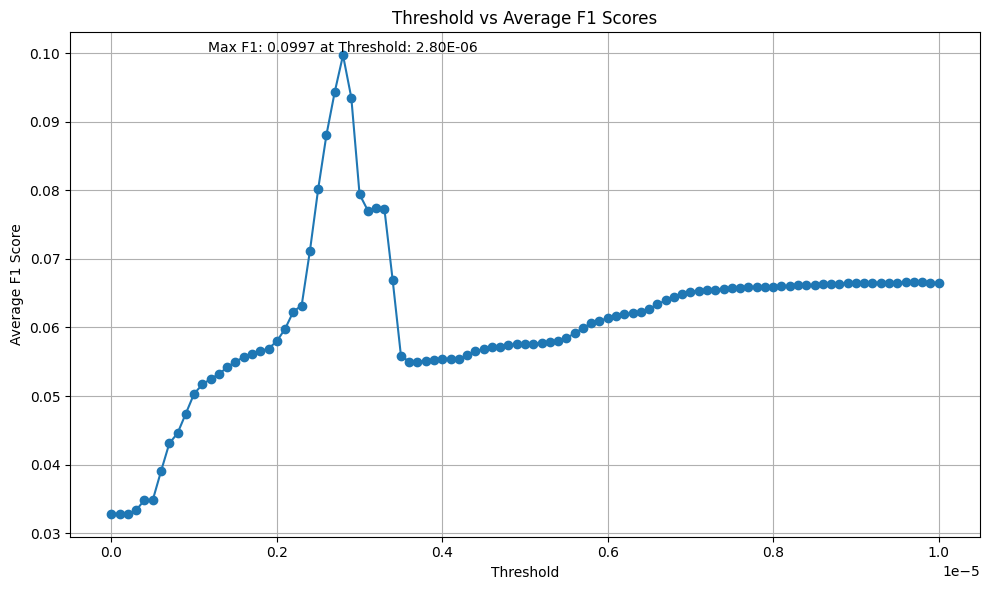

In [12]:
import matplotlib.pylab as plt

avg_f1_scores_by_threshold = {}

for attack_type, values in data:
     for key, metrics in values.items():
         if key in avg_f1_scores_by_threshold.keys():
            avg_f1_scores_by_threshold[key] += metrics[3]
         else:
             avg_f1_scores_by_threshold[key] = metrics[3]

for key in avg_f1_scores_by_threshold:
    avg_f1_scores_by_threshold[key] = avg_f1_scores_by_threshold[key] / len(data)
    

thresholds = list(avg_f1_scores_by_threshold.keys())
average_f1_scores = list(avg_f1_scores_by_threshold.values())

max_f1_score = max(average_f1_scores)
max_index = average_f1_scores.index(max_f1_score)
max_threshold = thresholds[max_index]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, average_f1_scores, marker='o')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.text(max_threshold, max_f1_score, f'   Max F1: {max_f1_score:.4f} at Threshold: {max_threshold:.2E}', ha='left', va='bottom')


plt.xlabel('Threshold')
plt.ylabel('Average F1 Score')
plt.title('Threshold vs Average F1 Scores')
plt.grid(True)
plt.tight_layout()
plt.show()

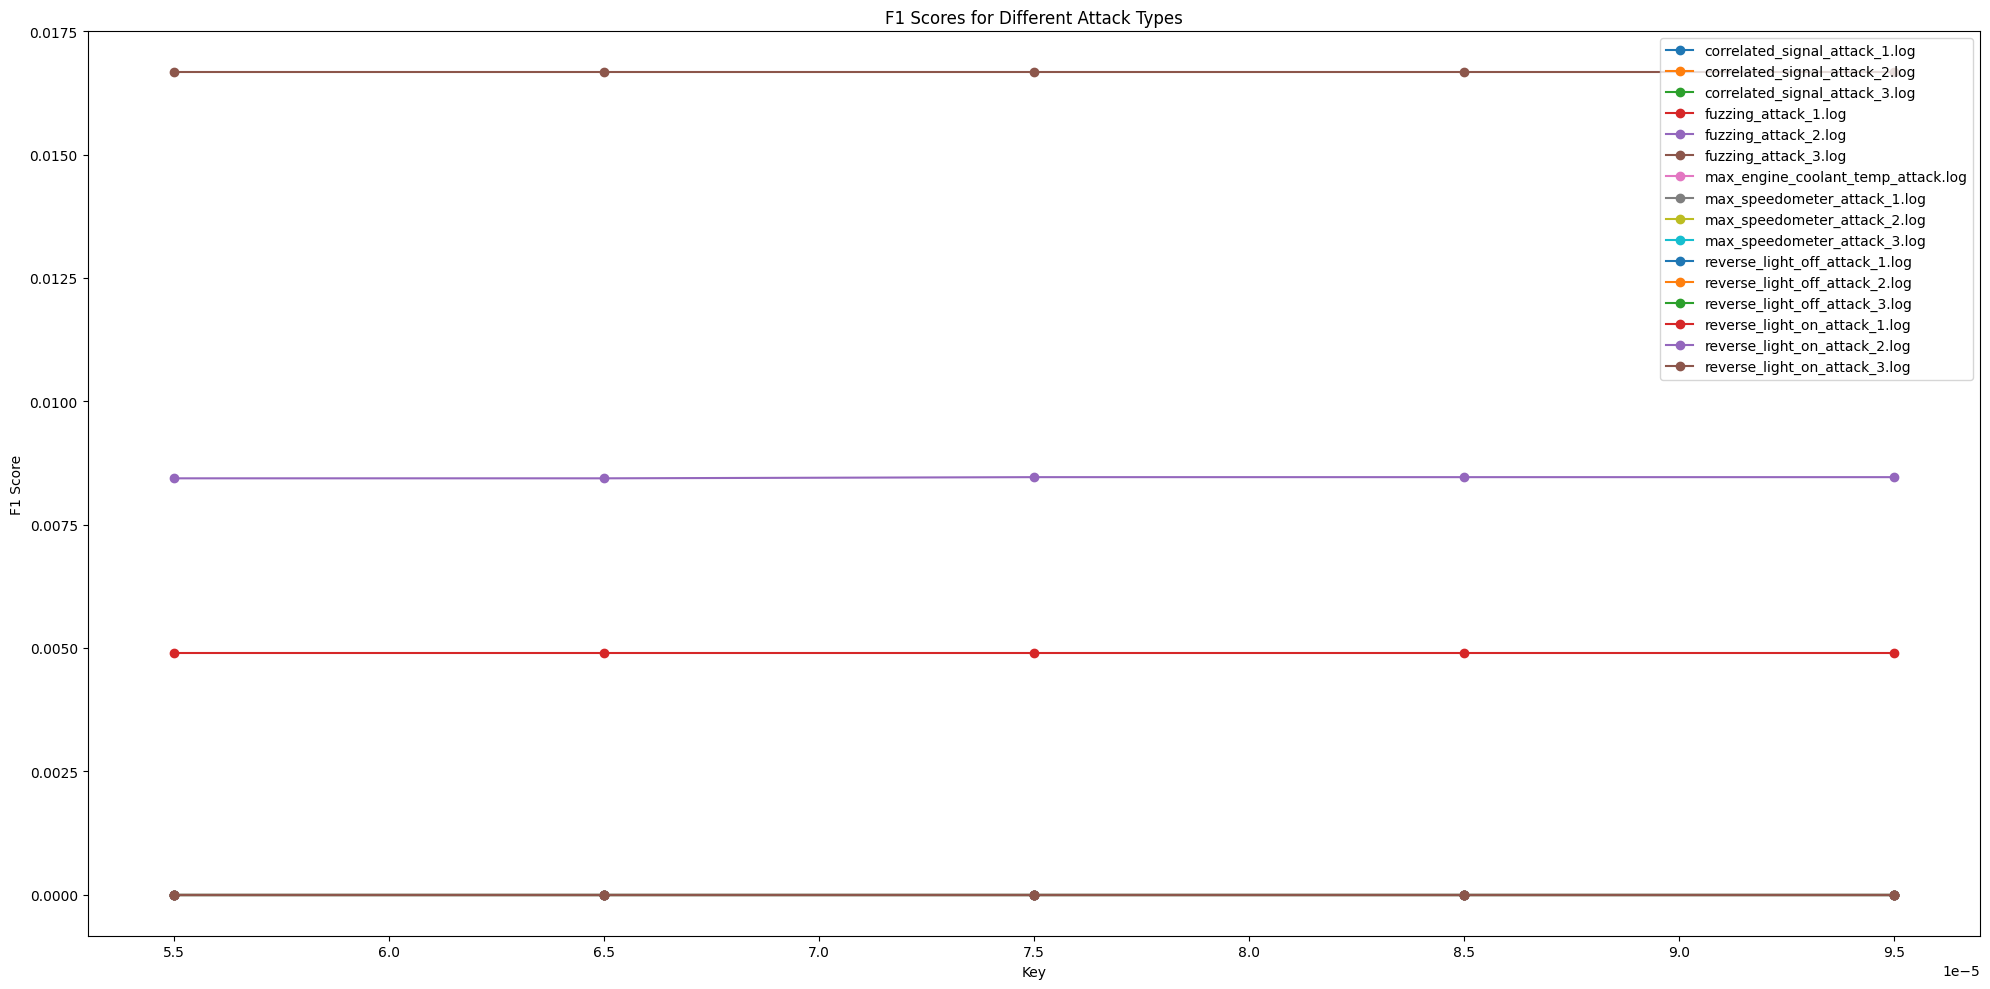

In [2]:
import matplotlib.pyplot as plt

avg_f1_scores_by_threshold = {}

for attack_type, values in data:
     for key, metrics in values.items():
         if avg_f1_scores_by_threshold[key]:
            avg_f1_scores_by_threshold[key] += metrics[3]
         else:
             avg_f1_scores_by_threshold[key] = metrics[3]
         
for attack_type, values in data:
    for key, metrics in values.items():
        f1_score = metrics[3]  # Extracting the F1 score
        if attack_type not in f1_scores_by_attack:
            f1_scores_by_attack[attack_type] = []
        f1_scores_by_attack[attack_type].append((key, f1_score))

# Plotting the F1 scores for each attack type
plt.figure(figsize=(20, 10))

for attack, scores in f1_scores_by_attack.items():
    keys = [score[0] for score in scores]
    f1_scores = [score[1] for score in scores]
    plt.plot(keys, f1_scores, marker='o', label=attack)

plt.xlabel('Key')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Attack Types')
plt.legend()
plt.tight_layout()
plt.show()
